# EEG Presentation  
  
### Description

This is a multiclass classification problem. You are given 17.000 EEGs which contain more than 100,000 sub EEGs. Each sub EEG has been identified as 1 of 6 types of brain activity. The goal is to identify the type of activity shown in a given sub EEG.

### Data Overview

The information needed to access each sub EEG is given in the csv. Also given is the type of activity corresponding with those sub EEGs. There are 17,000 unique EEGs and many of those contain multiple sub EEGs. There are 106,800 total sub EEGs. There is significant overlap in these sub EEGs.

In [3]:
training

eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0       1628180742           0                       0.0          353733   
1       1628180742           1                       6.0          353733   
2       1628180742           2                       8.0          353733   
3       1628180742           3                      18.0          353733   
4       1628180742           4                      24.0          353733   
...            ...         ...                       ...             ...   
106795   351917269           6                      12.0      2147388374   
106796   351917269           7                      14.0      2147388374   
106797   351917269           8                      16.0      2147388374   
106798   351917269           9                      18.0      2147388374   
106799   351917269          10                      20.0      2147388374   

        spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
0                        0                               0.0   127492639   
1                        1                               6.0  3887563113   
2                        2                               8.0  1142670488   
3                        3                              18.0  2718991173   
4                        4                              24.0  3080632009   
...                    ...                               ...         ...   
106795                   6                              12.0  4195677307   
106796                   7                              14.0   290896675   
106797                   8                              16.0   461435451   
106798                   9                              18.0  3786213131   
106799                  10                              20.0  3642716176   

        patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  \
0            42516          Seizure             3         0         0   
1            42516          Seizure             3         0         0   
2            42516          Seizure             3         0         0   
3            42516          Seizure             3         0         0   
4            42516          Seizure             3         0         0   
...            ...              ...           ...       ...       ...   
106795       10351             LRDA             0         0         0   
106796       10351             LRDA             0         0         0   
106797       10351             LRDA             0         0         0   
106798       10351             LRDA             0         0         0   
106799       10351             LRDA             0         0         0   

        lrda_vote  grda_vote  other_vote  
0               0          0           0  
1               0          0           0  
2               0          0           0  
3               0          0           0  
4               0          0           0  
...           ...        ...         ...  
106795          3          0           0  
106796          3          0           0  
106797          3          0           0  
106798          3          0           0  
106799          3          0           0  

[106800 rows x 15 columns]

A sub EEG is a 50 second recording. It contains 10,000 rows of data and 20 columns. 19 of those columns are for recordings at specific electrode locations. Fp1 is prefrontal cortex electrode 1, for example. The 20th column is for the electrocardiogram recording.

In [5]:
example_eeg

Fp1          F3          C3          P3          F7          T3  \
0      -80.519997  -70.540001  -80.110001 -108.750000 -120.330002  -88.620003   
1      -80.449997  -70.330002  -81.760002 -107.669998 -120.769997  -90.820000   
2      -80.209999  -75.870003  -82.050003 -106.010002 -117.500000  -87.489998   
3      -84.709999  -75.339996  -87.480003 -108.970001 -121.410004  -94.750000   
4      -90.570000  -80.790001  -93.000000 -113.870003 -129.960007 -102.860001   
...           ...         ...         ...         ...         ...         ...   
17995 -144.660004 -147.809998 -129.820007 -129.460007 -157.509995 -124.000000   
17996 -140.880005 -153.000000 -129.529999 -129.020004 -154.059998 -131.220001   
17997 -133.729996 -141.770004 -121.900002 -122.370003 -158.750000 -123.550003   
17998 -141.449997 -151.139999 -127.190002 -128.699997 -163.460007 -124.309998   
17999 -138.669998 -147.210007 -122.820000 -128.289993 -164.869995 -124.239998   

               T5          O1          Fz          Cz         Pz         Fp2  \
0     -101.750000 -104.489998  -99.129997  -90.389999 -97.040001  -77.989998   
1     -104.260002  -99.730003  -99.070000  -92.290001 -96.019997  -84.500000   
2      -99.589996  -96.820000 -119.680000  -99.360001 -91.110001  -99.440002   
3     -105.370003 -100.279999 -113.839996 -102.059998 -95.040001  -99.230003   
4     -118.599998 -101.099998 -107.660004 -102.339996 -98.510002  -95.300003   
...           ...         ...         ...         ...        ...         ...   
17995 -124.570000  -94.820000 -153.070007 -121.110001 -86.459999 -132.520004   
17996 -128.380005  -95.000000 -140.820007 -114.639999 -84.379997 -115.339996   
17997 -127.730003  -93.089996 -125.230003 -106.489998 -83.419998 -112.720001   
17998 -129.479996  -94.419998 -140.869995 -113.339996 -83.519997 -129.300003   
17999 -129.339996  -95.320000 -136.789993 -112.820000 -84.660004 -129.380005   

               F4          C4          P4          F8         T4          T6  \
0      -88.830002 -112.120003 -108.110001  -95.949997 -98.360001 -121.730003   
1      -84.989998 -115.610001 -103.860001  -97.470001 -89.290001 -115.500000   
2     -104.589996 -127.529999 -113.349998  -95.870003 -96.019997 -123.879997   
3     -101.220001 -125.769997 -111.889999  -97.459999 -97.180000 -128.940002   
4      -88.930000 -115.639999  -99.800003  -97.500000 -88.730003 -114.849998   
...           ...         ...         ...         ...        ...         ...   
17995 -138.339996 -128.970001  -71.300003 -114.480003 -86.709999 -114.959999   
17996 -119.230003 -114.709999  -70.989998  -92.129997 -79.639999 -116.139999   
17997 -103.209999 -107.629997  -61.869999  -97.910004 -77.150002 -106.500000   
17998 -118.650002 -117.589996  -71.879997  -99.279999 -83.900002 -116.160004   
17999 -123.180000 -122.889999  -79.910004 -101.459999 -84.339996 -125.989998   

               O2        EKG  
0     -106.449997   7.920000  
1     -102.059998  29.219999  
2     -105.790001  45.740002  
3     -109.889999  83.870003  
4     -100.250000  97.769997  
...           ...        ...  
17995  -81.500000 -20.070000  
17996  -81.879997  10.600000  
17997  -75.339996  -2.060000  
17998  -81.410004   2.820000  
17999  -89.110001  35.279999  

[18000 rows x 20 columns]

In [8]:
example_sub_eeg

Fp1          F3          C3          P3          F7          T3  \
1200  -129.460007 -115.580002 -115.129997 -157.440002 -166.979996 -126.260002   
1201  -128.740005 -112.330002 -112.059998 -154.830002 -164.440002 -121.230003   
1202  -128.600006 -112.550003 -107.489998 -148.360001 -154.089996 -114.110001   
1203  -123.449997 -106.440002 -108.870003 -148.309998 -158.080002 -118.129997   
1204  -129.770004 -119.430000 -111.879997 -148.029999 -145.830002 -118.040001   
...           ...         ...         ...         ...         ...         ...   
11195 -156.139999 -149.660004 -115.019997 -130.360001 -167.929993  -94.500000   
11196 -168.899994 -157.619995 -168.679993 -141.410004 -199.839996 -118.550003   
11197 -164.080002 -143.070007 -211.740005 -165.570007 -201.369995  -90.730003   
11198 -168.080002 -148.940002 -118.269997 -145.429993 -162.889999 -128.440002   
11199 -166.410004 -125.389999  -84.360001 -107.910004 -212.220001 -111.010002   

               T5          O1          Fz          Cz          Pz         Fp2  \
1200  -133.429993 -124.349998 -116.629997 -112.110001 -117.040001 -103.169998   
1201  -135.380005 -122.269997 -114.930000 -107.370003 -111.059998 -100.480003   
1202  -129.470001 -115.989998 -123.620003 -104.839996 -100.190002 -104.250000   
1203  -133.350006 -117.790001 -106.150002  -95.480003  -97.440002  -93.980003   
1204  -140.699997 -113.980003  -97.209999  -85.459999  -91.620003  -83.529999   
...           ...         ...         ...         ...         ...         ...   
11195 -117.029999 -130.899994 -137.979996 -129.869995 -122.279999 -127.019997   
11196 -114.269997 -132.399994 -169.940002 -158.889999 -131.960007 -159.110001   
11197 -120.489998 -134.940002 -170.300003 -168.910004 -143.000000 -159.619995   
11198 -120.709999 -123.620003 -124.800003 -108.779999 -117.269997 -135.500000   
11199 -116.050003 -122.620003 -123.230003 -112.529999 -115.040001 -140.350006   

               F4          C4          P4          F8          T4          T6  \
1200  -100.070000 -133.970001 -103.449997 -100.059998  -90.040001 -132.460007   
1201   -96.330002 -122.019997  -95.400002  -98.309998  -83.660004 -122.070000   
1202  -106.040001 -116.940002  -96.059998  -96.620003  -91.120003 -127.430000   
1203   -90.500000 -109.900002  -86.510002  -93.559998  -86.019997 -121.650002   
1204   -71.750000  -96.820000  -71.599998  -85.779999  -68.370003 -105.889999   
...           ...         ...         ...         ...         ...         ...   
11195 -133.919998 -183.699997  -83.559998 -112.889999 -124.989998 -150.190002   
11196 -186.610001 -278.440002 -106.930000 -113.339996   -1.440000 -167.160004   
11197 -211.259995 -271.290009 -116.010002  -68.989998 -131.259995 -179.529999   
11198 -126.430000  -23.309999  -87.169998  -90.980003 -148.750000 -162.380005   
11199 -107.489998 -113.349998 -102.250000 -123.139999  -92.150002 -172.839996   

               O2         EKG  
1200  -107.230003   -5.900000  
1201   -97.180000    9.670000  
1202   -93.900002   -3.030000  
1203   -92.110001   33.880001  
1204   -85.059998   65.309998  
...           ...         ...  
11195 -126.360001  100.959999  
11196 -134.429993  120.190002  
11197 -141.350006  148.399994  
11198 -129.490005  123.660004  
11199 -133.559998  102.169998  

[10000 rows x 20 columns]

824 EEGs were were missing data. Of those 824 EEGs, 101 of them are missing at least 5% of their data. These EEGs are the ones I'll drop. For the rest I will use the column medians to replace the missing values.  
  
Because loading in every EEG to a list killed the kernel, I won't be replacing the null values yet. I'll do that later as I process individual EEGs in order to calculate feature data for the EEGs. For now, I'll just drop the EEGs in to_drop.

### Time Series Comparisons of Activity Type

The main thing to note about the time series plots is how noisy EEG data is. This is why feature extraction is required.

##### Key:  
**Blue** - Other  
**Green** - LPD  
**Red** - GPD  
**Cyan** - LRDA  
**Purple** - GRDA  
**Seizure** - Coral

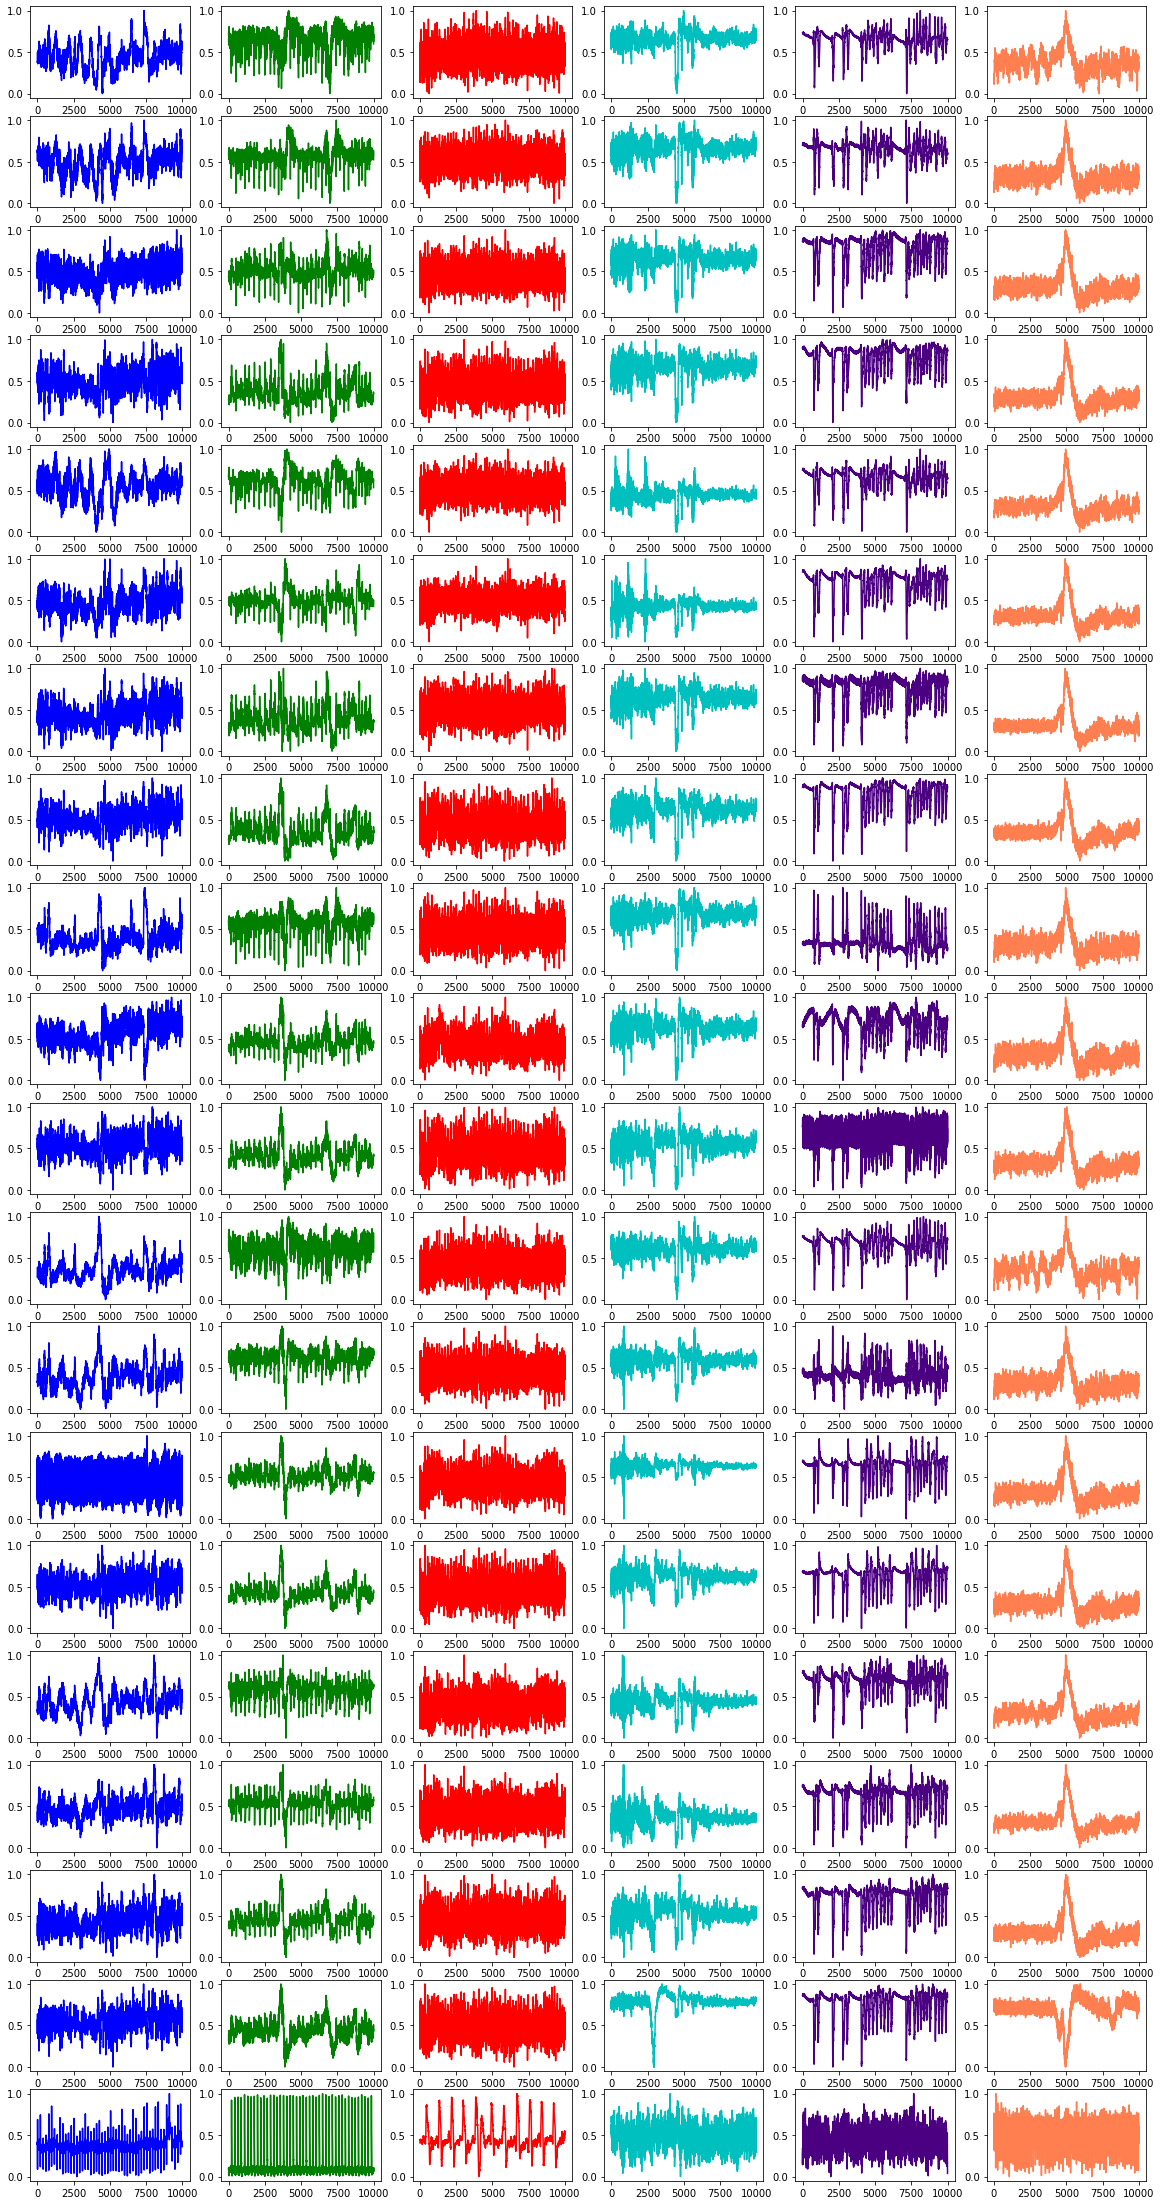

In [67]:
col_list = test_eeg.columns
eeg_list = [other_sub2, lpd_sub2, gpd_sub2, lrda_sub2, grda_sub2, seizure_sub2]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(20, 6)
fig.set_figheight(40)
fig.set_figwidth(20)
for i in range(len(col_list)):
    for j in range(len(eeg_list)):
        axs[i][j].plot(eeg_list[j][col_list[i]], color = colors[j])
        
plt.show()

### Comparing Sub EEGs Within Each Target Class

##### Key:  
**Blue** - Sub EEG 1  
**Green** - Sub EEG 2  
**Red** - Sub EEG 3  
**Cyan** - Sub EEG 4  
**Purple** - Sub EEG 5

**Other**

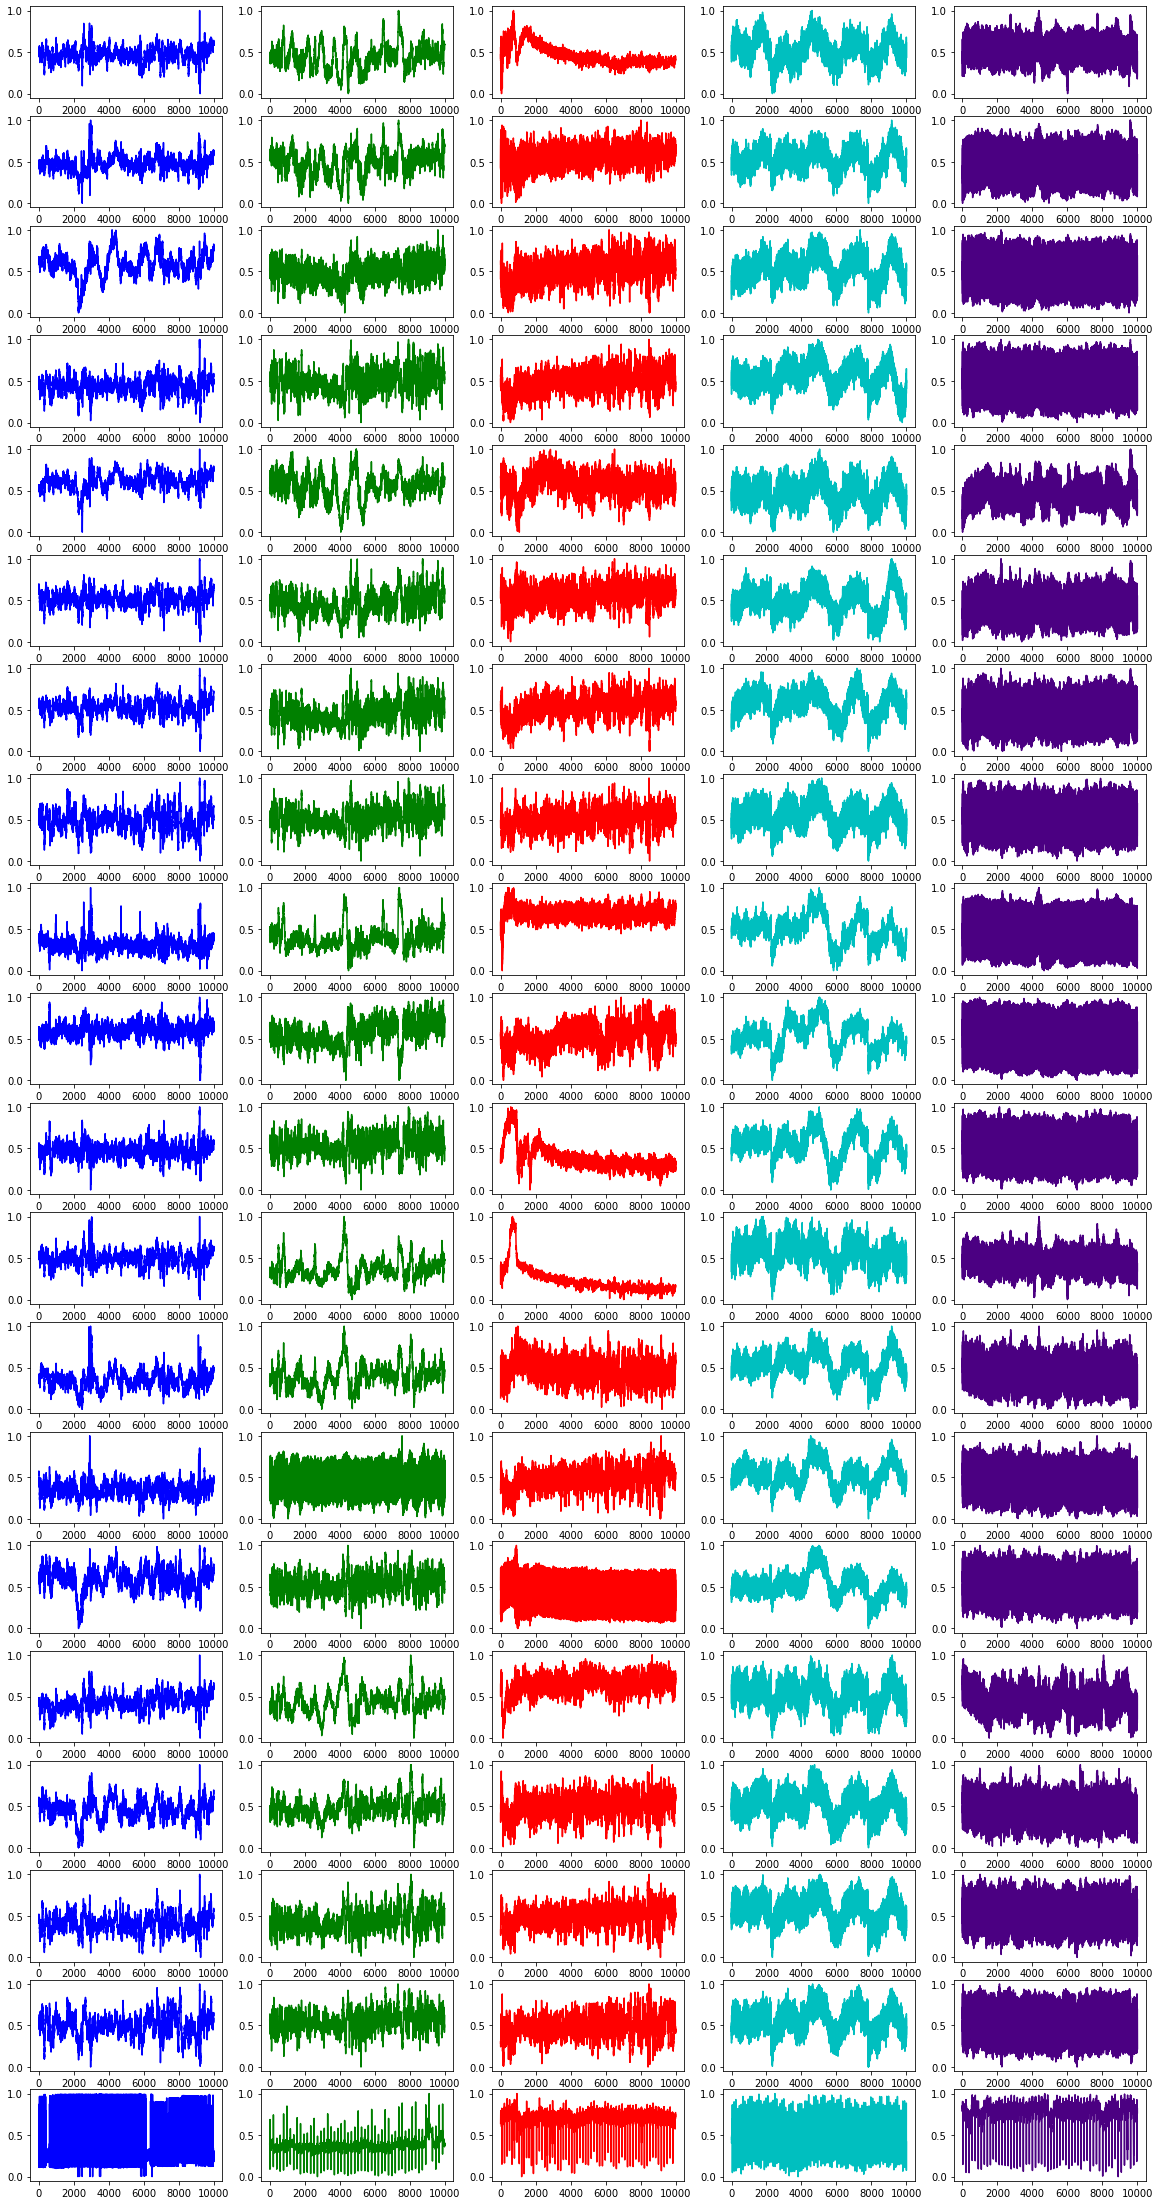

In [69]:
col_list = test_eeg.columns
eeg_list = [other_sub1, other_sub2, other_sub3, other_sub4, other_sub5]
colors = ['b', 'g', 'r', 'c', 'indigo']
fig, axs = plt.subplots(20, 5)
fig.set_figheight(40)
fig.set_figwidth(20)
for i in range(len(col_list)):
    for j in range(len(eeg_list)):
        axs[i][j].plot(eeg_list[j][col_list[i]], color = colors[j])
        
plt.show()

**LPD**

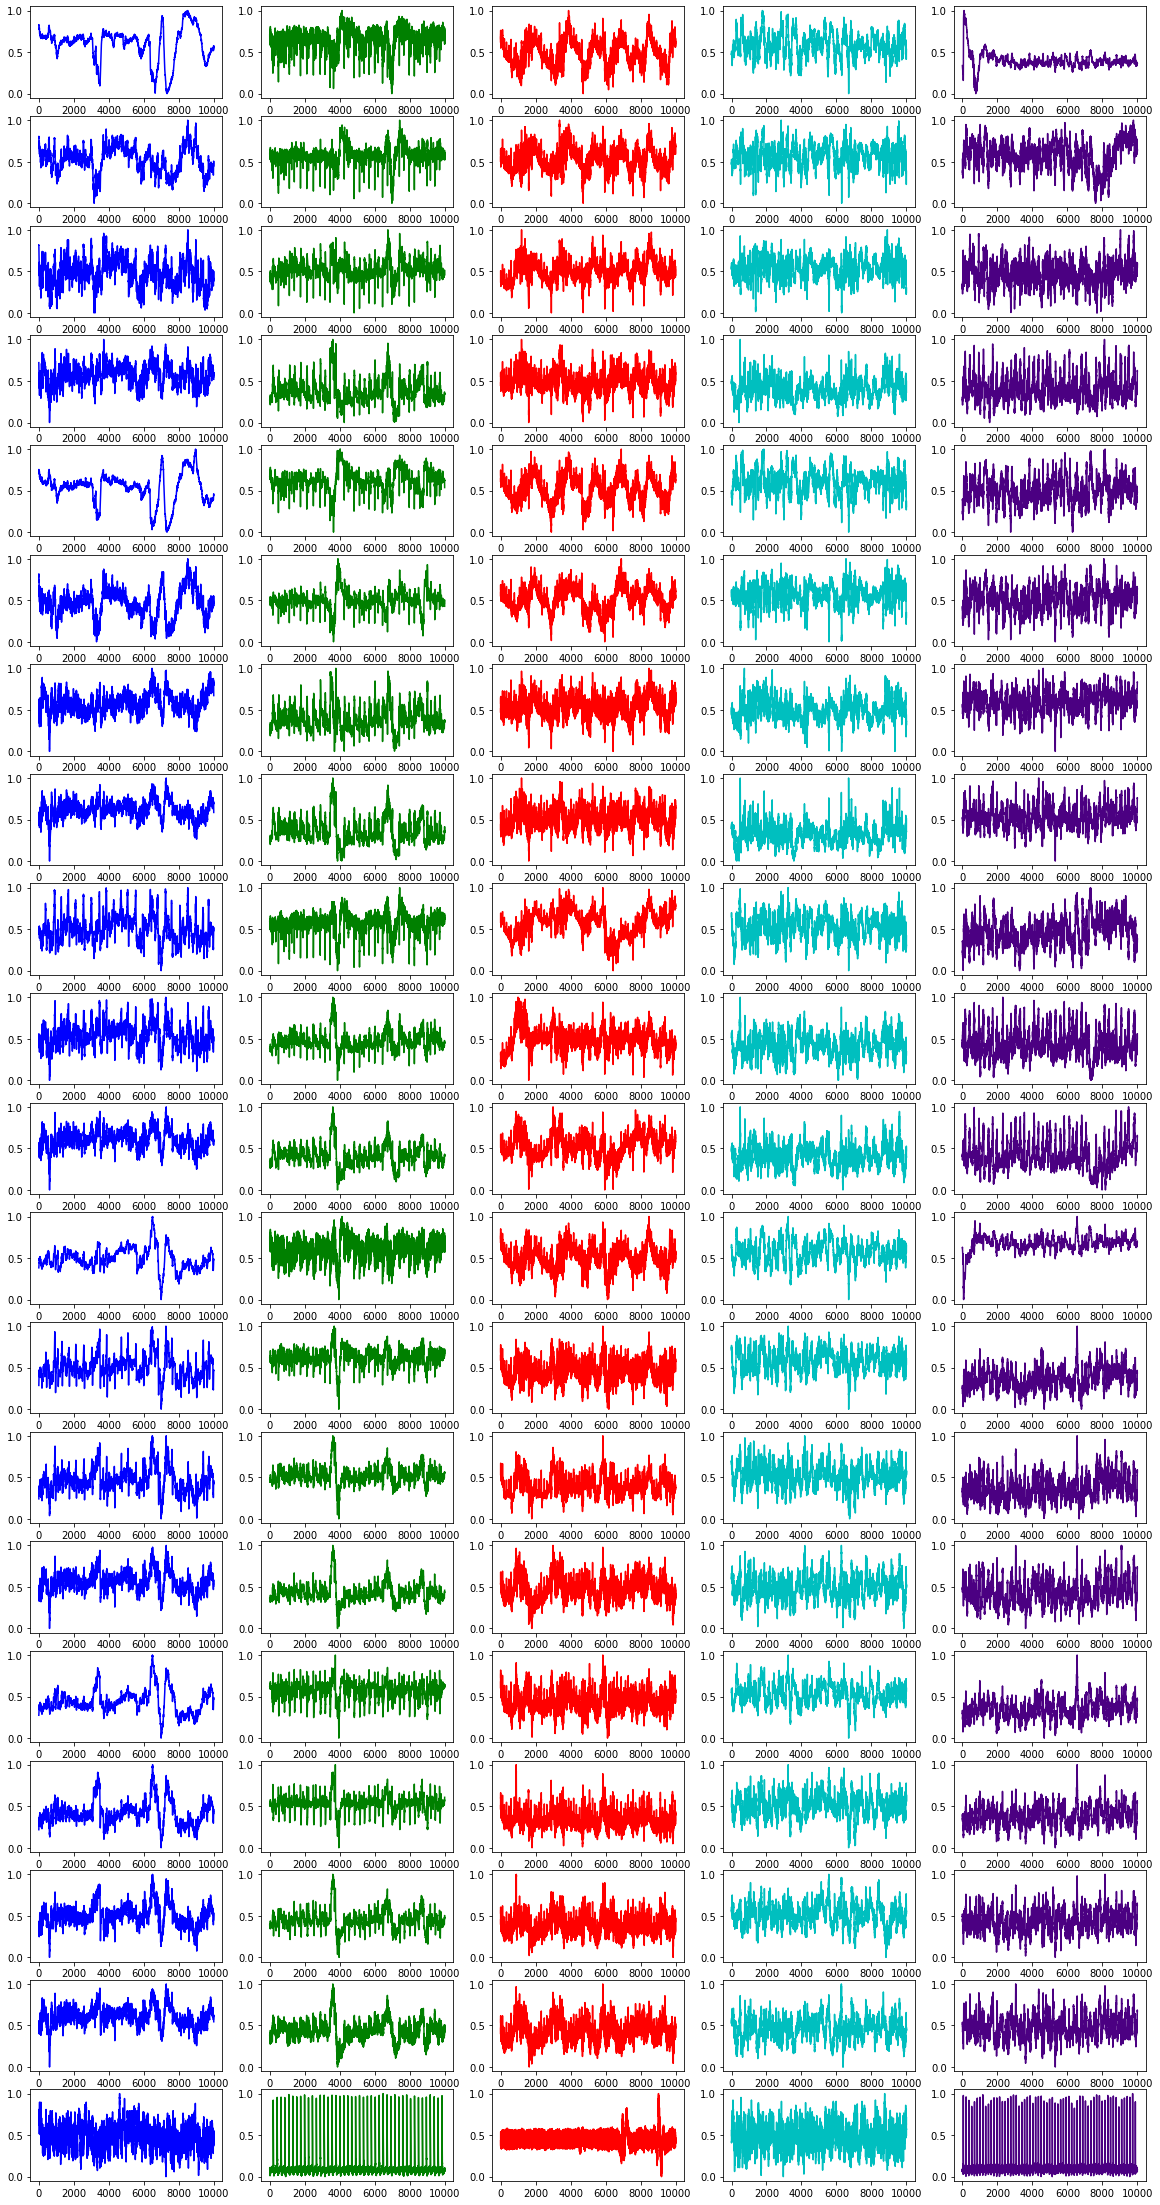

In [70]:
col_list = test_eeg.columns
eeg_list = [lpd_sub1, lpd_sub2, lpd_sub3, lpd_sub4, lpd_sub5]
colors = ['b', 'g', 'r', 'c', 'indigo']
fig, axs = plt.subplots(20, 5)
fig.set_figheight(40)
fig.set_figwidth(20)
for i in range(len(col_list)):
    for j in range(len(eeg_list)):
        axs[i][j].plot(eeg_list[j][col_list[i]], color = colors[j])
        
plt.show()

**GPD**

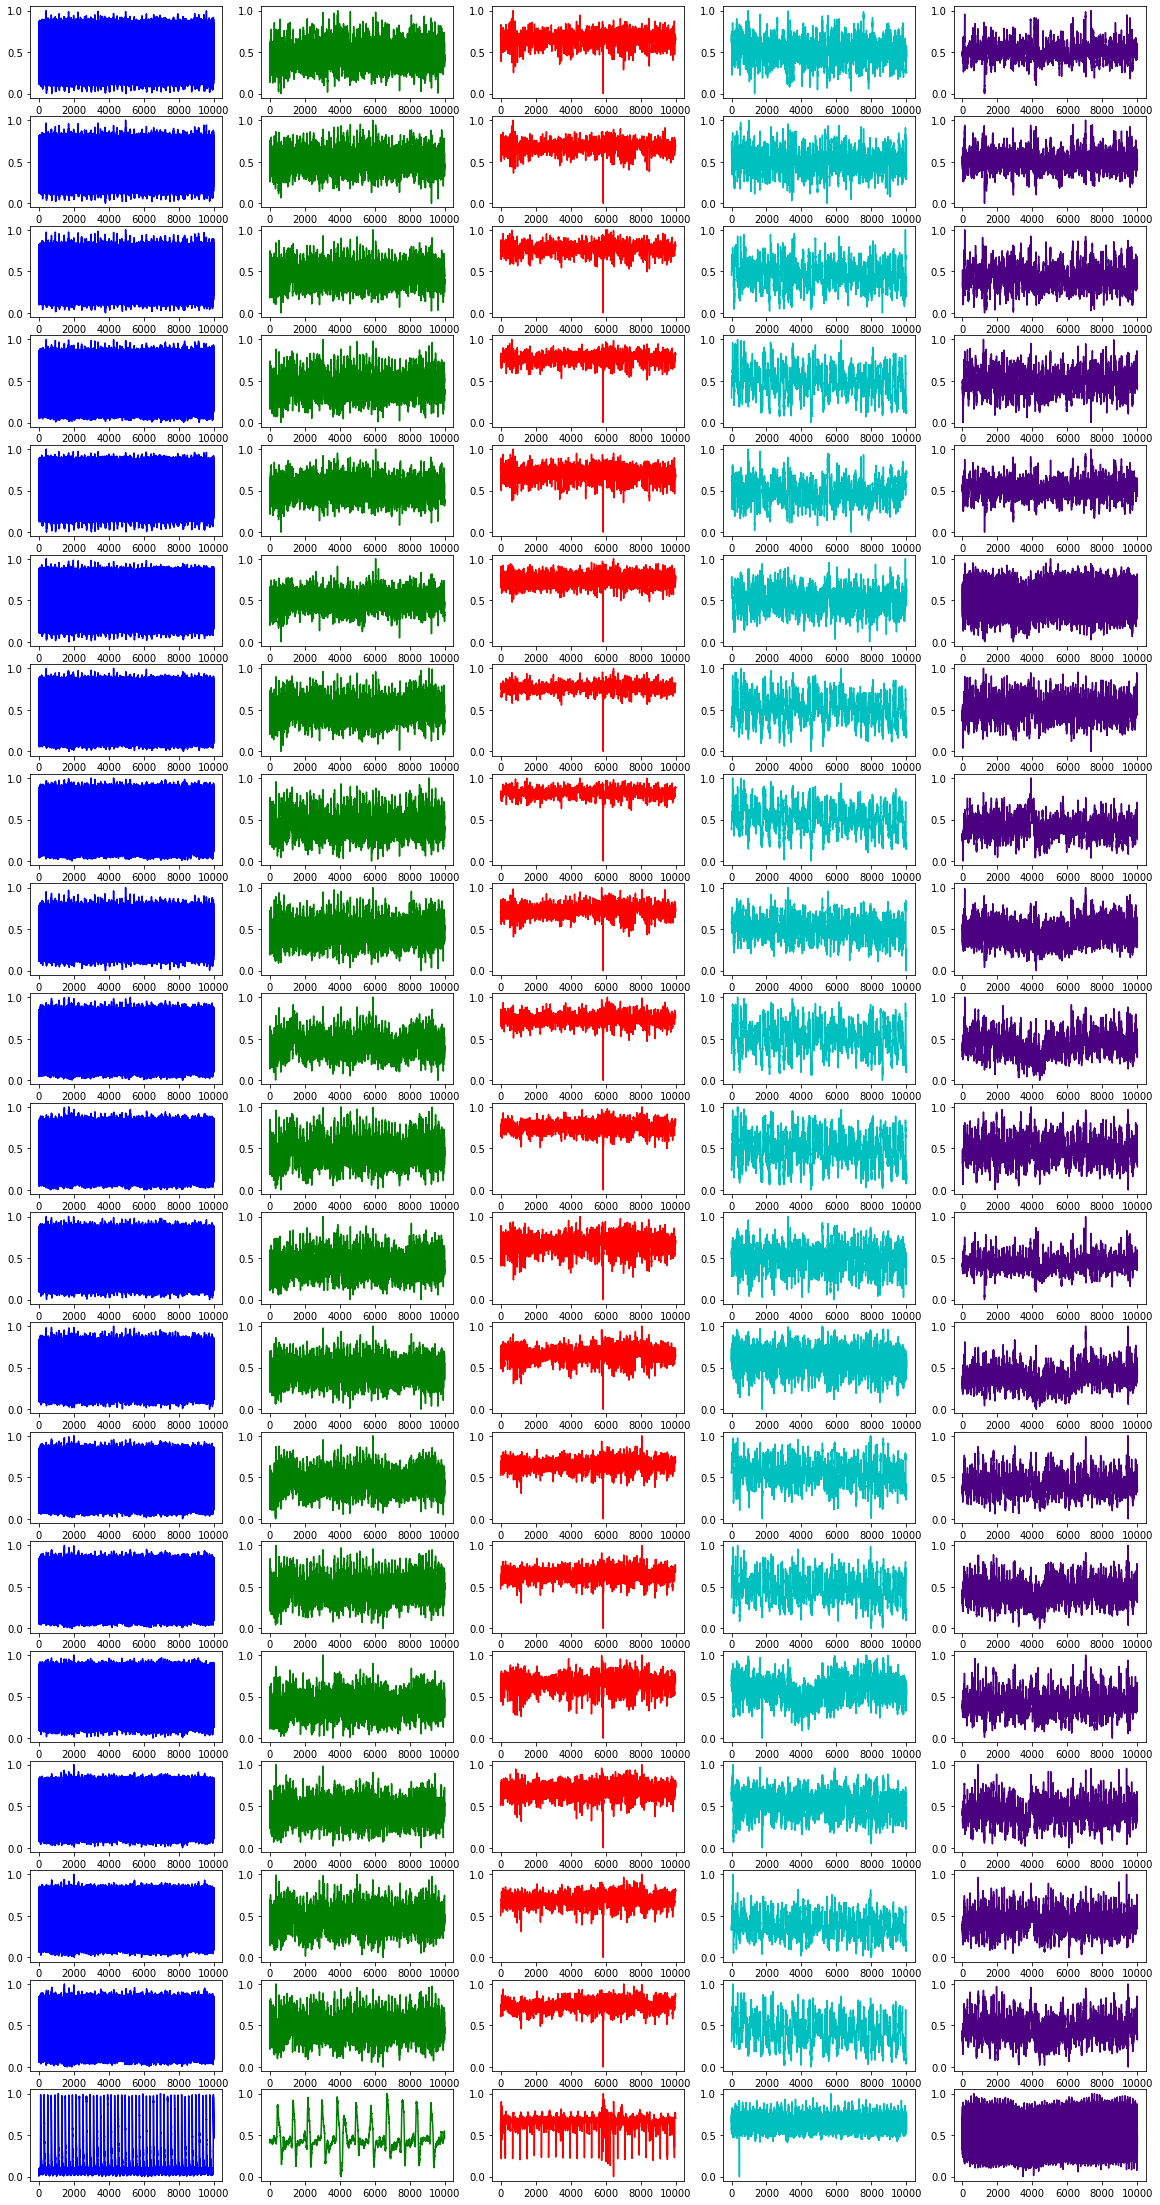

In [71]:
col_list = test_eeg.columns
eeg_list = [gpd_sub1, gpd_sub2, gpd_sub3, gpd_sub4, gpd_sub5]
colors = ['b', 'g', 'r', 'c', 'indigo']
fig, axs = plt.subplots(20, 5)
fig.set_figheight(40)
fig.set_figwidth(20)
for i in range(len(col_list)):
    for j in range(len(eeg_list)):
        axs[i][j].plot(eeg_list[j][col_list[i]], color = colors[j])
        
plt.show()

**LRDA**

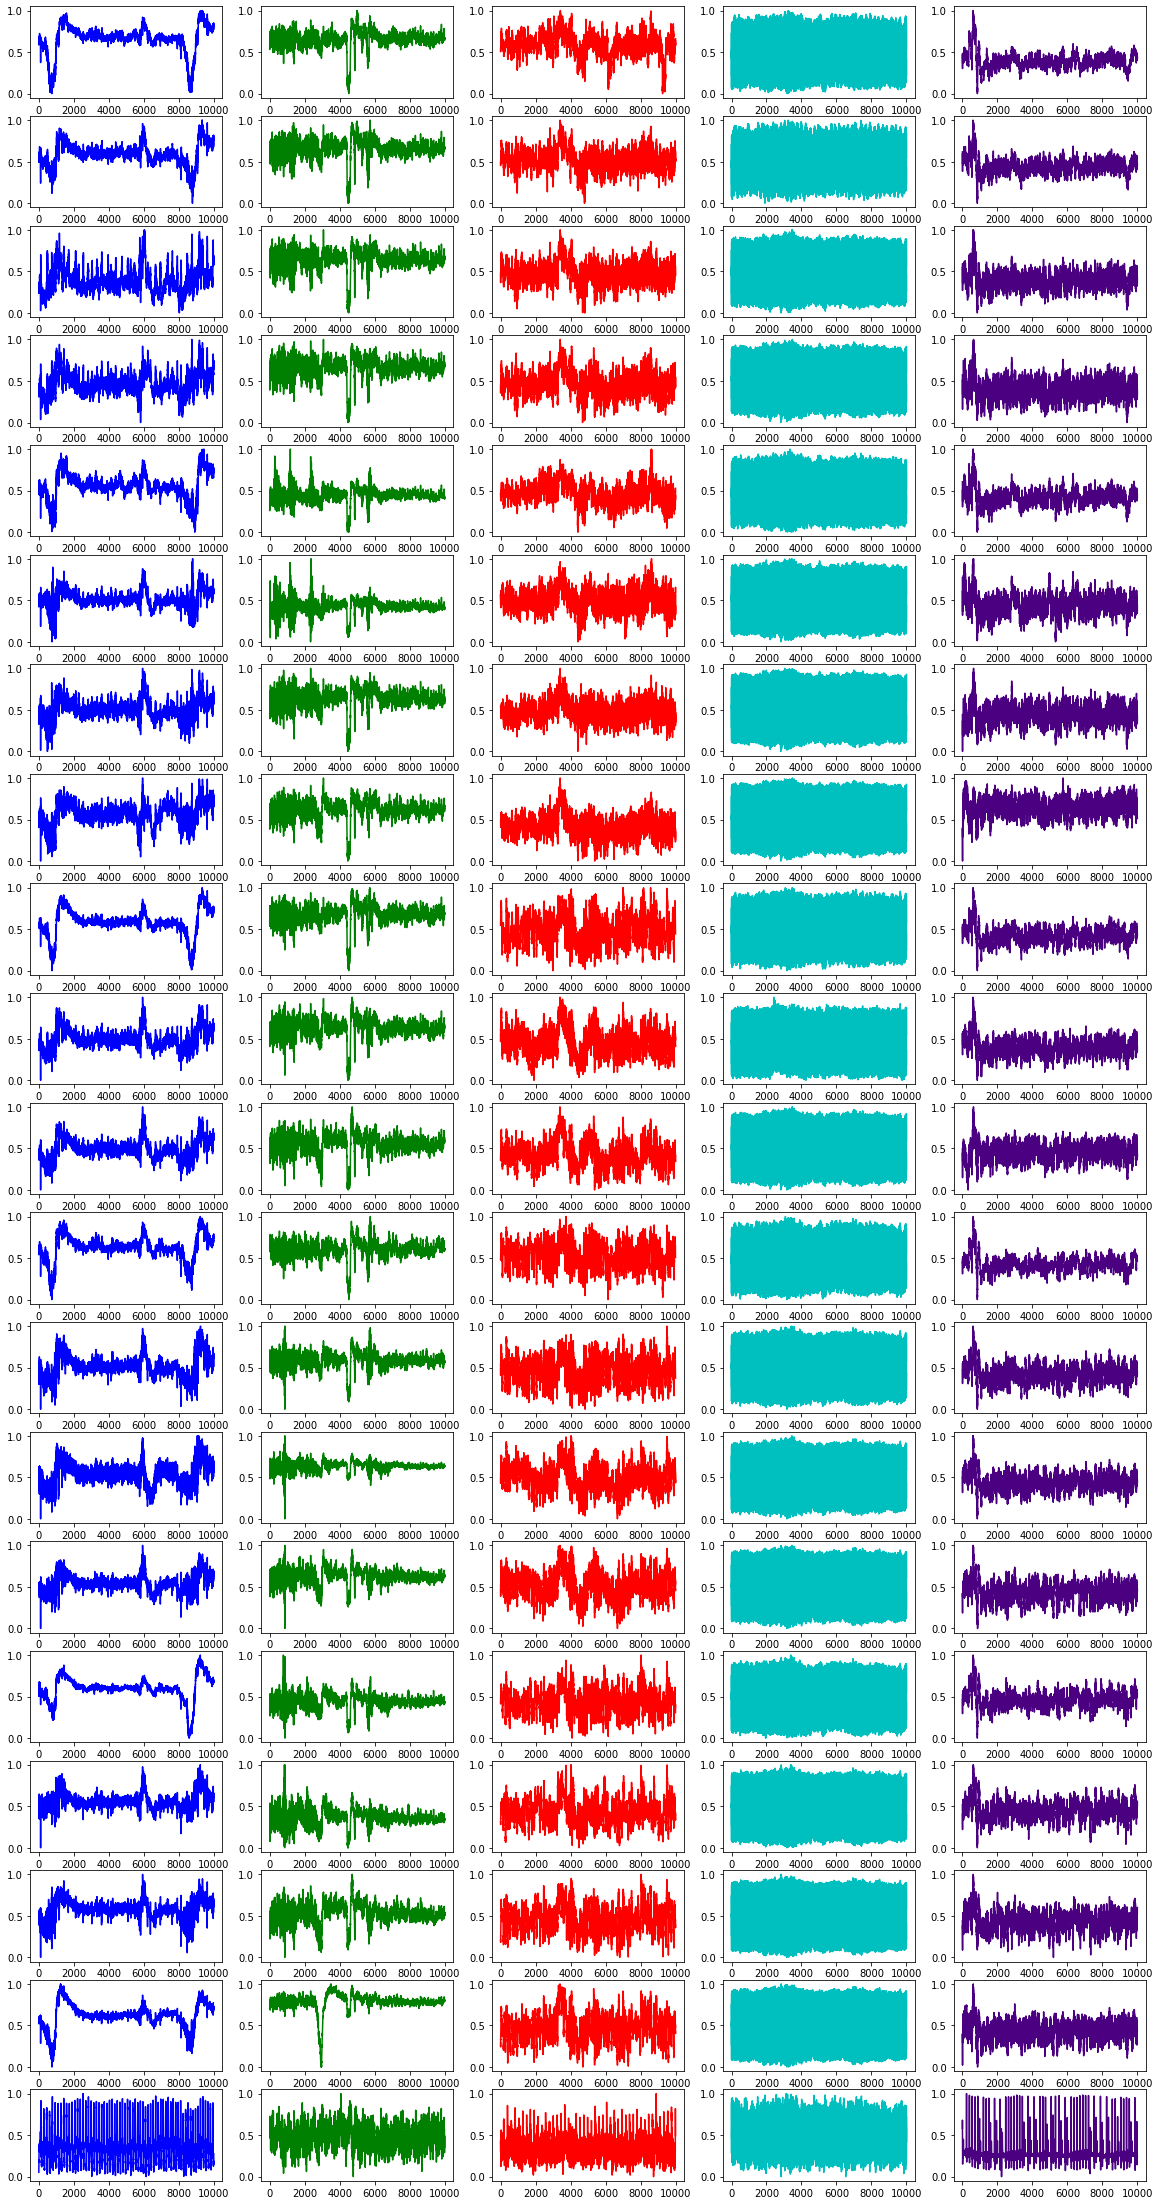

In [72]:
col_list = test_eeg.columns
eeg_list = [lrda_sub1, lrda_sub2, lrda_sub3, lrda_sub4, lrda_sub5]
colors = ['b', 'g', 'r', 'c', 'indigo']
fig, axs = plt.subplots(20, 5)
fig.set_figheight(40)
fig.set_figwidth(20)
for i in range(len(col_list)):
    for j in range(len(eeg_list)):
        axs[i][j].plot(eeg_list[j][col_list[i]], color = colors[j])
        
plt.show()

**GRDA**

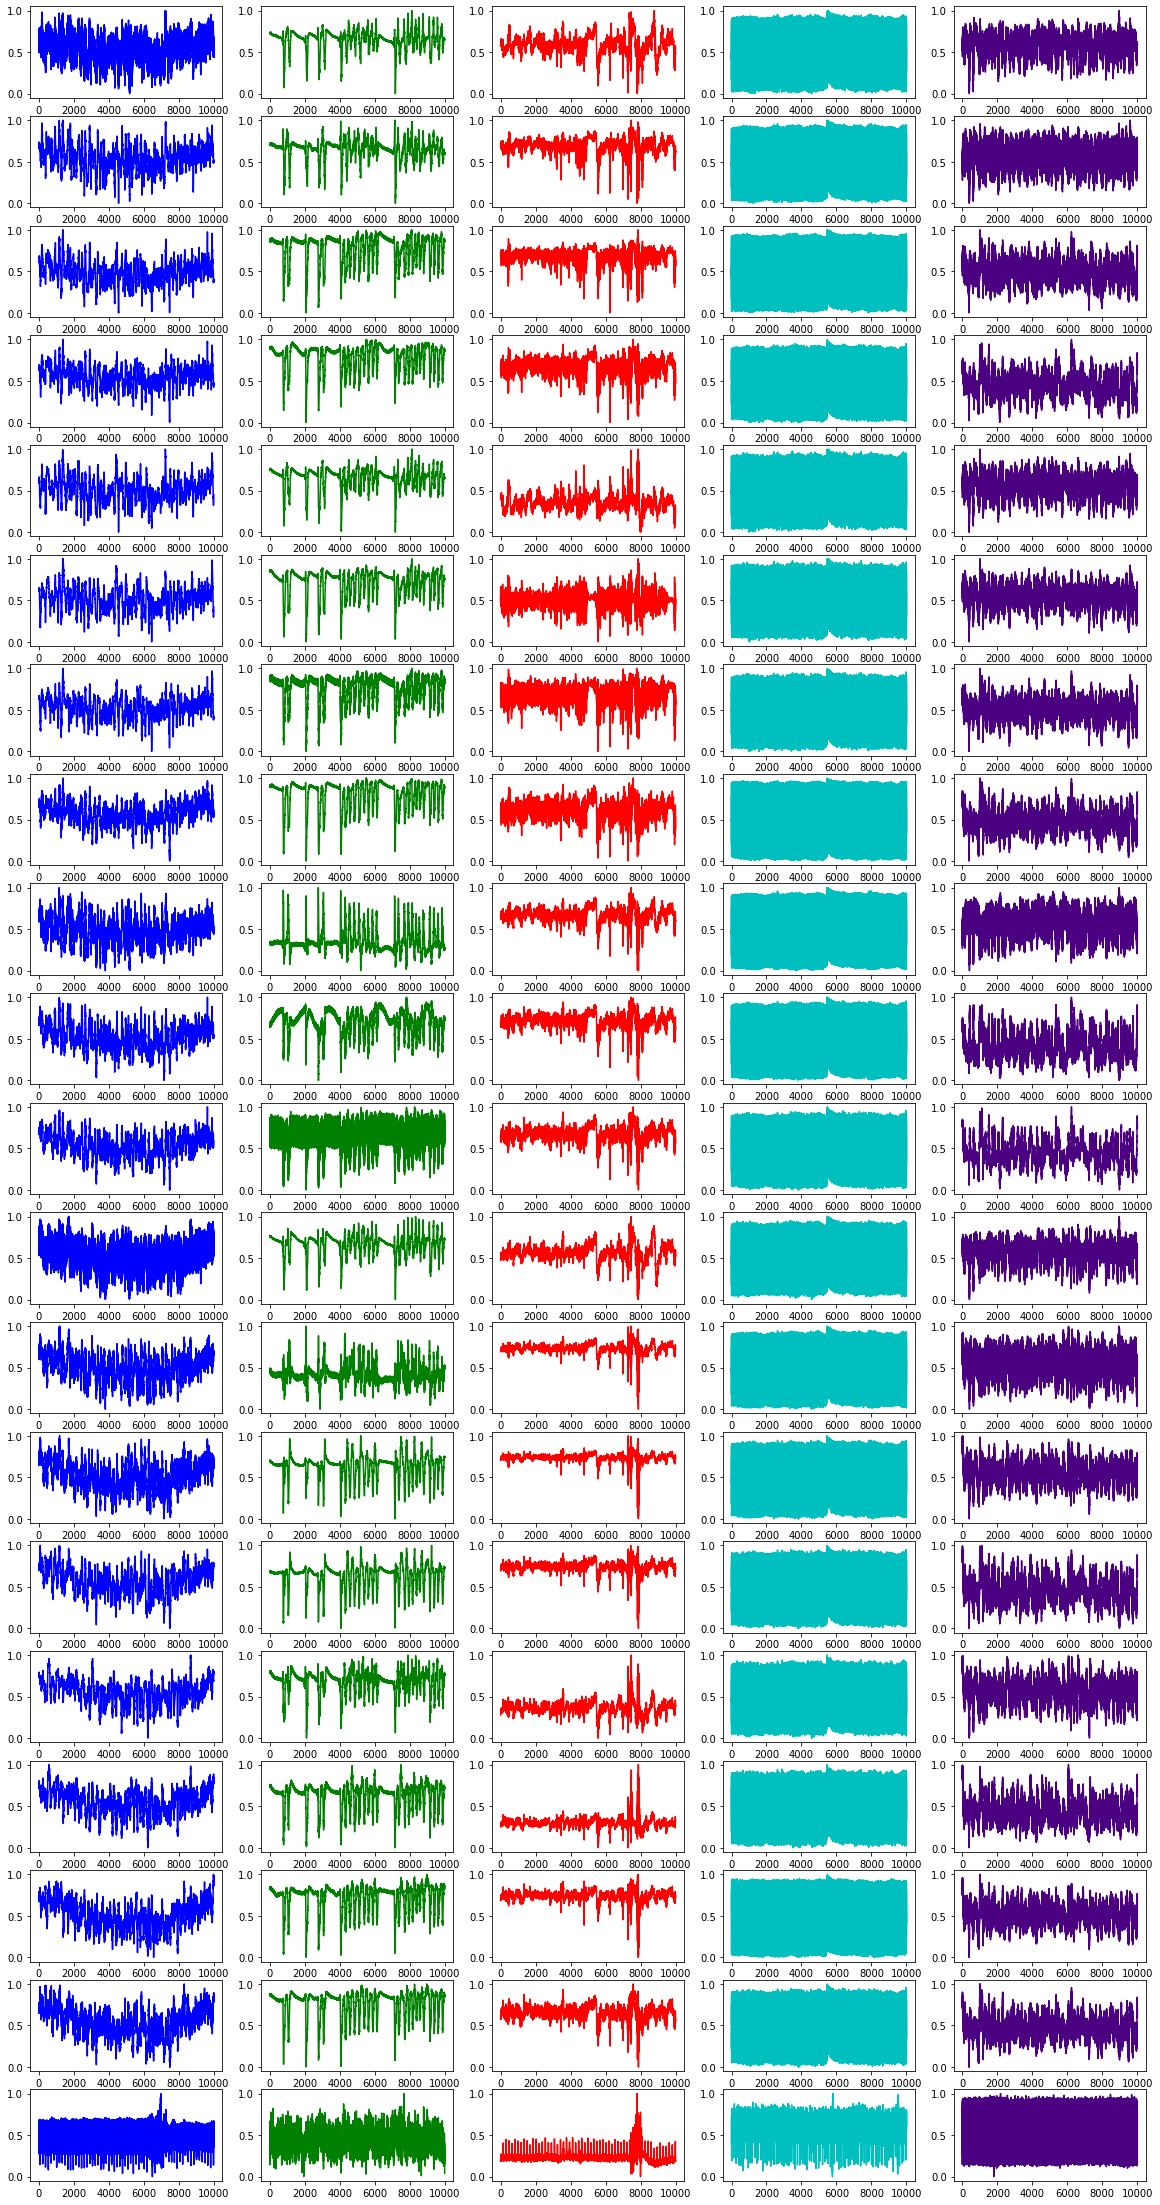

In [73]:
col_list = test_eeg.columns
eeg_list = [grda_sub1, grda_sub2, grda_sub3, grda_sub4, grda_sub5]
colors = ['b', 'g', 'r', 'c', 'indigo']
fig, axs = plt.subplots(20, 5)
fig.set_figheight(40)
fig.set_figwidth(20)
for i in range(len(col_list)):
    for j in range(len(eeg_list)):
        axs[i][j].plot(eeg_list[j][col_list[i]], color = colors[j])
        
plt.show()

**Seizure**

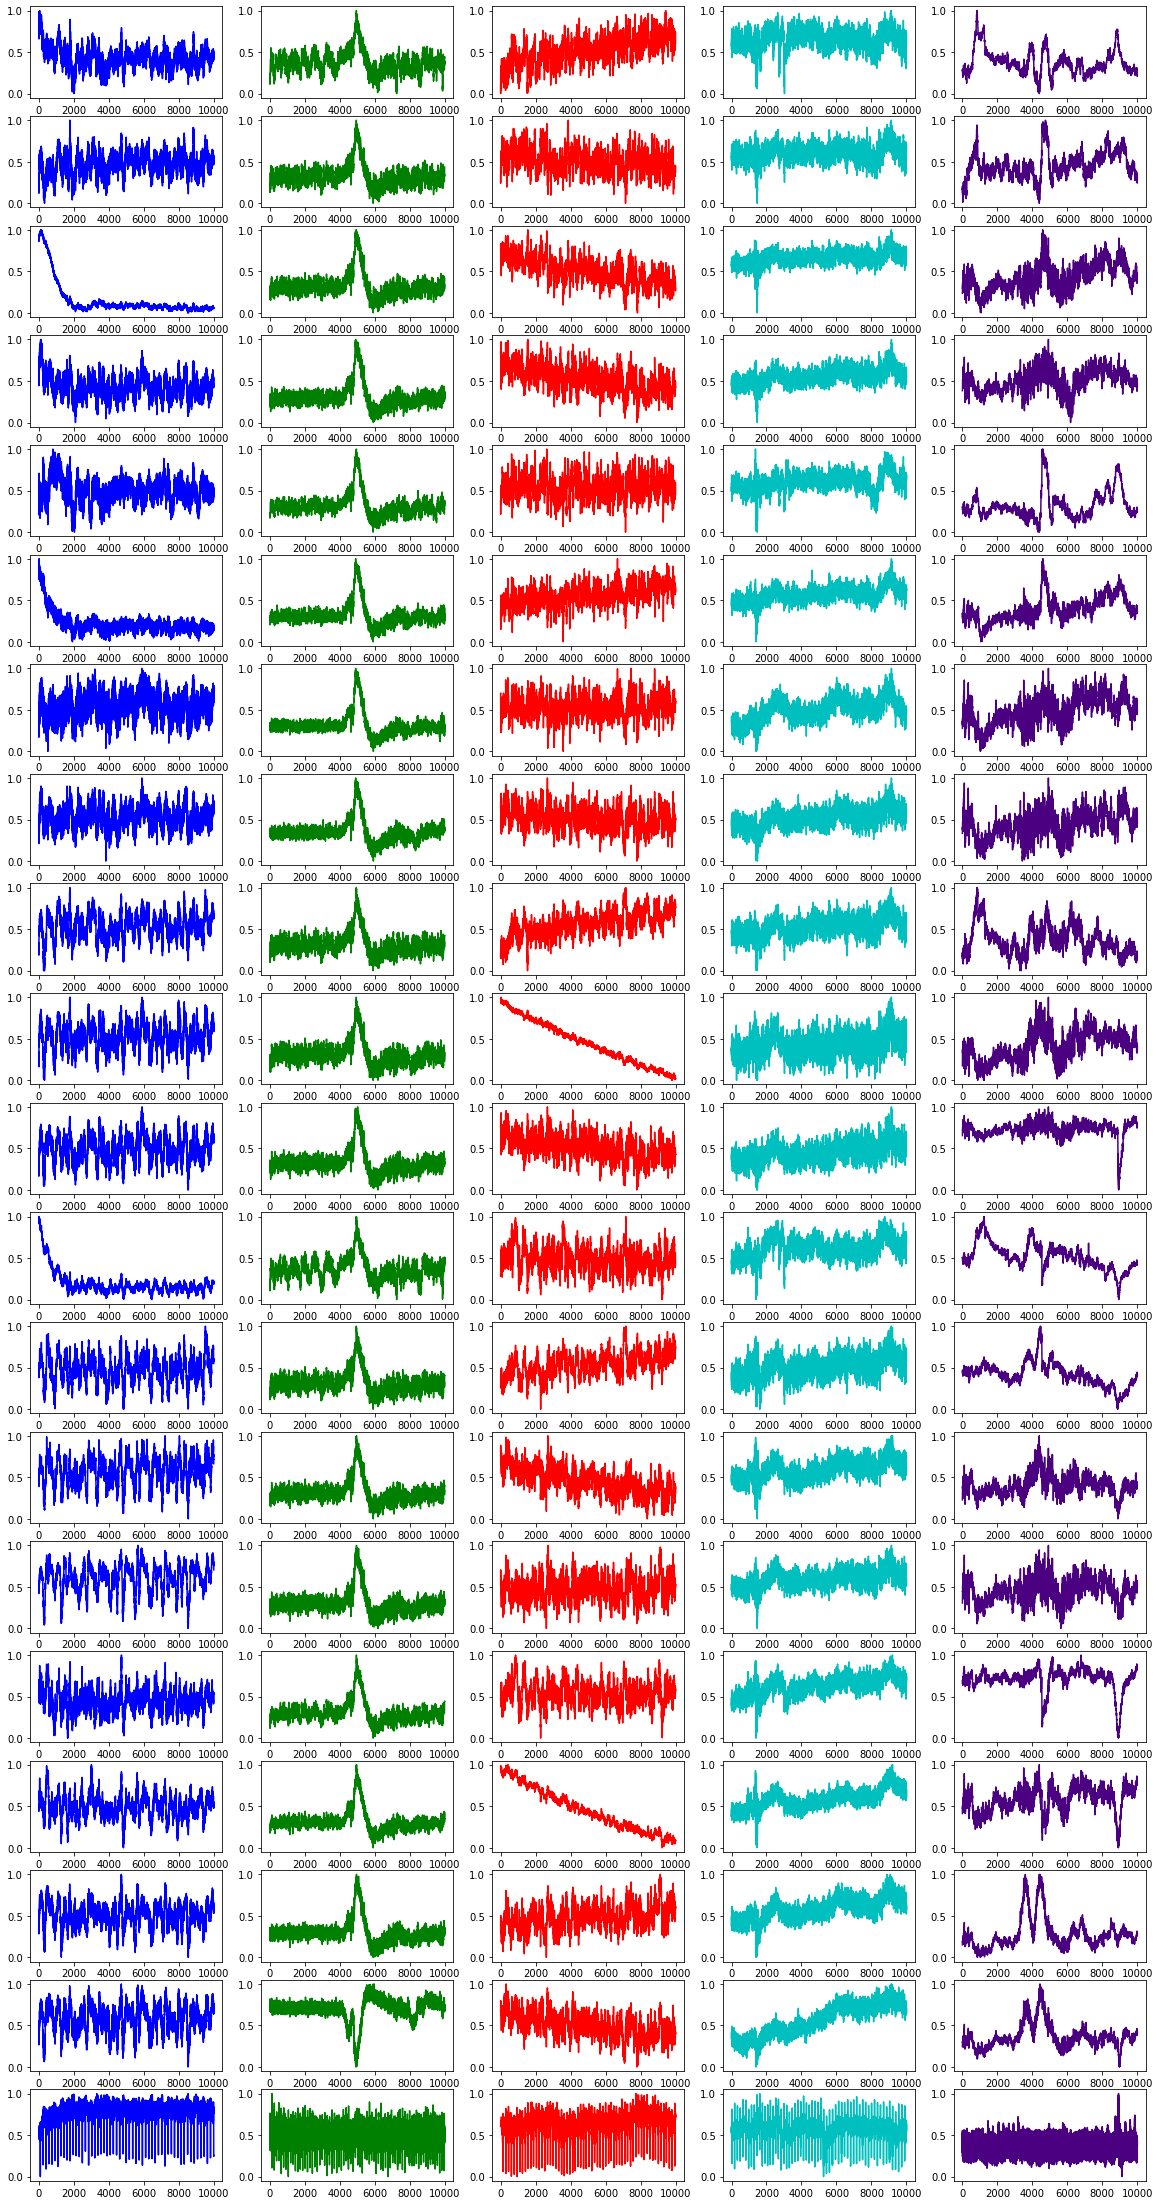

In [74]:
col_list = test_eeg.columns
eeg_list = [seizure_sub1, seizure_sub2, seizure_sub3, seizure_sub4, seizure_sub5]
colors = ['b', 'g', 'r', 'c', 'indigo']
fig, axs = plt.subplots(20, 5)
fig.set_figheight(40)
fig.set_figwidth(20)
for i in range(len(col_list)):
    for j in range(len(eeg_list)):
        axs[i][j].plot(eeg_list[j][col_list[i]], color = colors[j])
        
plt.show()

#### Scipy Welch

The spikes outside the range of focus are errors.

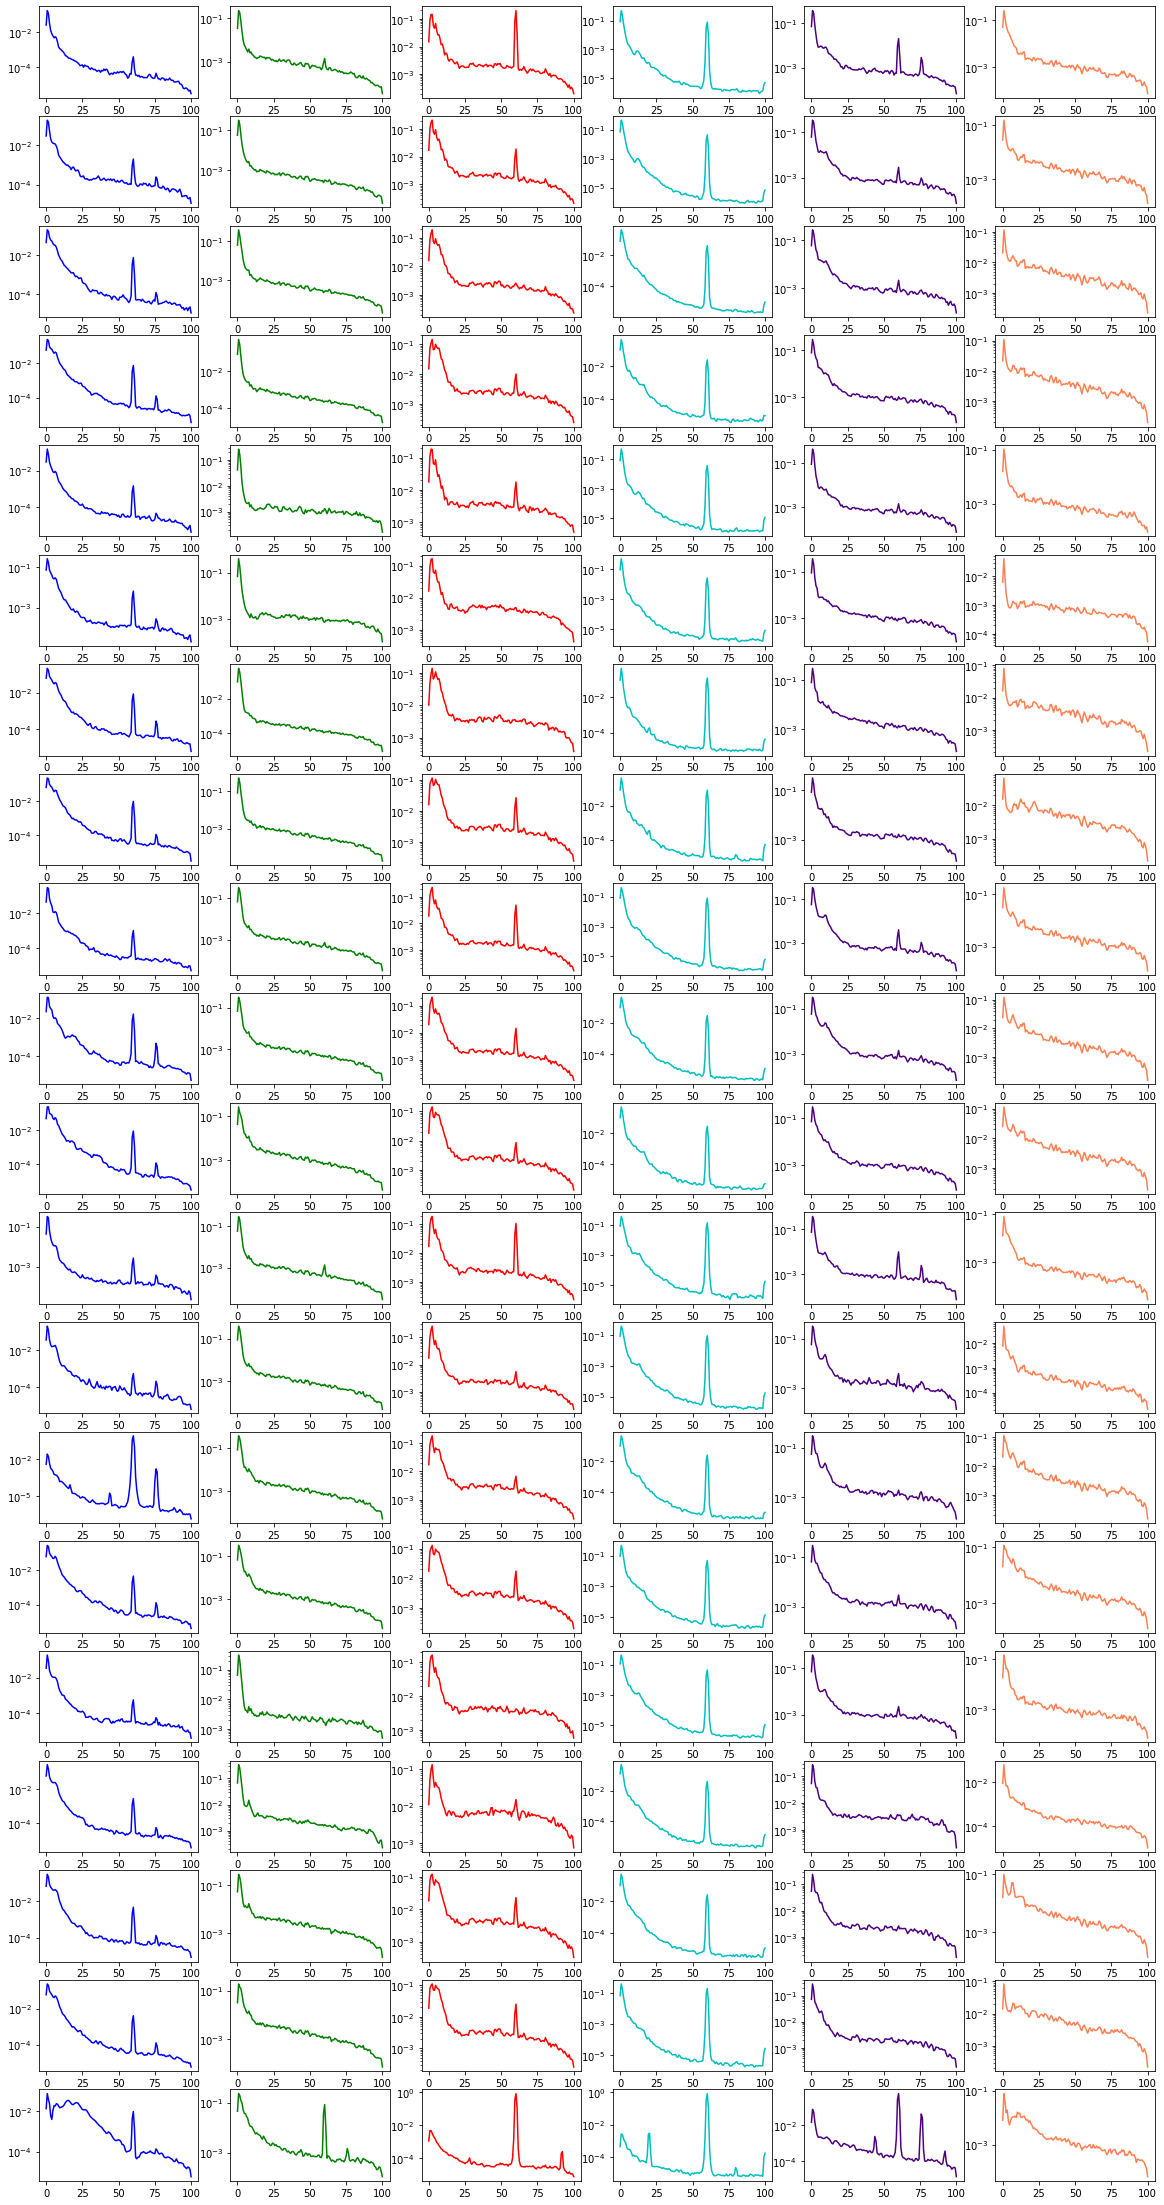

In [150]:
f_type = [other_f2, lpd_f2, gpd_f2, lrda_f2, grda_f2, seizure_f2]
pxx_type = [other_pxx2, lpd_pxx2, gpd_pxx2, lrda_pxx2, grda_pxx2, seizure_pxx2]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(20, 6)
fig.set_figheight(40)
fig.set_figwidth(20)
for i in range(len(other_f2)):
    for j in range(len(f_type)):
        axs[i][j].semilogy(f_type[j][i], pxx_type[j][i], color = colors[j])
        
plt.show()

### Dimensionality Reduction with PCA

Chose 8 components for PCA. The increase in explained variance had dipped considerably beyond this point.

In [180]:
np.mean(evr_sums2)

0.96879244

### PTP Interval Histograms

##### Key for Below Histograms  
  
**Other** - Blue  
**LPD** - Green  
**GPD** - Red  
**LRDA** - Cyan  
**GRDA** - Purple  
**Seizure** - Coral  
  
Every row of plots represents a principal component. There are 8. Every column represents a type of brain activity. There are 6. They are represented by the colors listed above.

#### 0-10s PTP Histograms

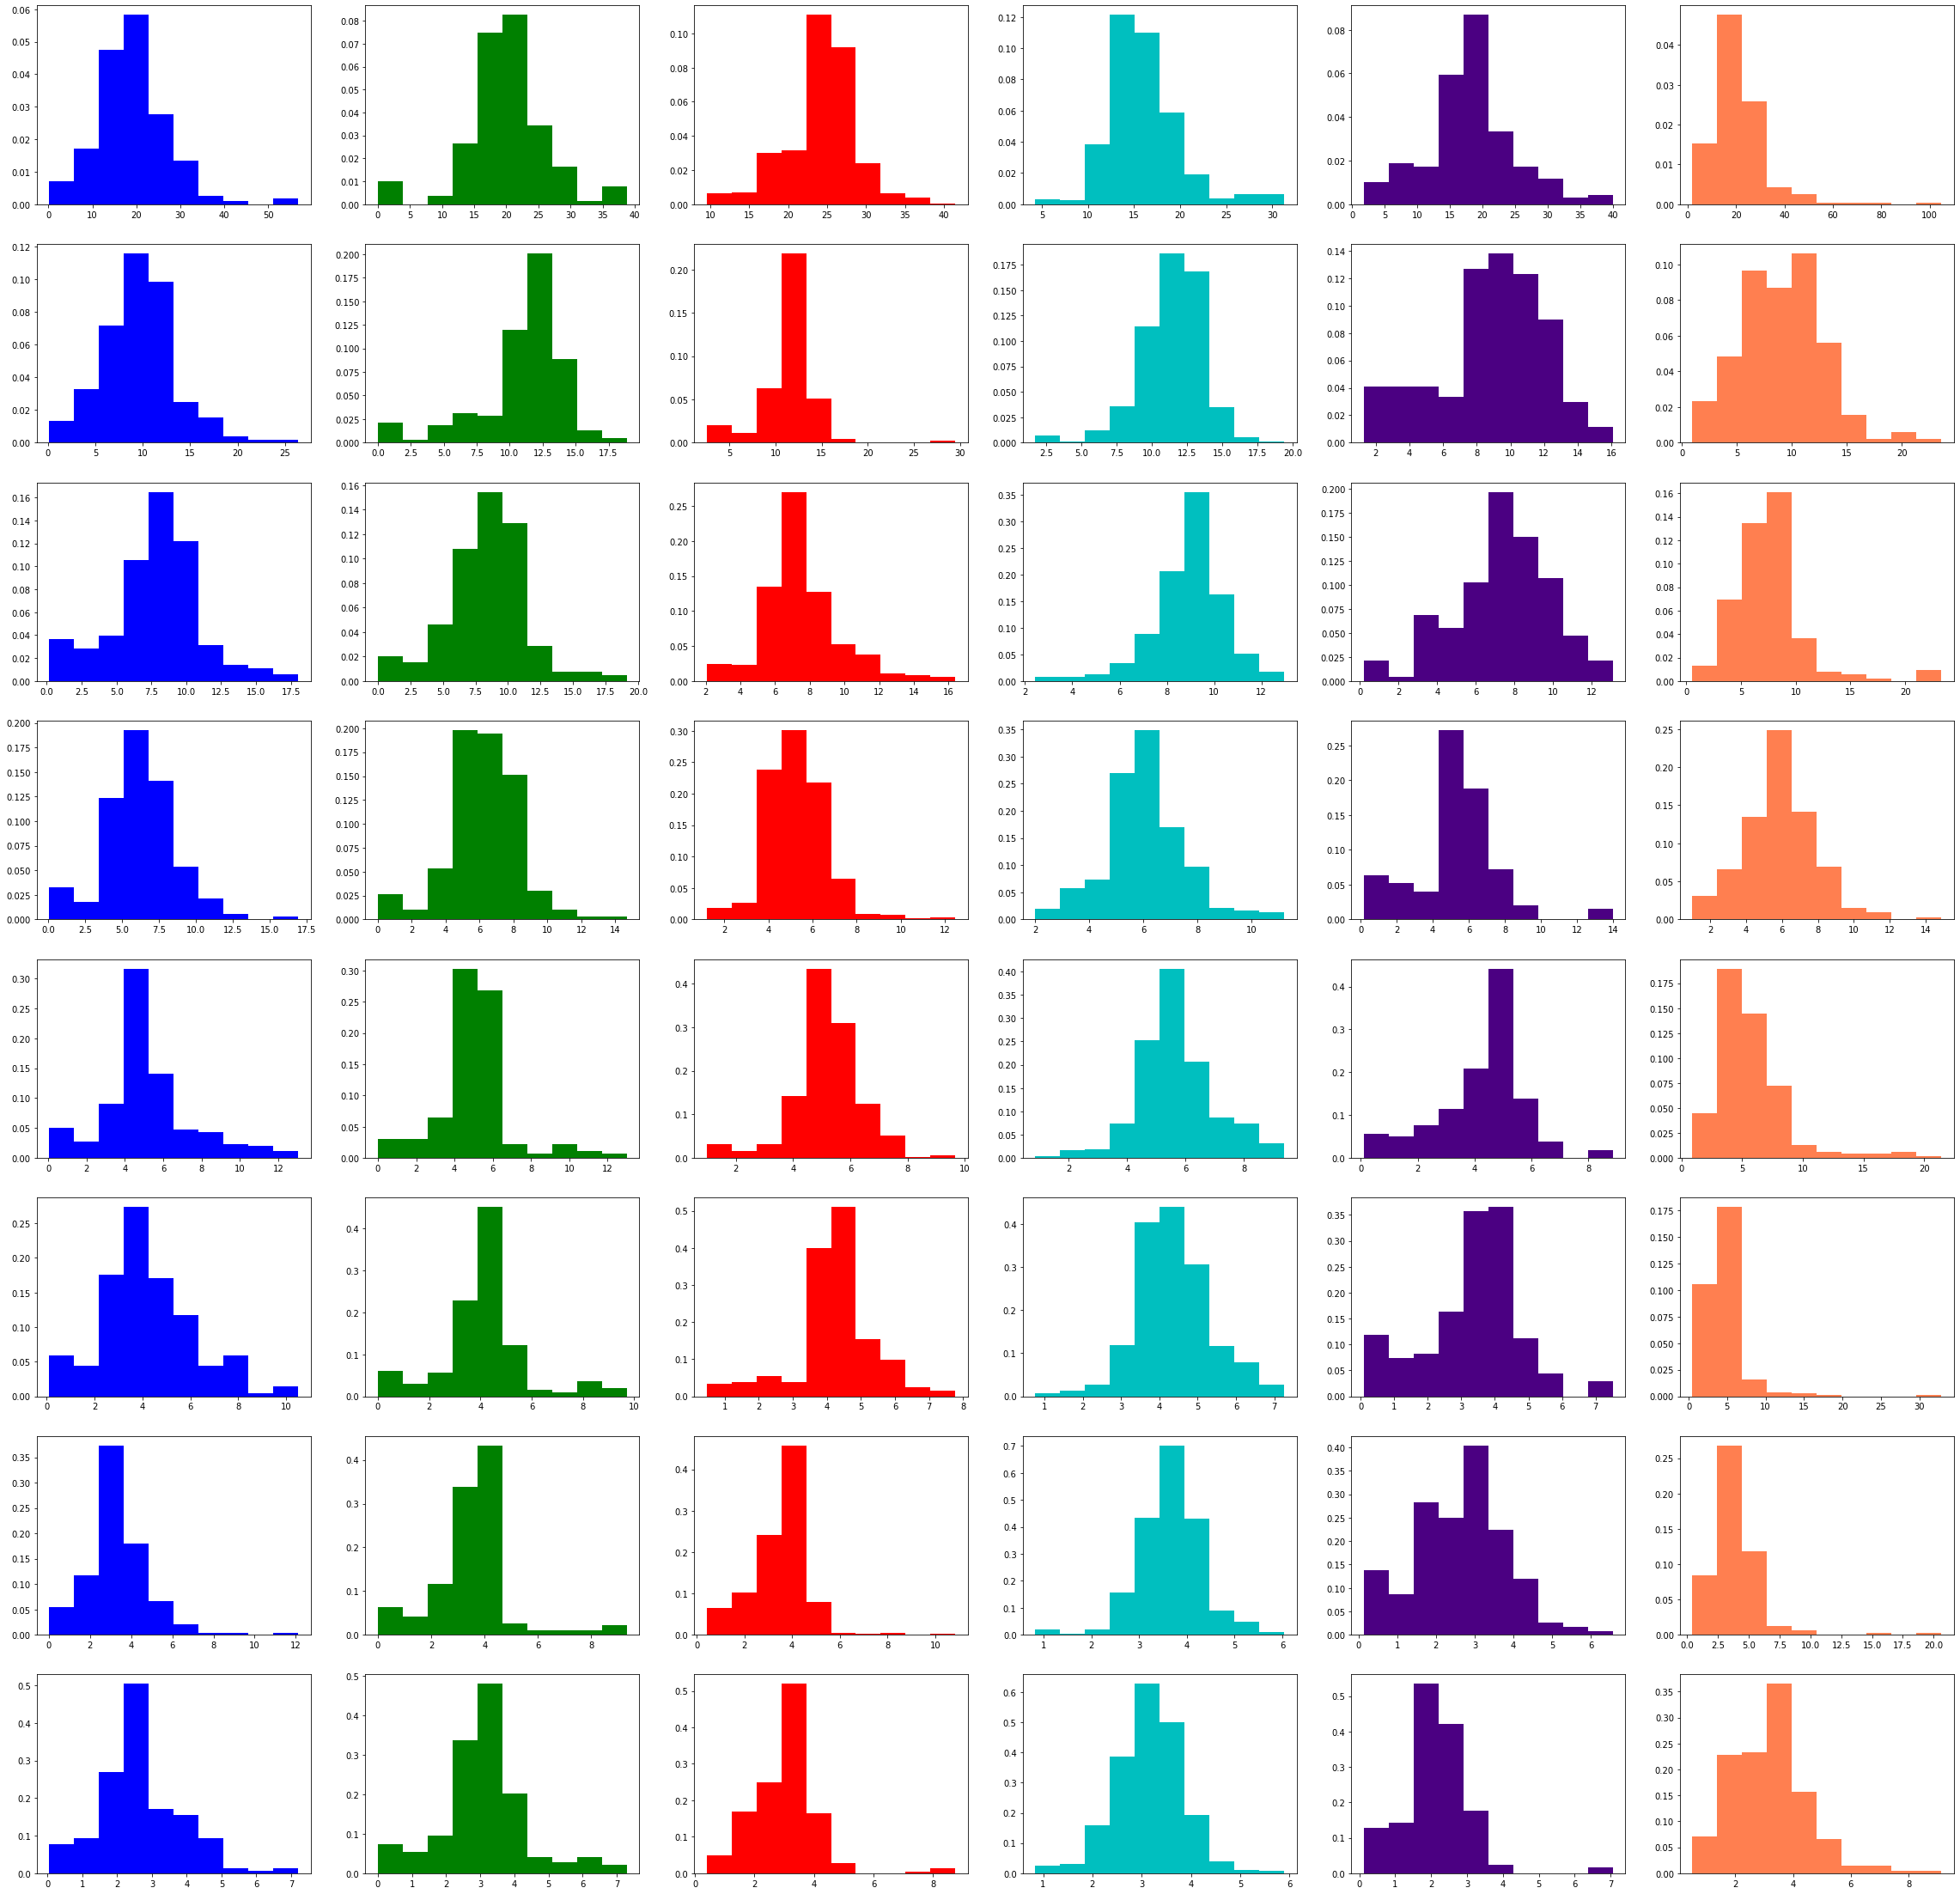

In [213]:
activity_10s = [other_10s, lpd_10s, gpd_10s, lrda_10s, grda_10s, seizure_10s]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(8, 6)
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(len(df_10s_cols)):
    for j in range(len(activity_10s)):
        axs[i][j].hist(activity_10s[j][df_10s_cols[i]], density = True, color = colors[j])
        
plt.show()

#### 10-20s PTP Histograms

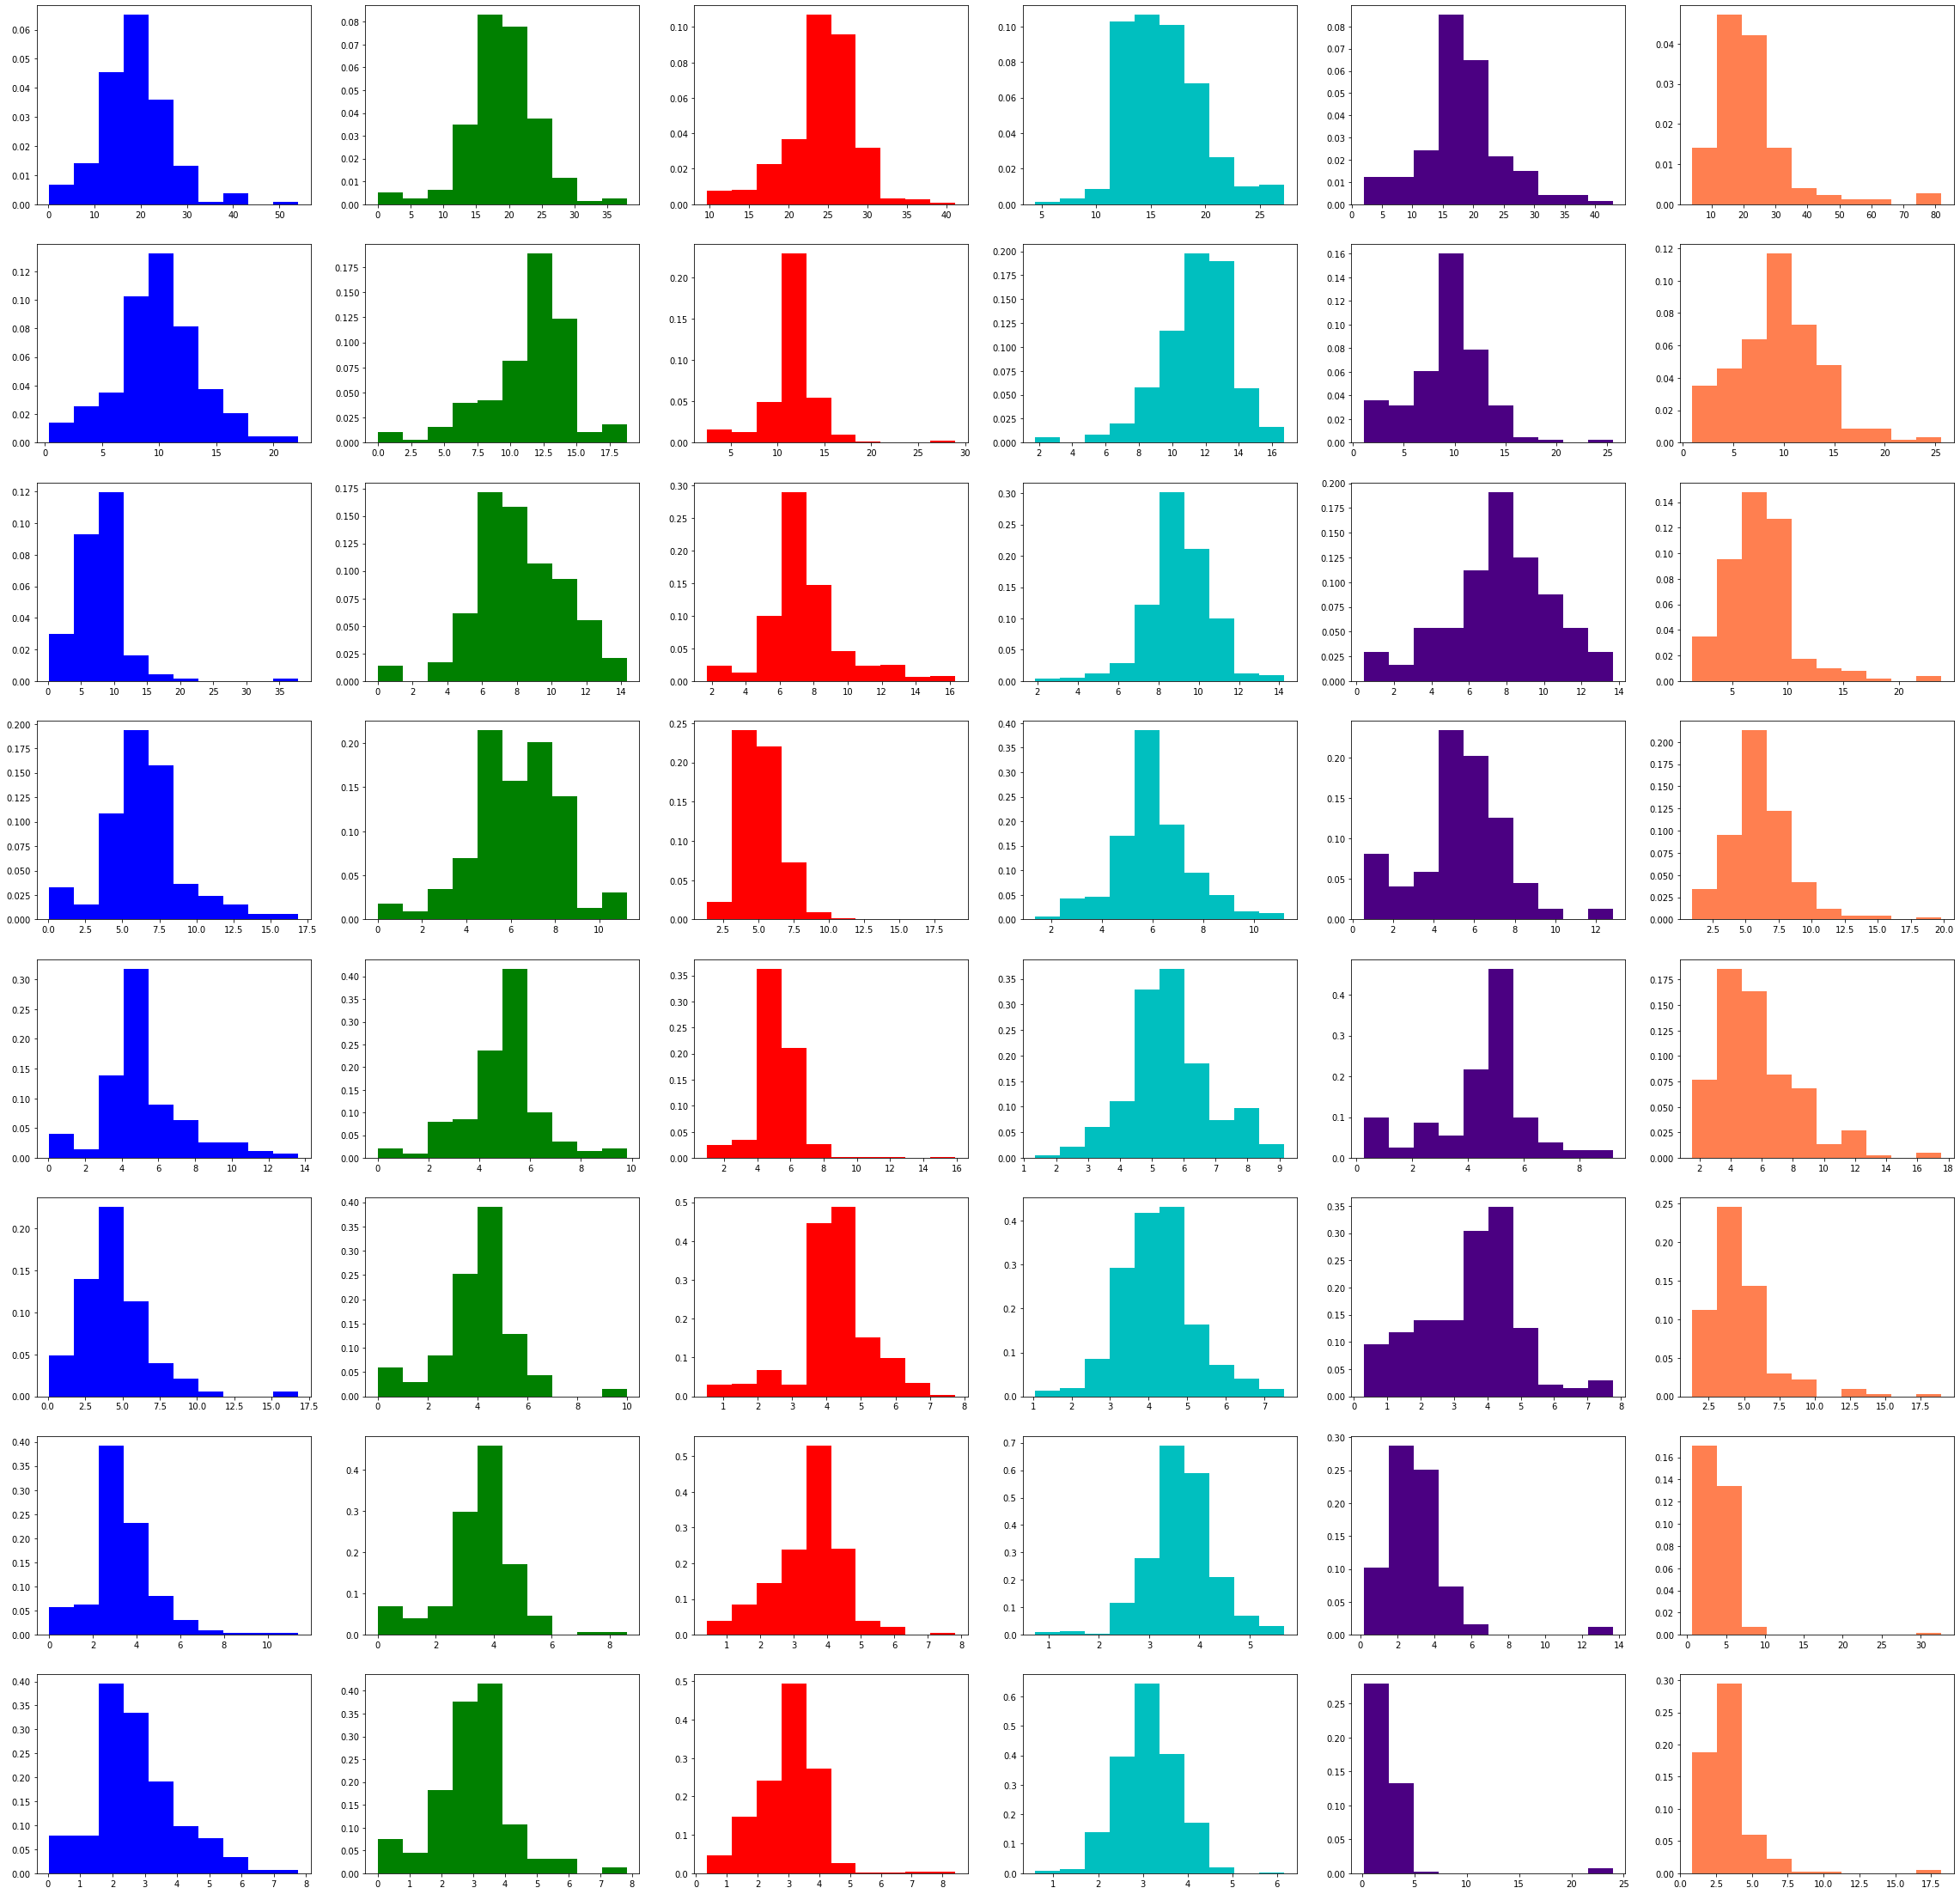

In [215]:
activity_20s = [other_20s, lpd_20s, gpd_20s, lrda_20s, grda_20s, seizure_20s]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(8, 6)
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(len(df_20s_cols)):
    for j in range(len(activity_20s)):
        axs[i][j].hist(activity_20s[j][df_20s_cols[i]], density = True, color = colors[j])
        
plt.show()

#### 20-30s PTP Histograms

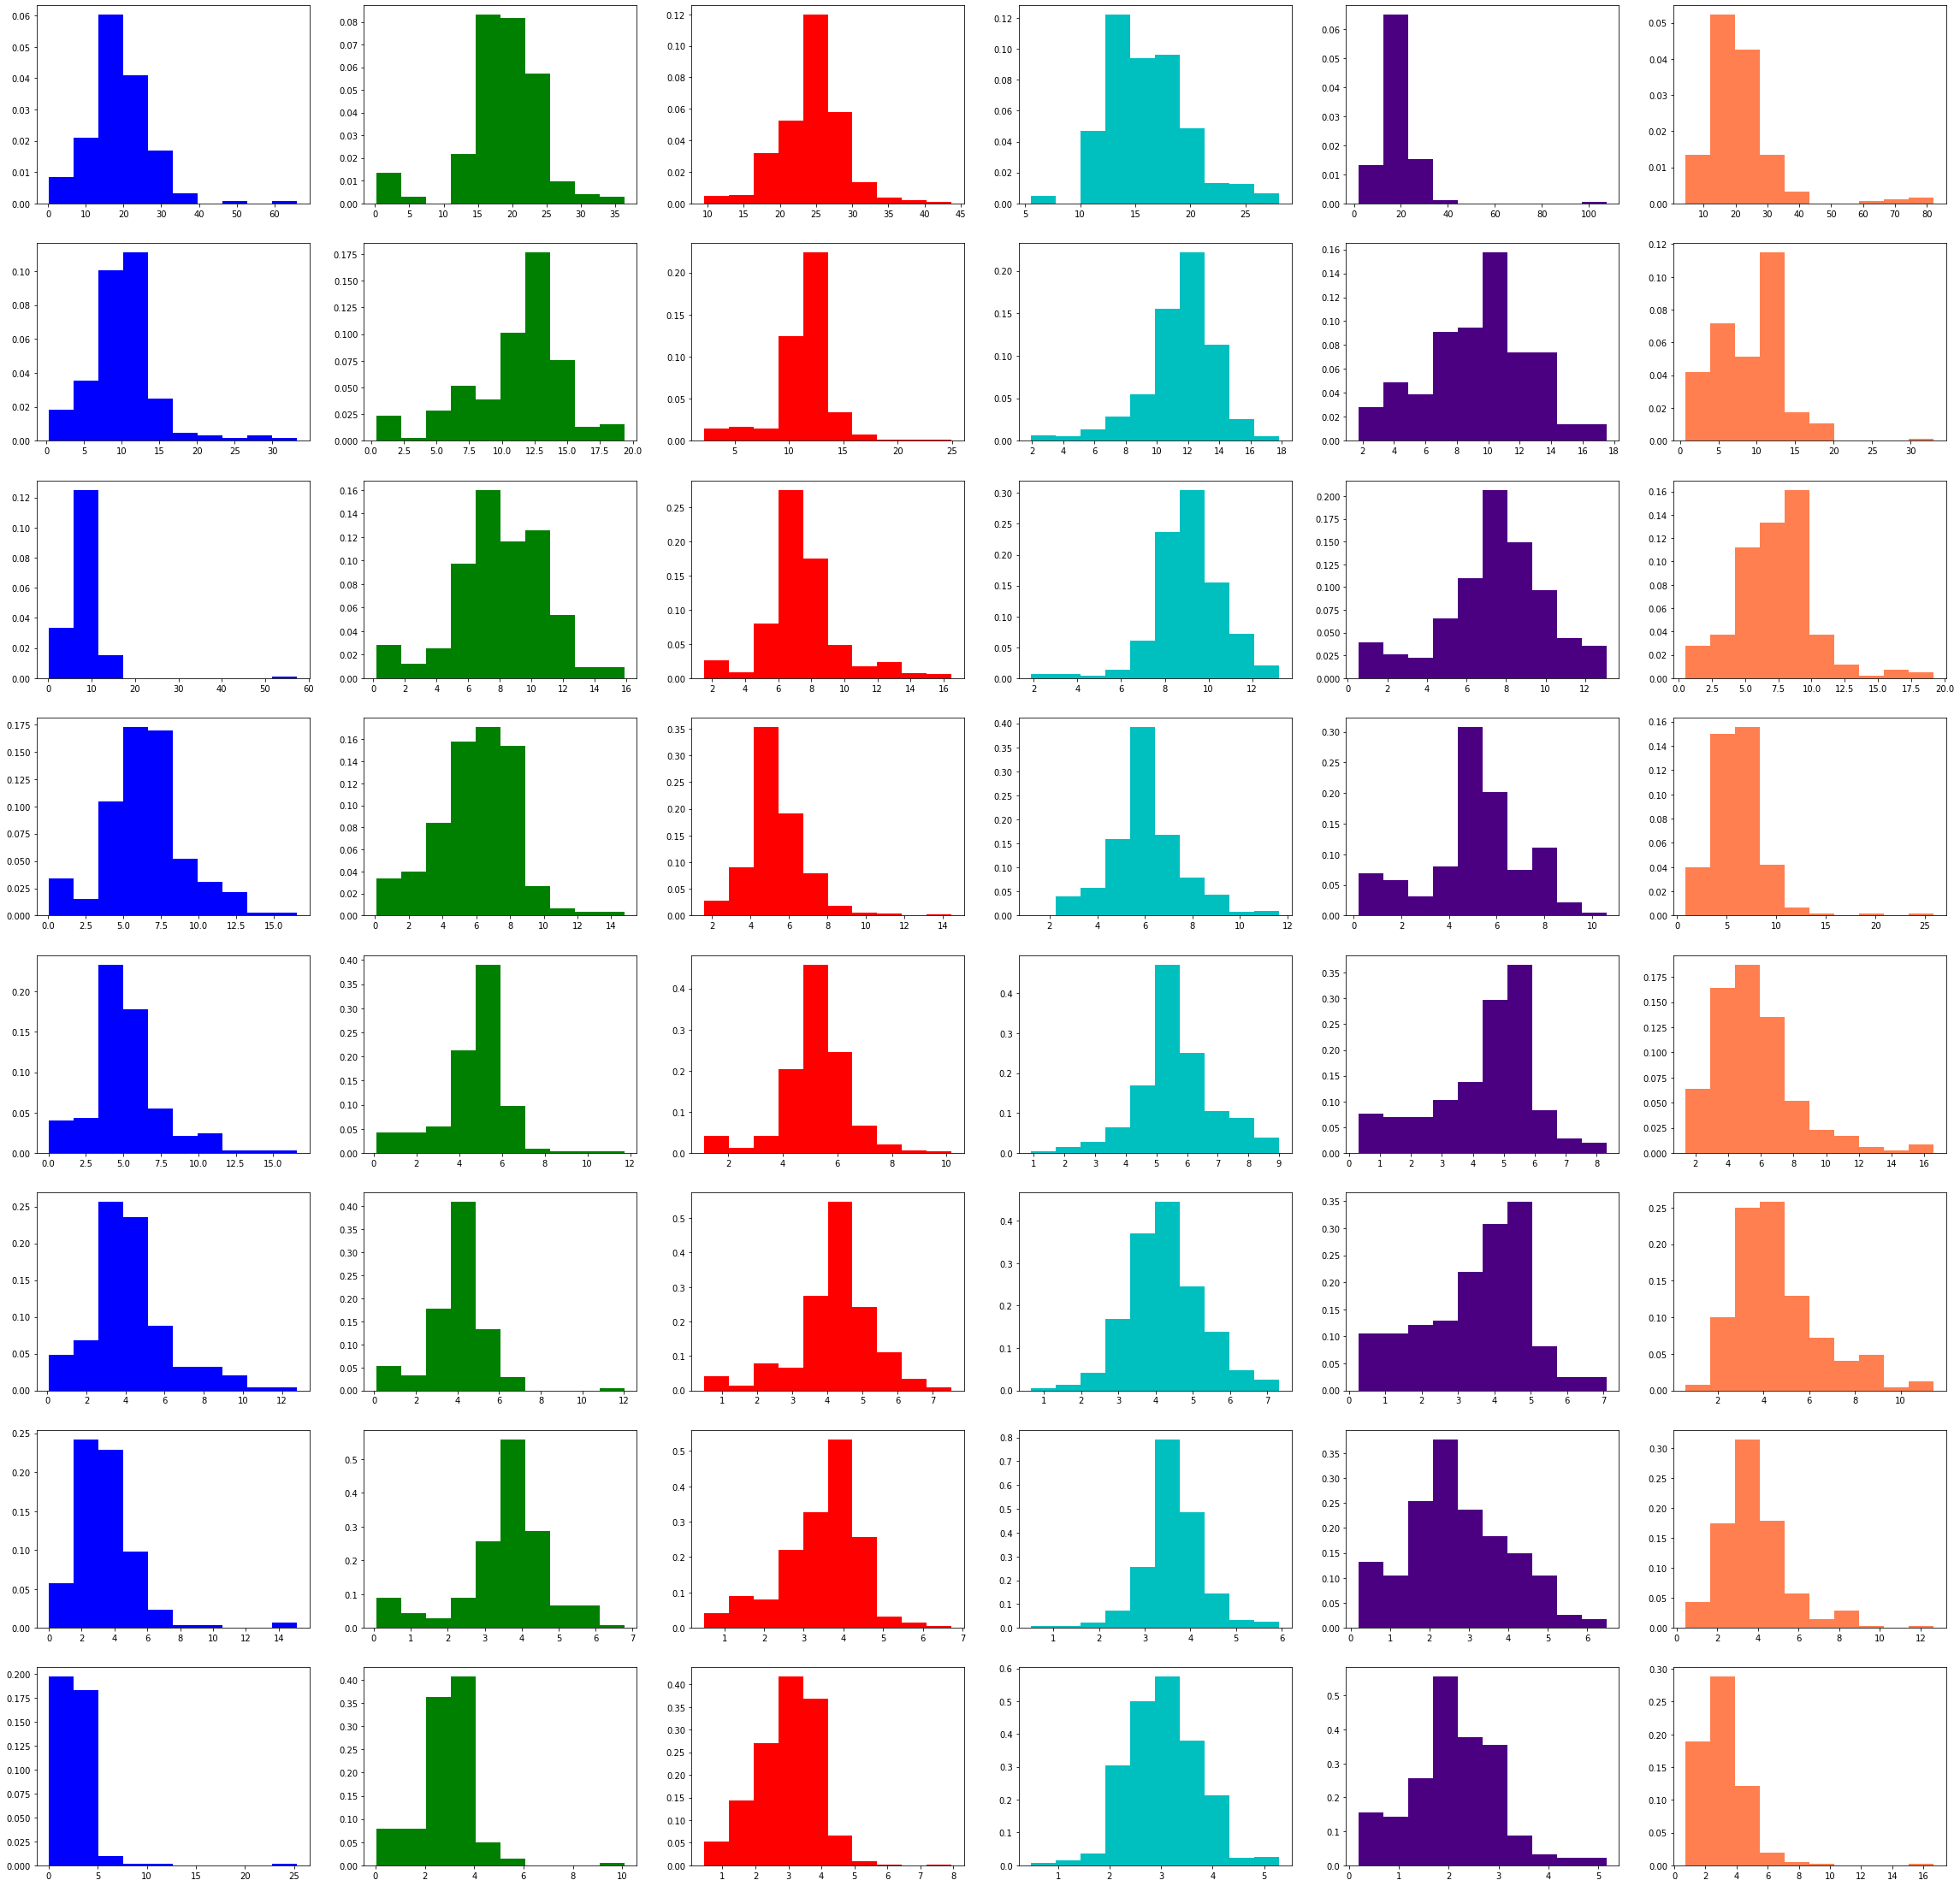

In [217]:
activity_30s = [other_30s, lpd_30s, gpd_30s, lrda_30s, grda_30s, seizure_30s]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(8, 6)
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(len(df_30s_cols)):
    for j in range(len(activity_30s)):
        axs[i][j].hist(activity_30s[j][df_30s_cols[i]], density = True, color = colors[j])
        
plt.show()

#### 30-40s PTP Histograms

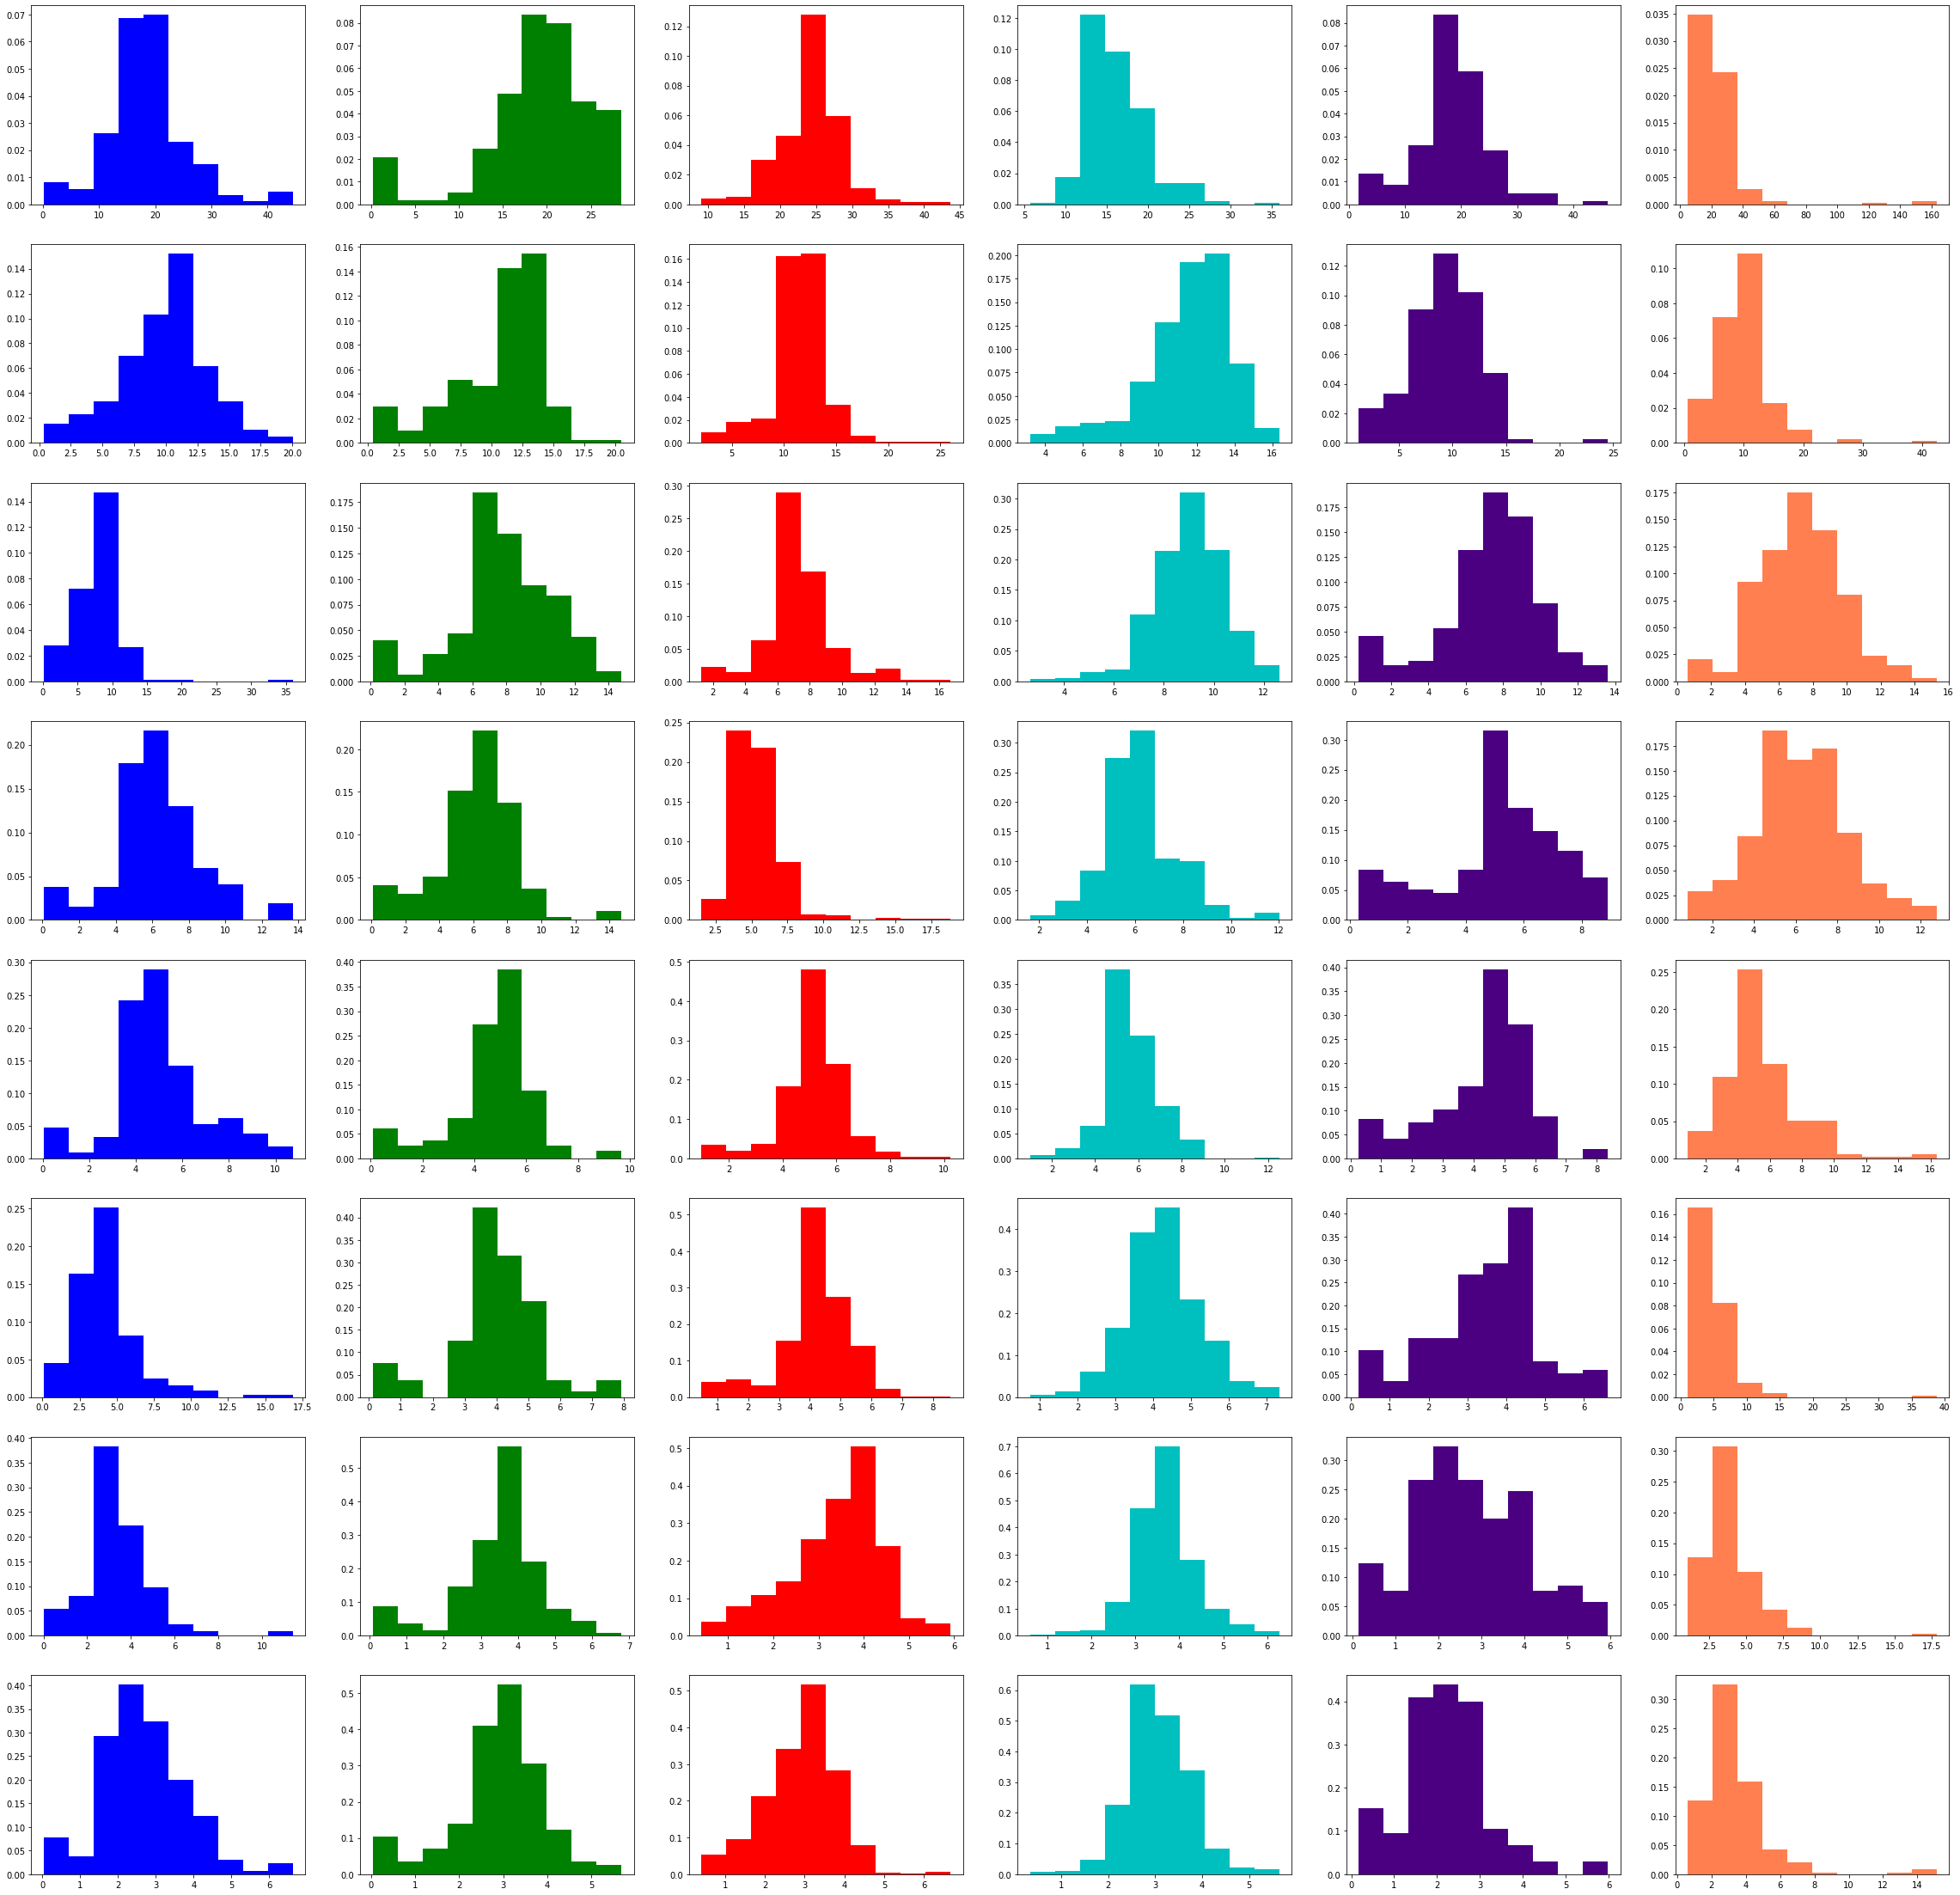

In [219]:
activity_40s = [other_40s, lpd_40s, gpd_40s, lrda_40s, grda_40s, seizure_40s]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(8, 6)
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(len(df_40s_cols)):
    for j in range(len(activity_40s)):
        axs[i][j].hist(activity_40s[j][df_40s_cols[i]], density = True, color = colors[j])
        
plt.show()

#### 40-50s PTP Histograms

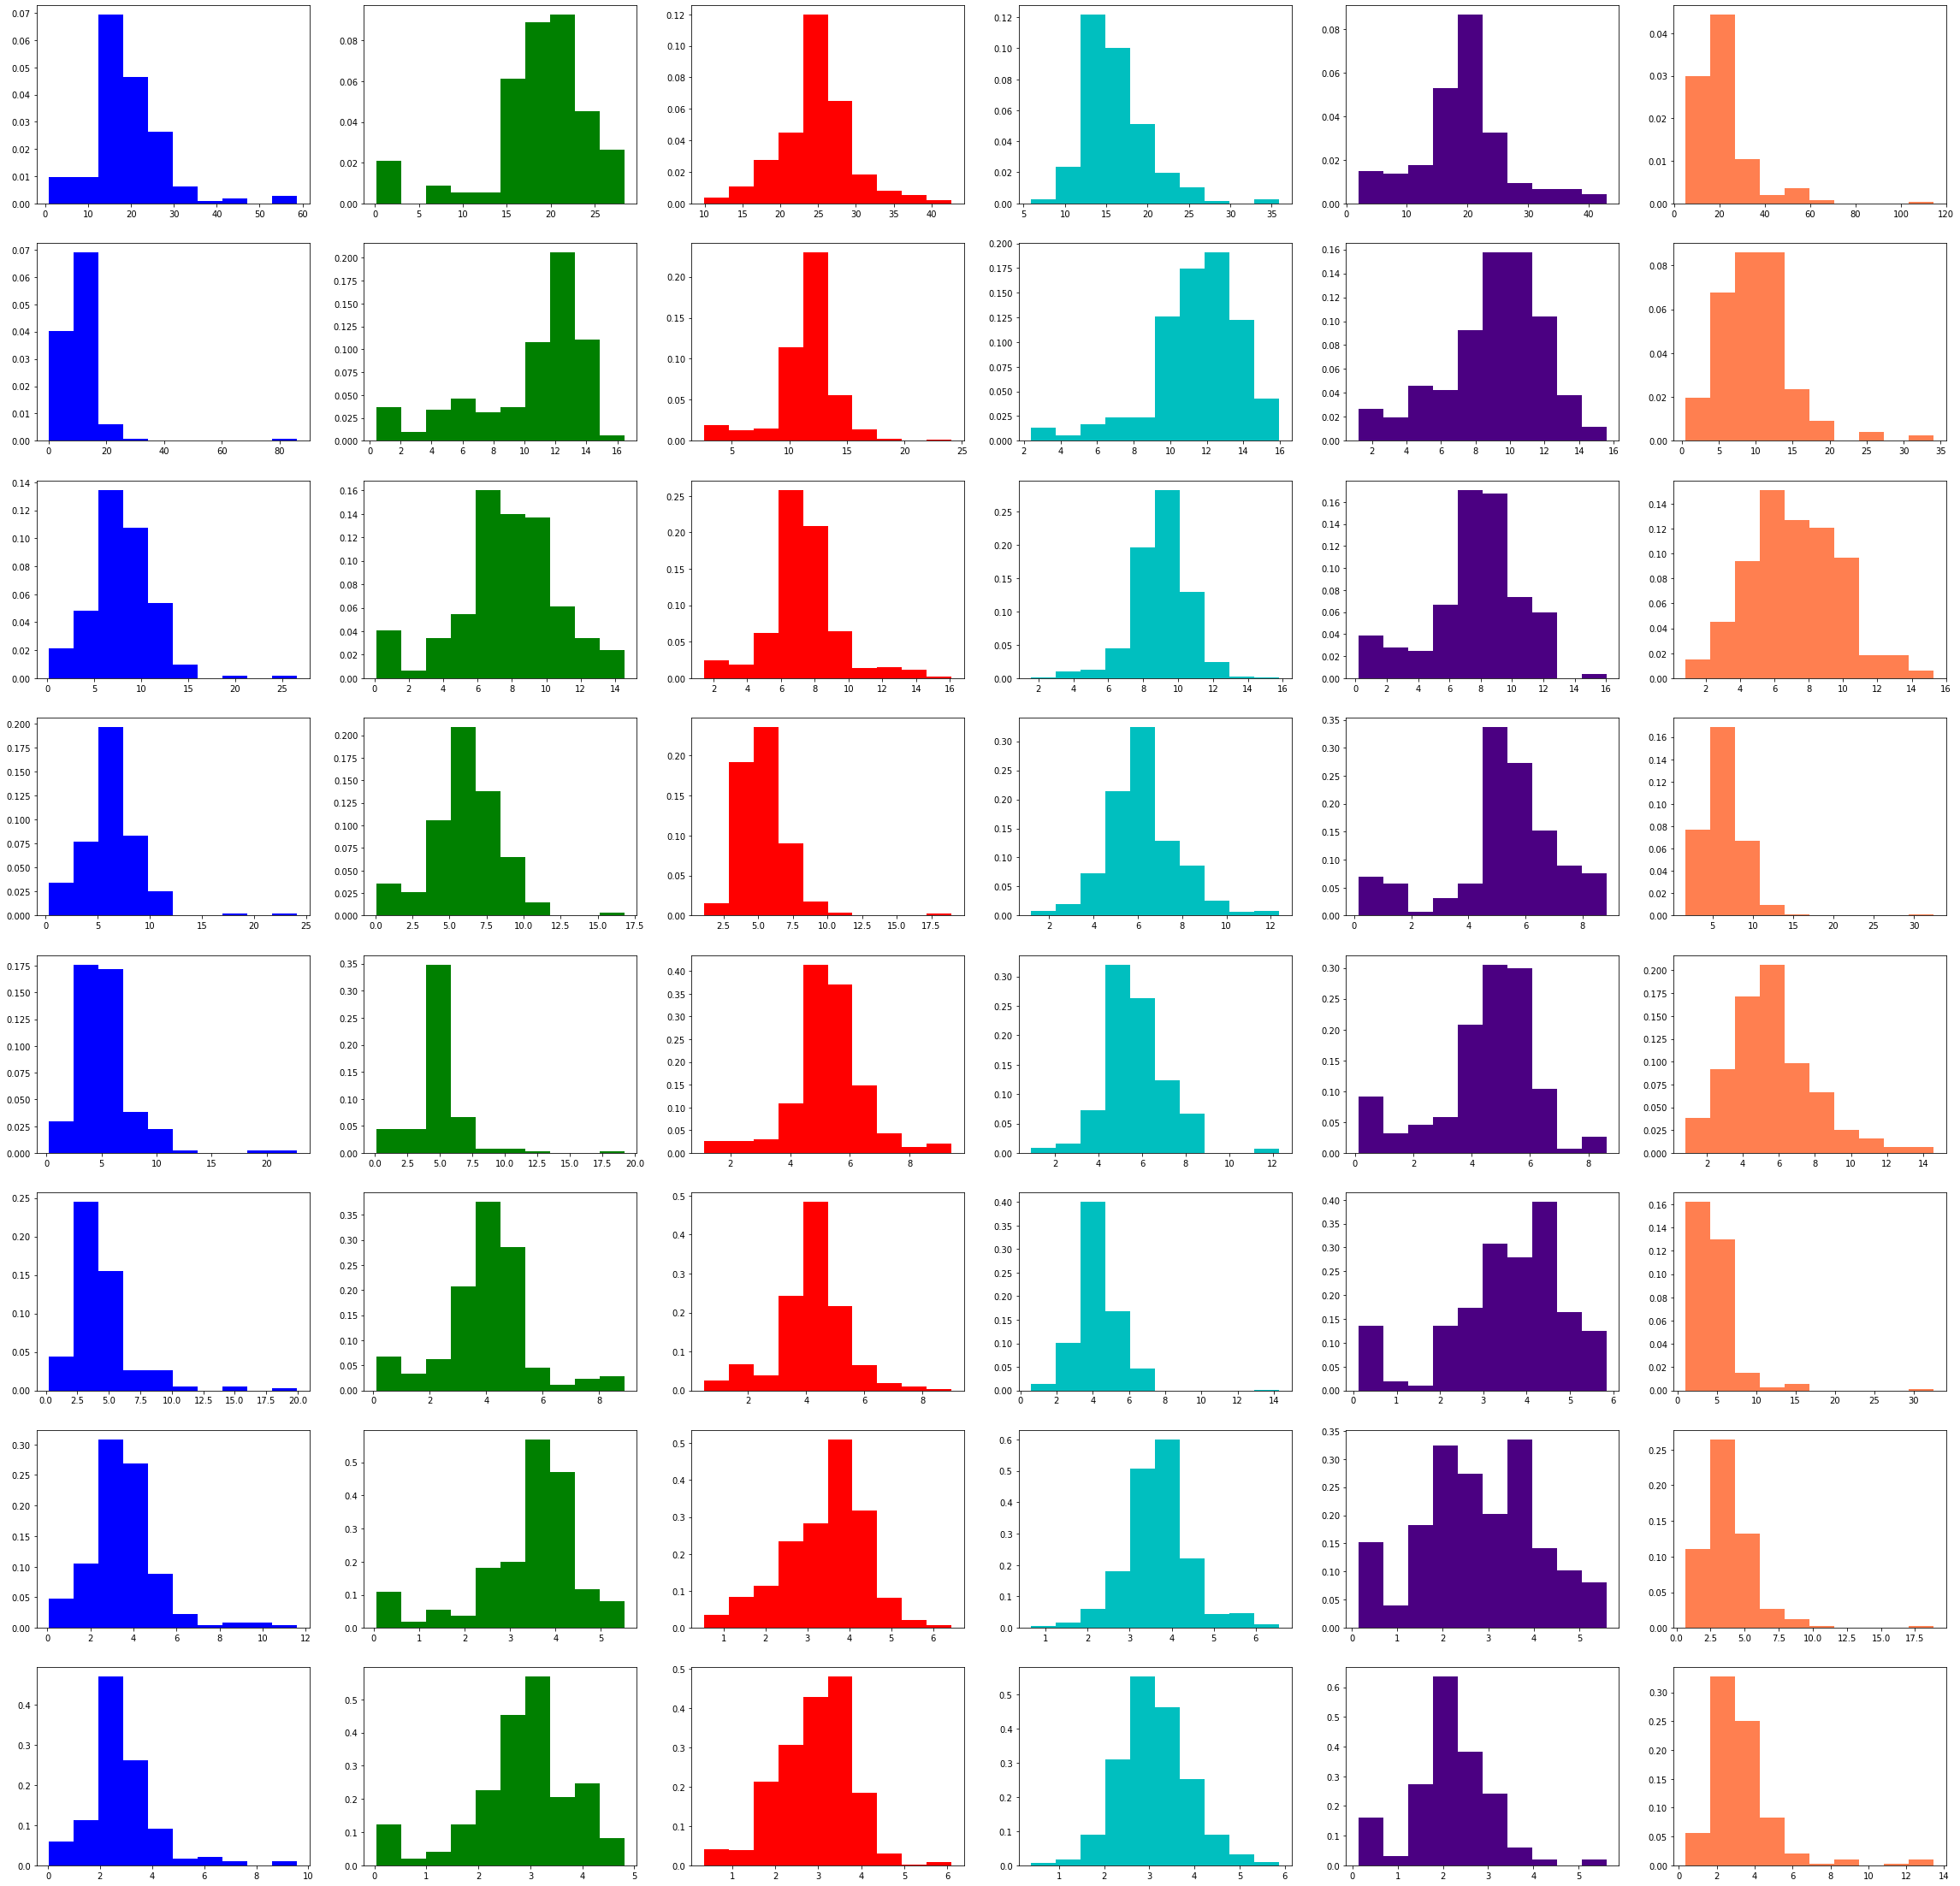

In [221]:
activity_50s = [other_50s, lpd_50s, gpd_50s, lrda_50s, grda_50s, seizure_50s]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(8, 6)
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(len(df_50s_cols)):
    for j in range(len(activity_50s)):
        axs[i][j].hist(activity_50s[j][df_50s_cols[i]], density = True, color = colors[j])
        
plt.show()

### Variance Histograms Across Activity Type

#### 0-10s Variance

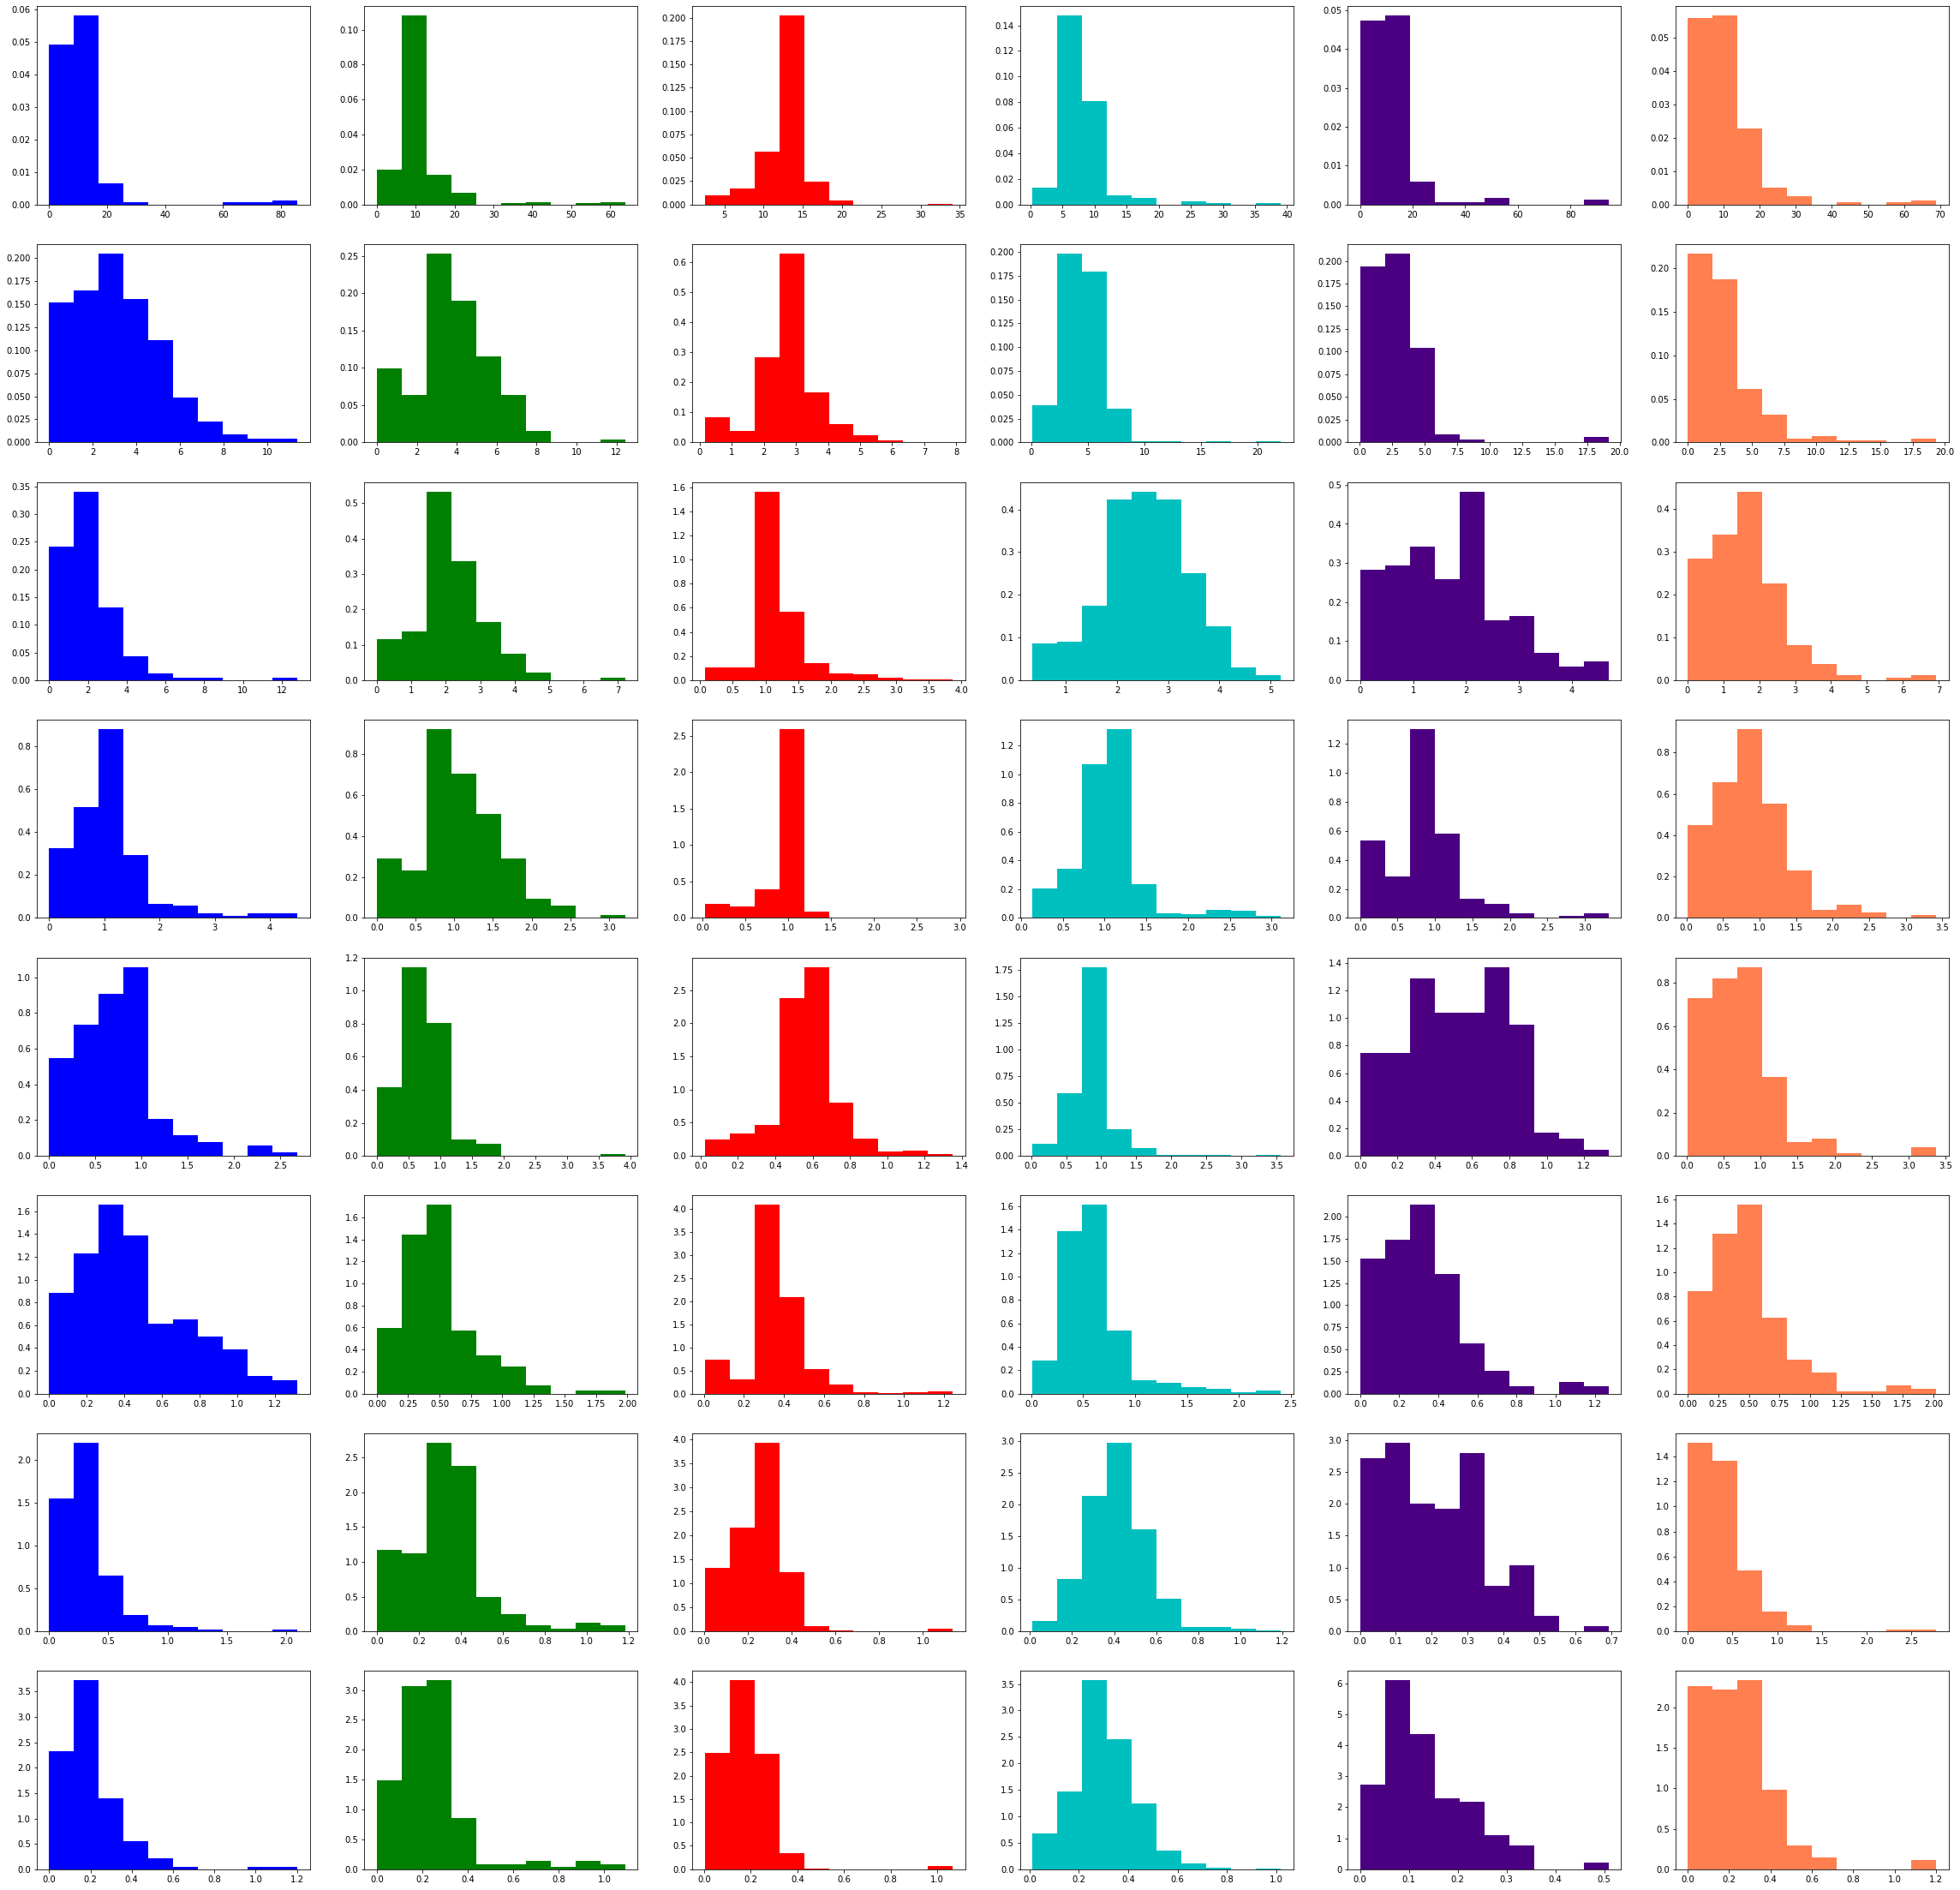

In [240]:
act_var_10s = [other_var_10s, lpd_var_10s, gpd_var_10s, lrda_var_10s, grda_var_10s, seizure_var_10s]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(8, 6)
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(len(cv_10s)):
    for j in range(len(act_var_10s)):
        axs[i][j].hist(act_var_10s[j][cv_10s[i]], density = True, color = colors[j])

plt.show()

#### 10-20s Variance

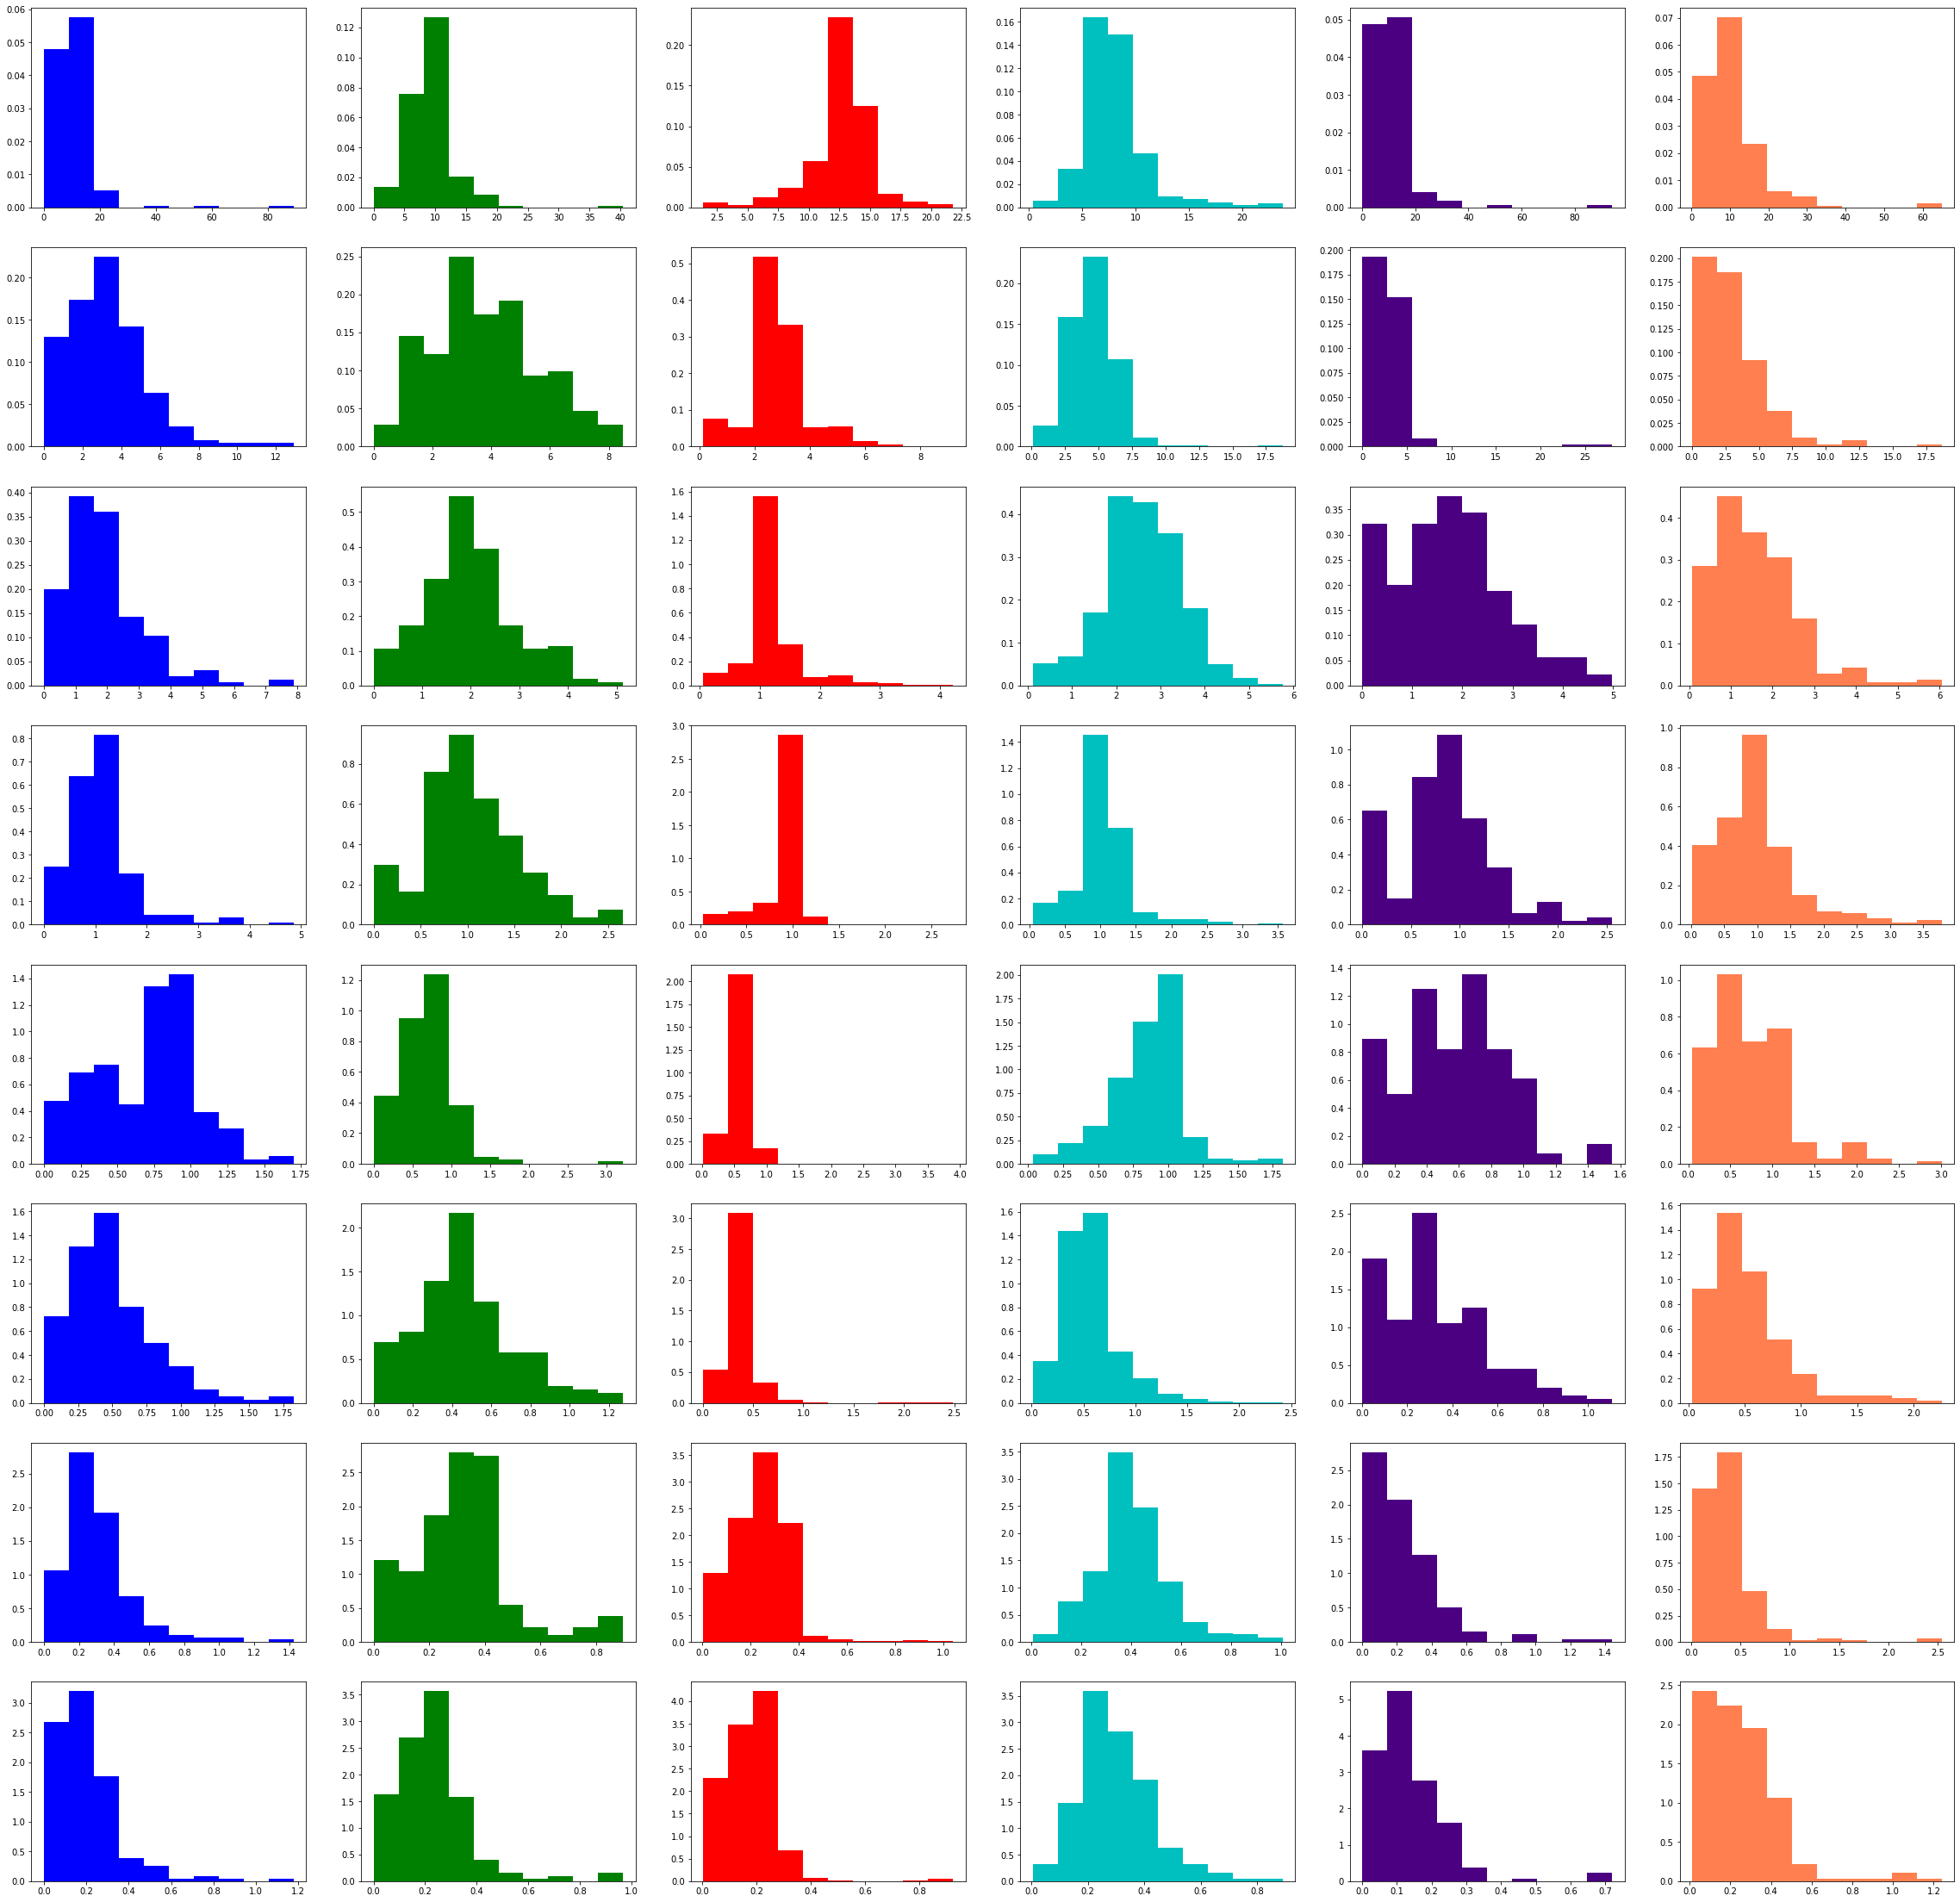

In [242]:
act_var_20s = [other_var_20s, lpd_var_20s, gpd_var_20s, lrda_var_20s, grda_var_20s, seizure_var_20s]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(8, 6)
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(len(cv_20s)):
    for j in range(len(act_var_20s)):
        axs[i][j].hist(act_var_20s[j][cv_20s[i]], density = True, color = colors[j])

plt.show()

#### 20-30s Variance

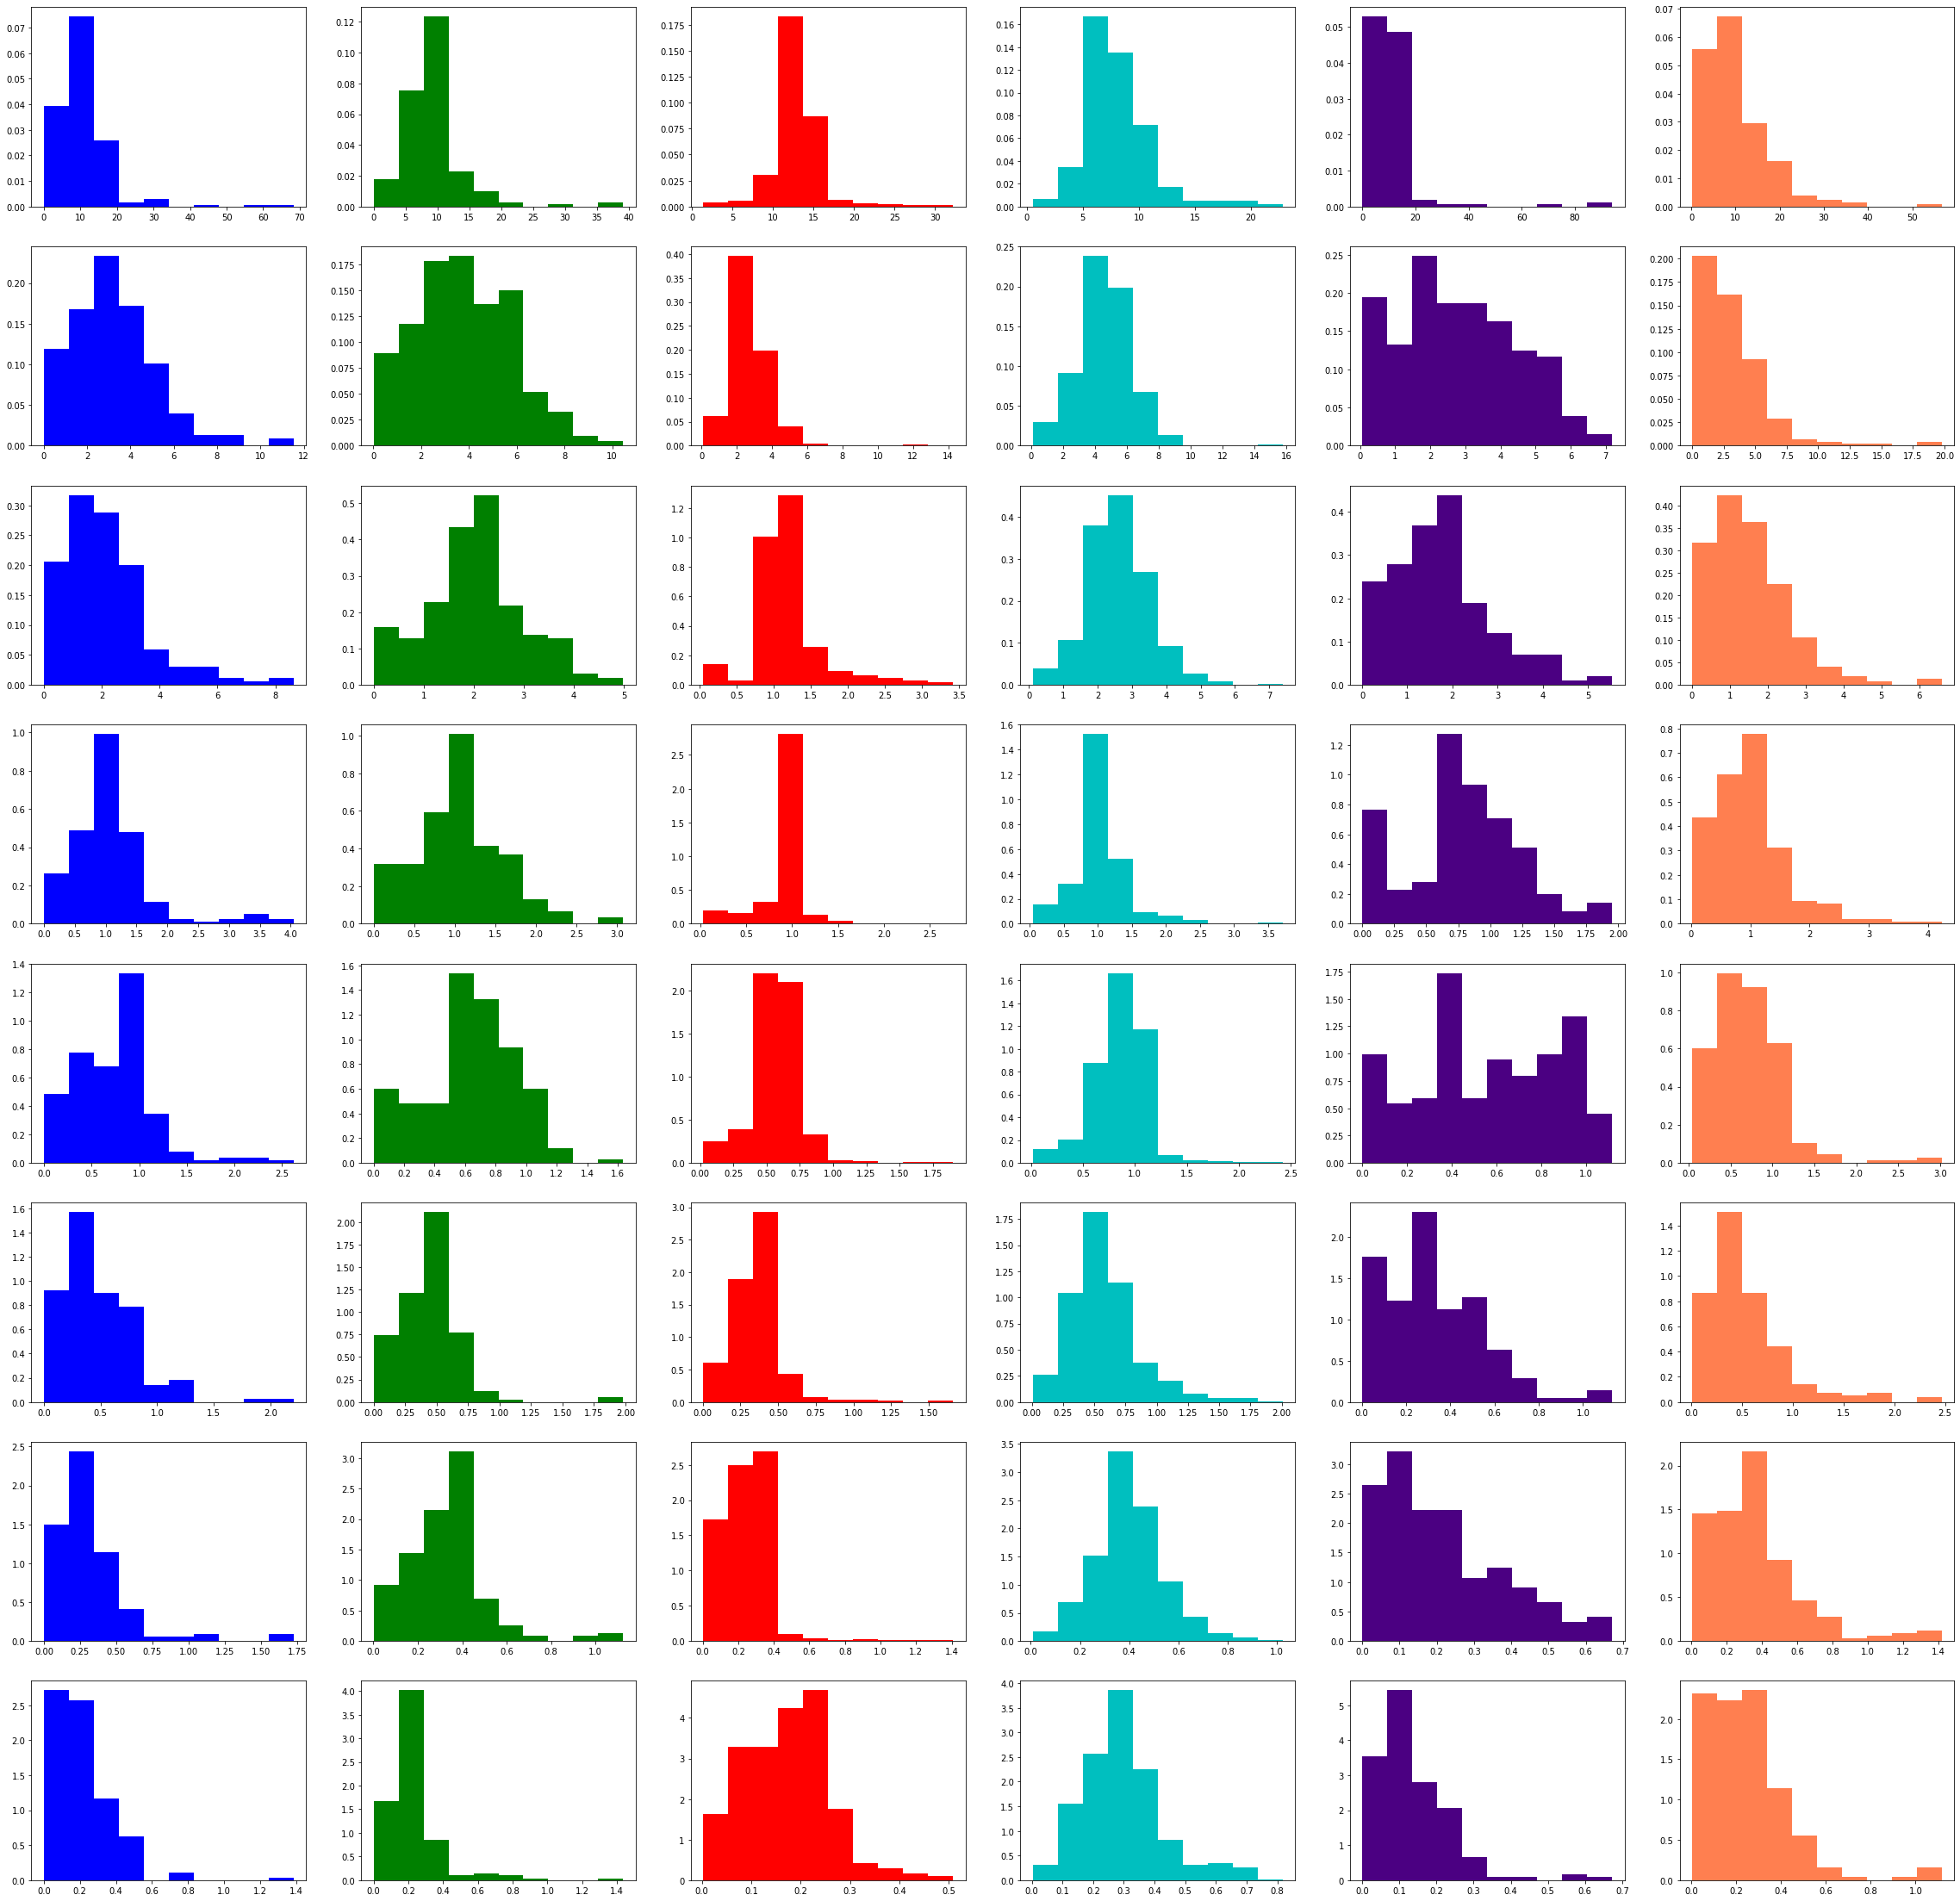

In [244]:
act_var_30s = [other_var_30s, lpd_var_30s, gpd_var_30s, lrda_var_30s, grda_var_30s, seizure_var_30s]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(8, 6)
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(len(cv_30s)):
    for j in range(len(act_var_30s)):
        axs[i][j].hist(act_var_30s[j][cv_30s[i]], density = True, color = colors[j])

plt.show()

#### 30-40s Variance

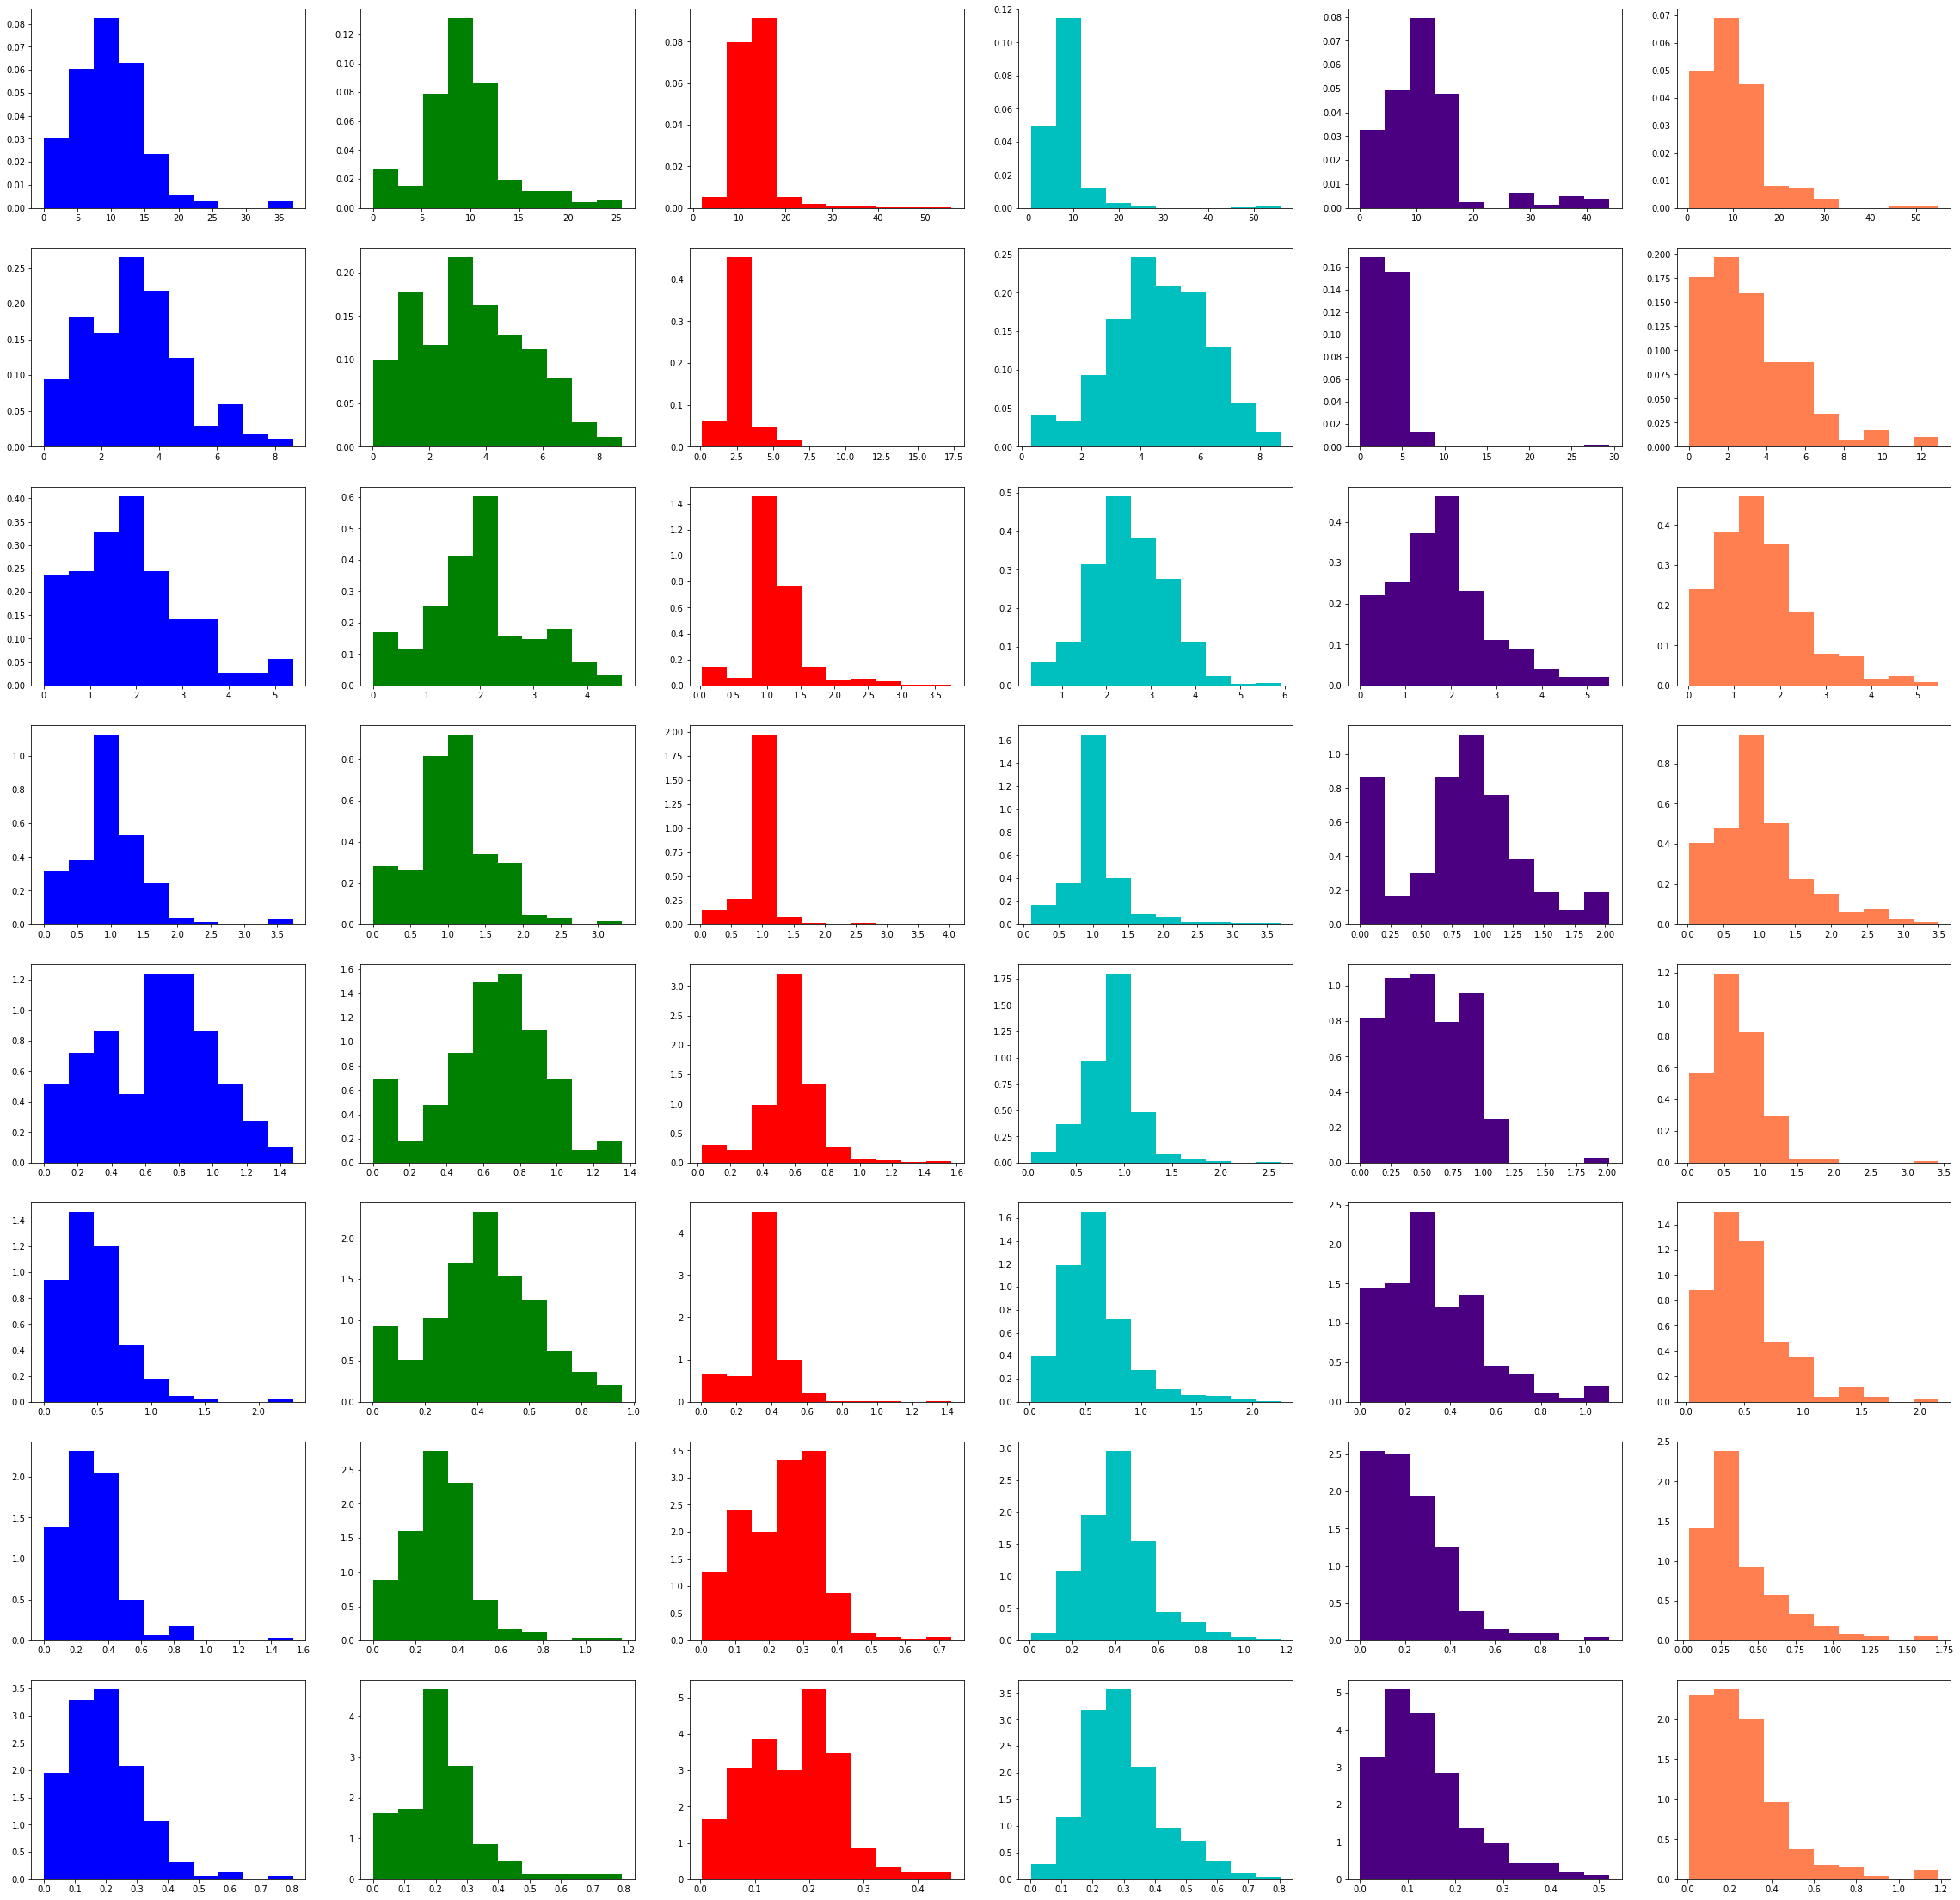

In [246]:
act_var_40s = [other_var_40s, lpd_var_40s, gpd_var_40s, lrda_var_40s, grda_var_40s, seizure_var_40s]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(8, 6)
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(len(cv_40s)):
    for j in range(len(act_var_40s)):
        axs[i][j].hist(act_var_40s[j][cv_40s[i]], density = True, color = colors[j])

plt.show()

#### 40-50s Variance

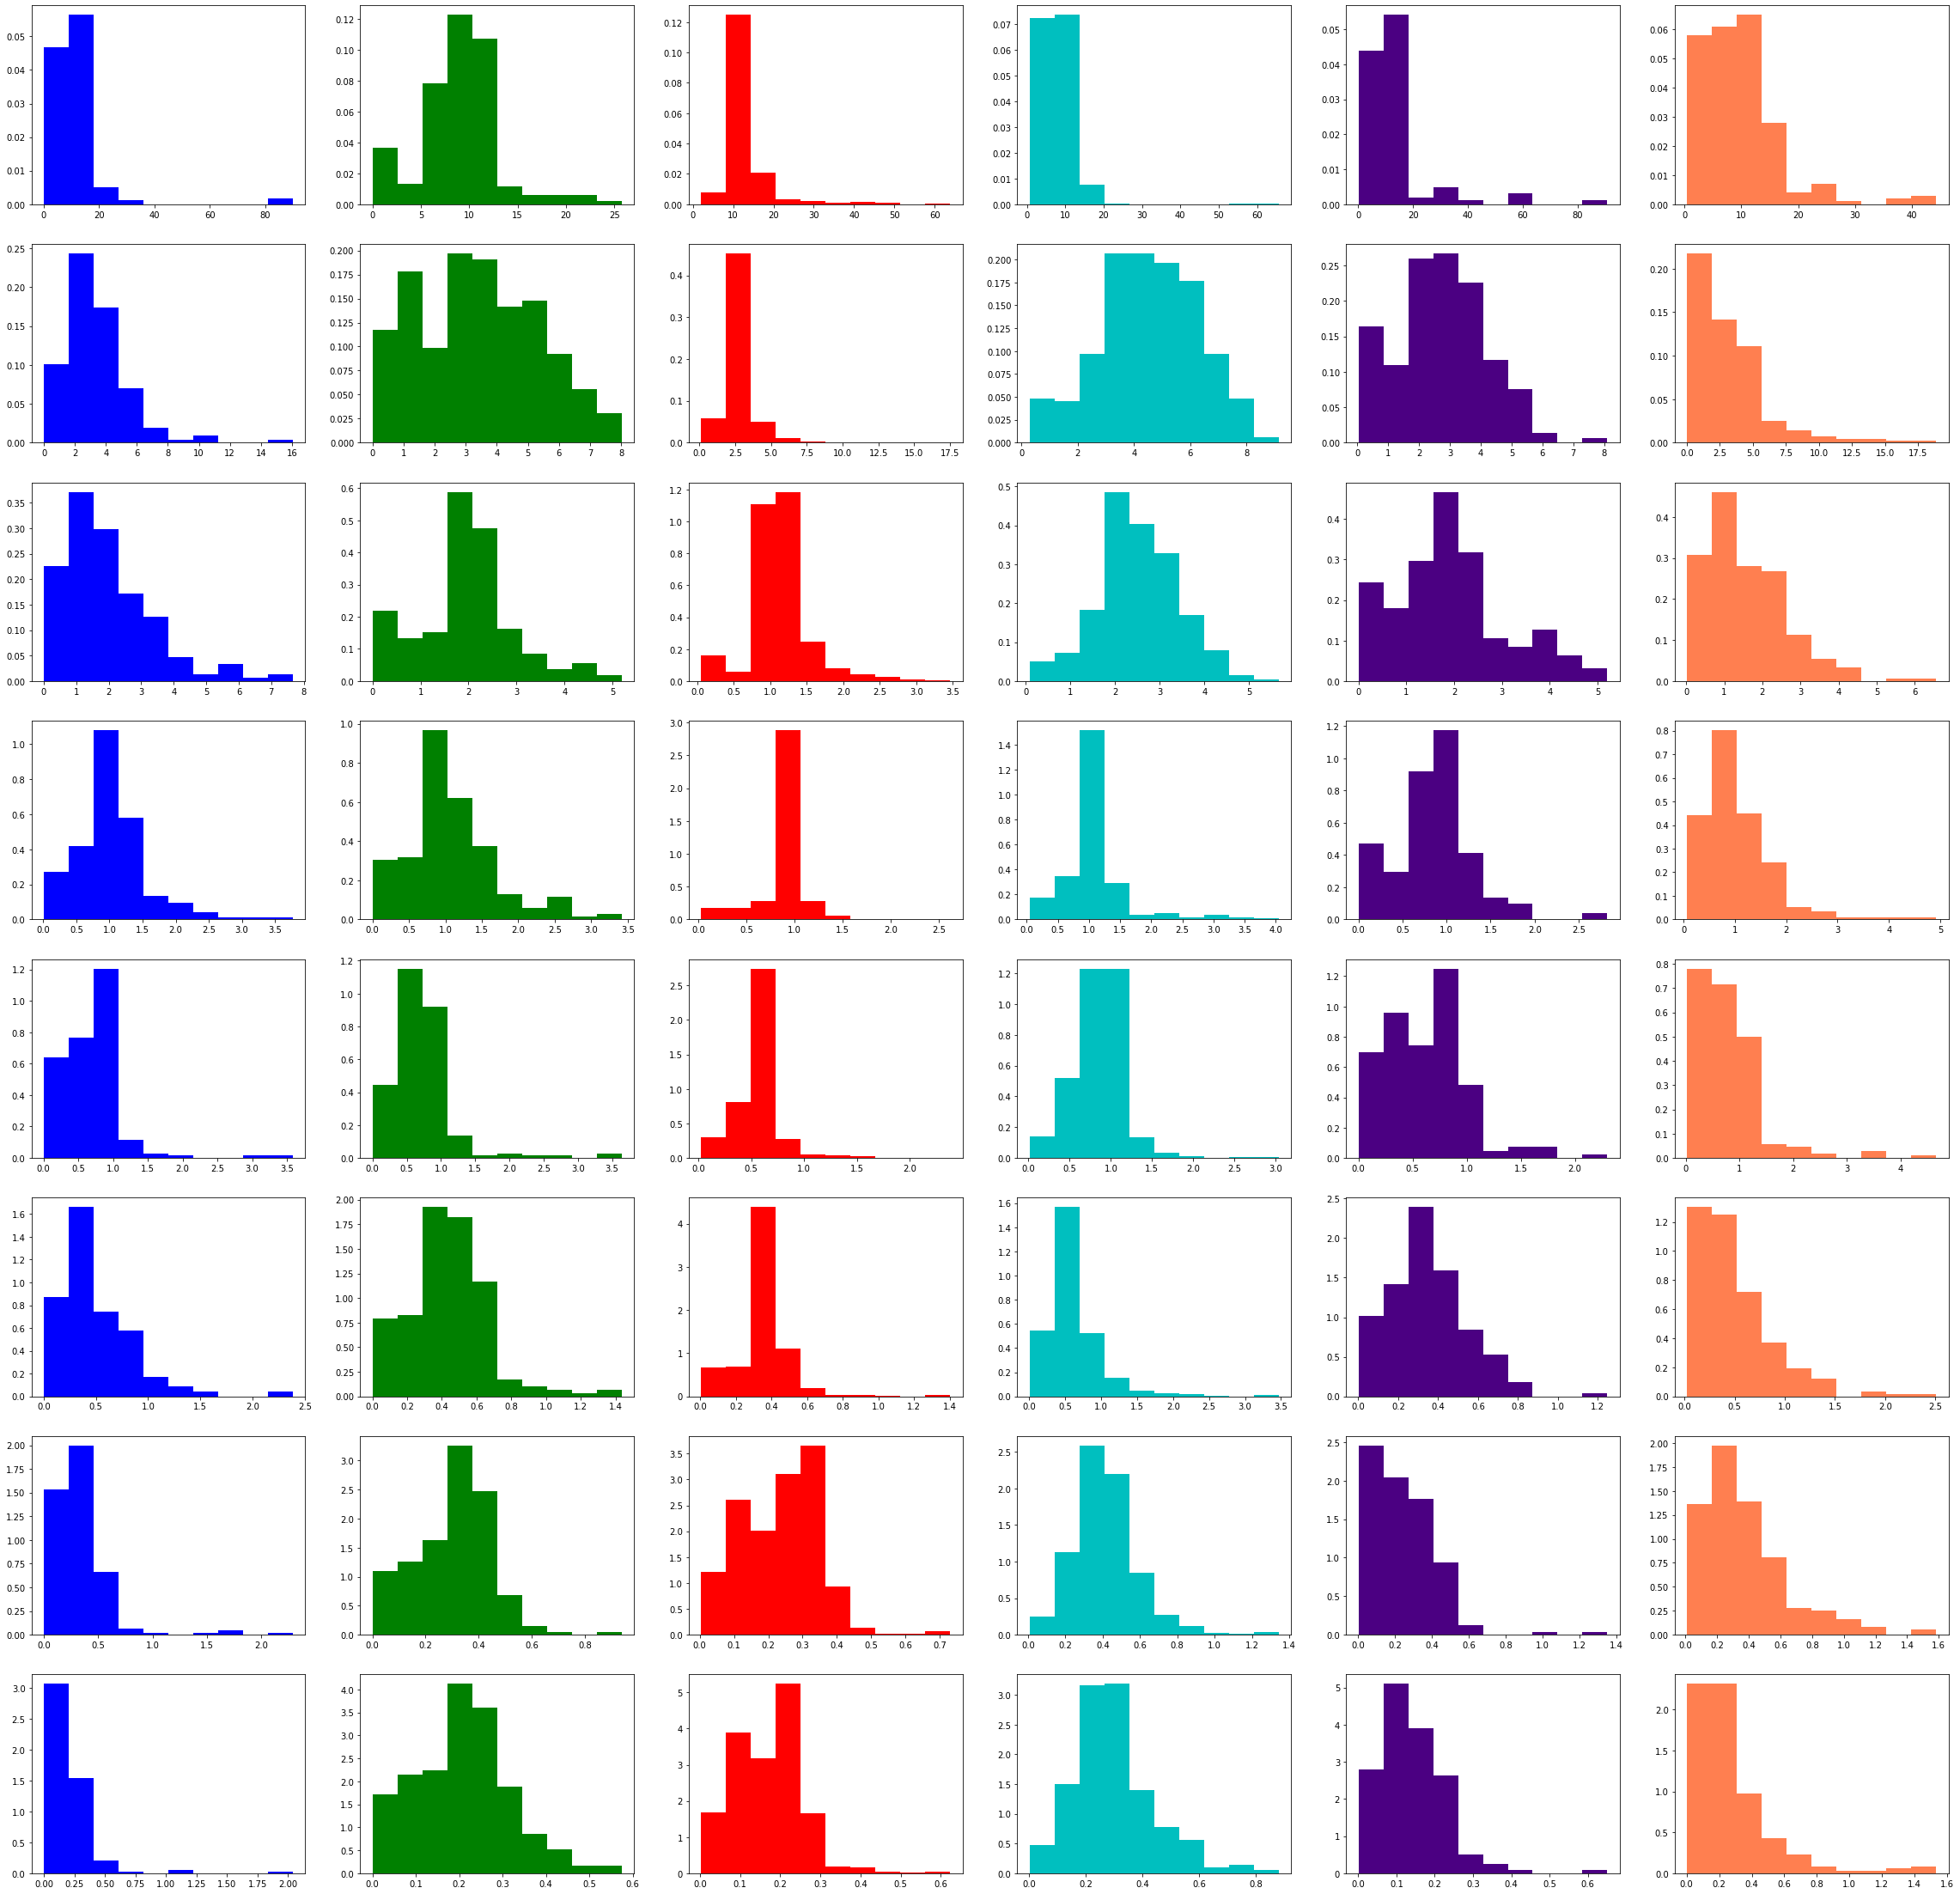

In [248]:
act_var_50s = [other_var_50s, lpd_var_50s, gpd_var_50s, lrda_var_50s, grda_var_50s, seizure_var_50s]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(8, 6)
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(len(cv_50s)):
    for j in range(len(act_var_50s)):
        axs[i][j].hist(act_var_50s[j][cv_50s[i]], density = True, color = colors[j])

plt.show()

### Welch and Frequency Domain Features

There are four relevant bands typically for EEG Analysis: Delta (1-4 Hz), Theta (4-8 Hz), Alpha (8-12 Hz), and Beta (12-30 Hz). The especially important bands for this specific problem are the Alpha and Beta bands. I'm going to use np.trapz to get integrate between these two frequency ranges.

### Alpha Histograms

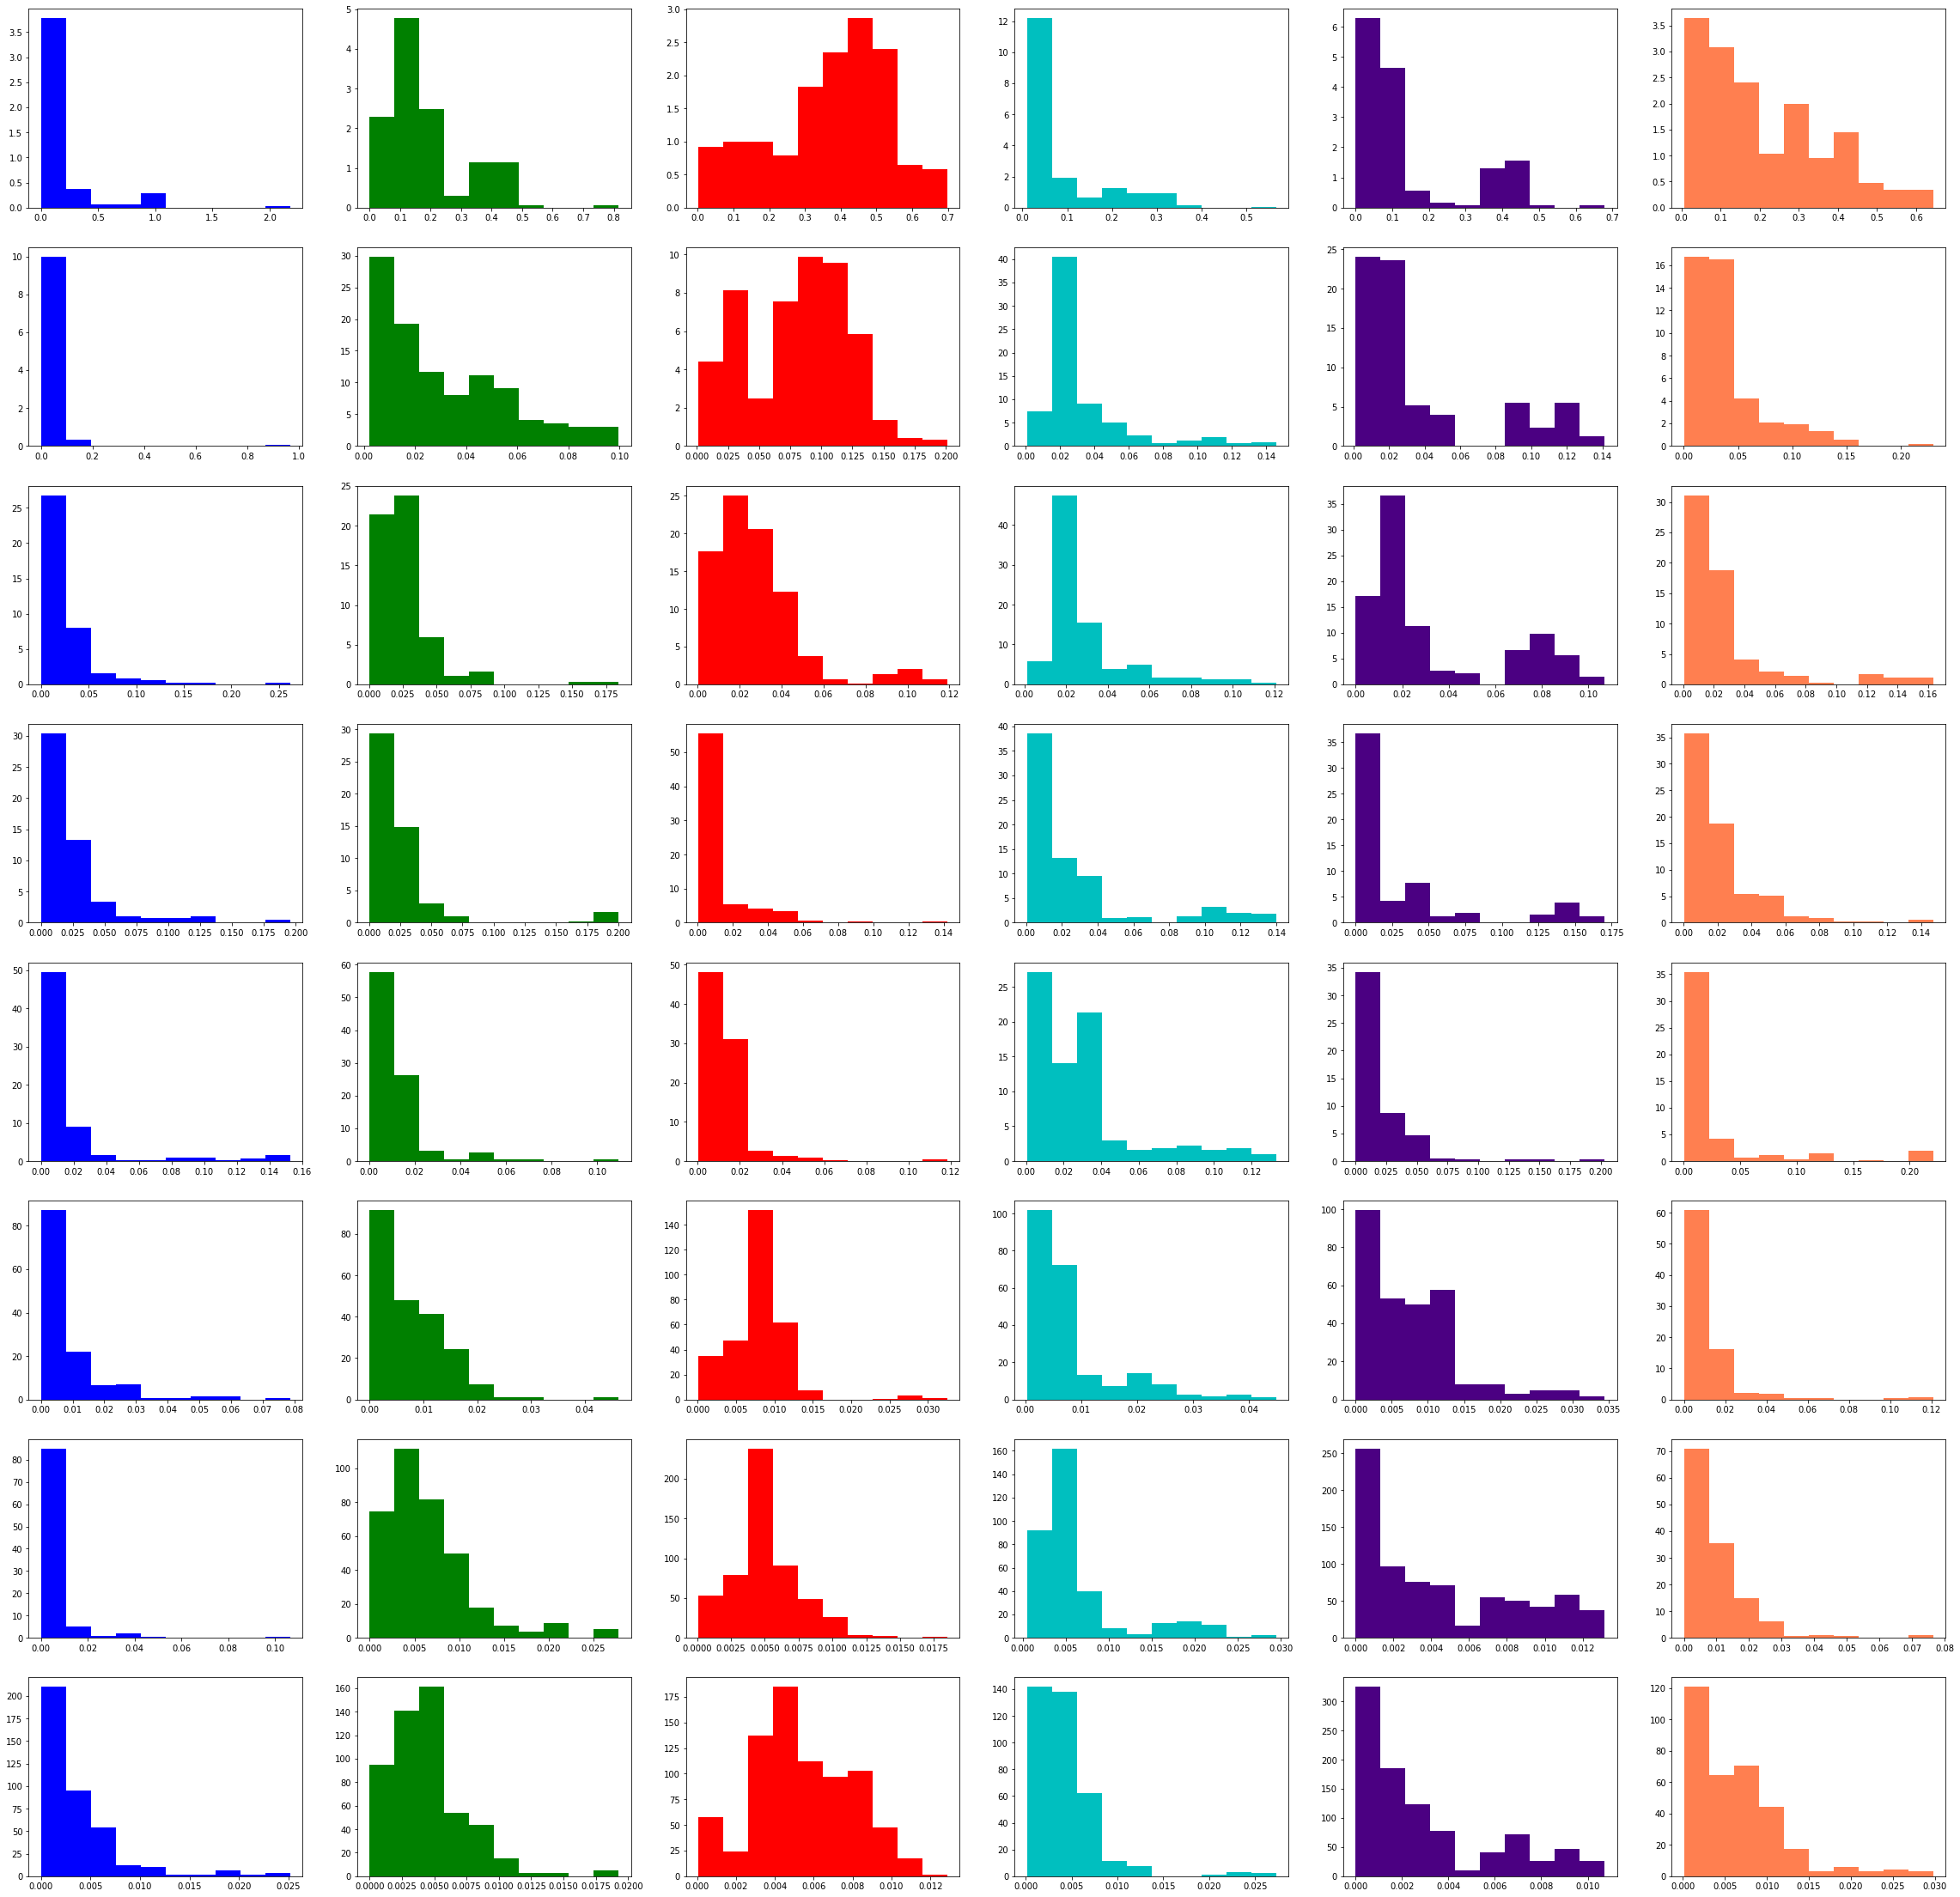

In [268]:
act_alphas = [other_alpha, lpd_alpha, gpd_alpha, lrda_alpha, grda_alpha, seizure_alpha]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(8, 6)
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(len(acols)):
    for j in range(len(act_alphas)):
        axs[i][j].hist(act_alphas[j][acols[i]], density = True, color = colors[j])

plt.show()

### Beta Histograms

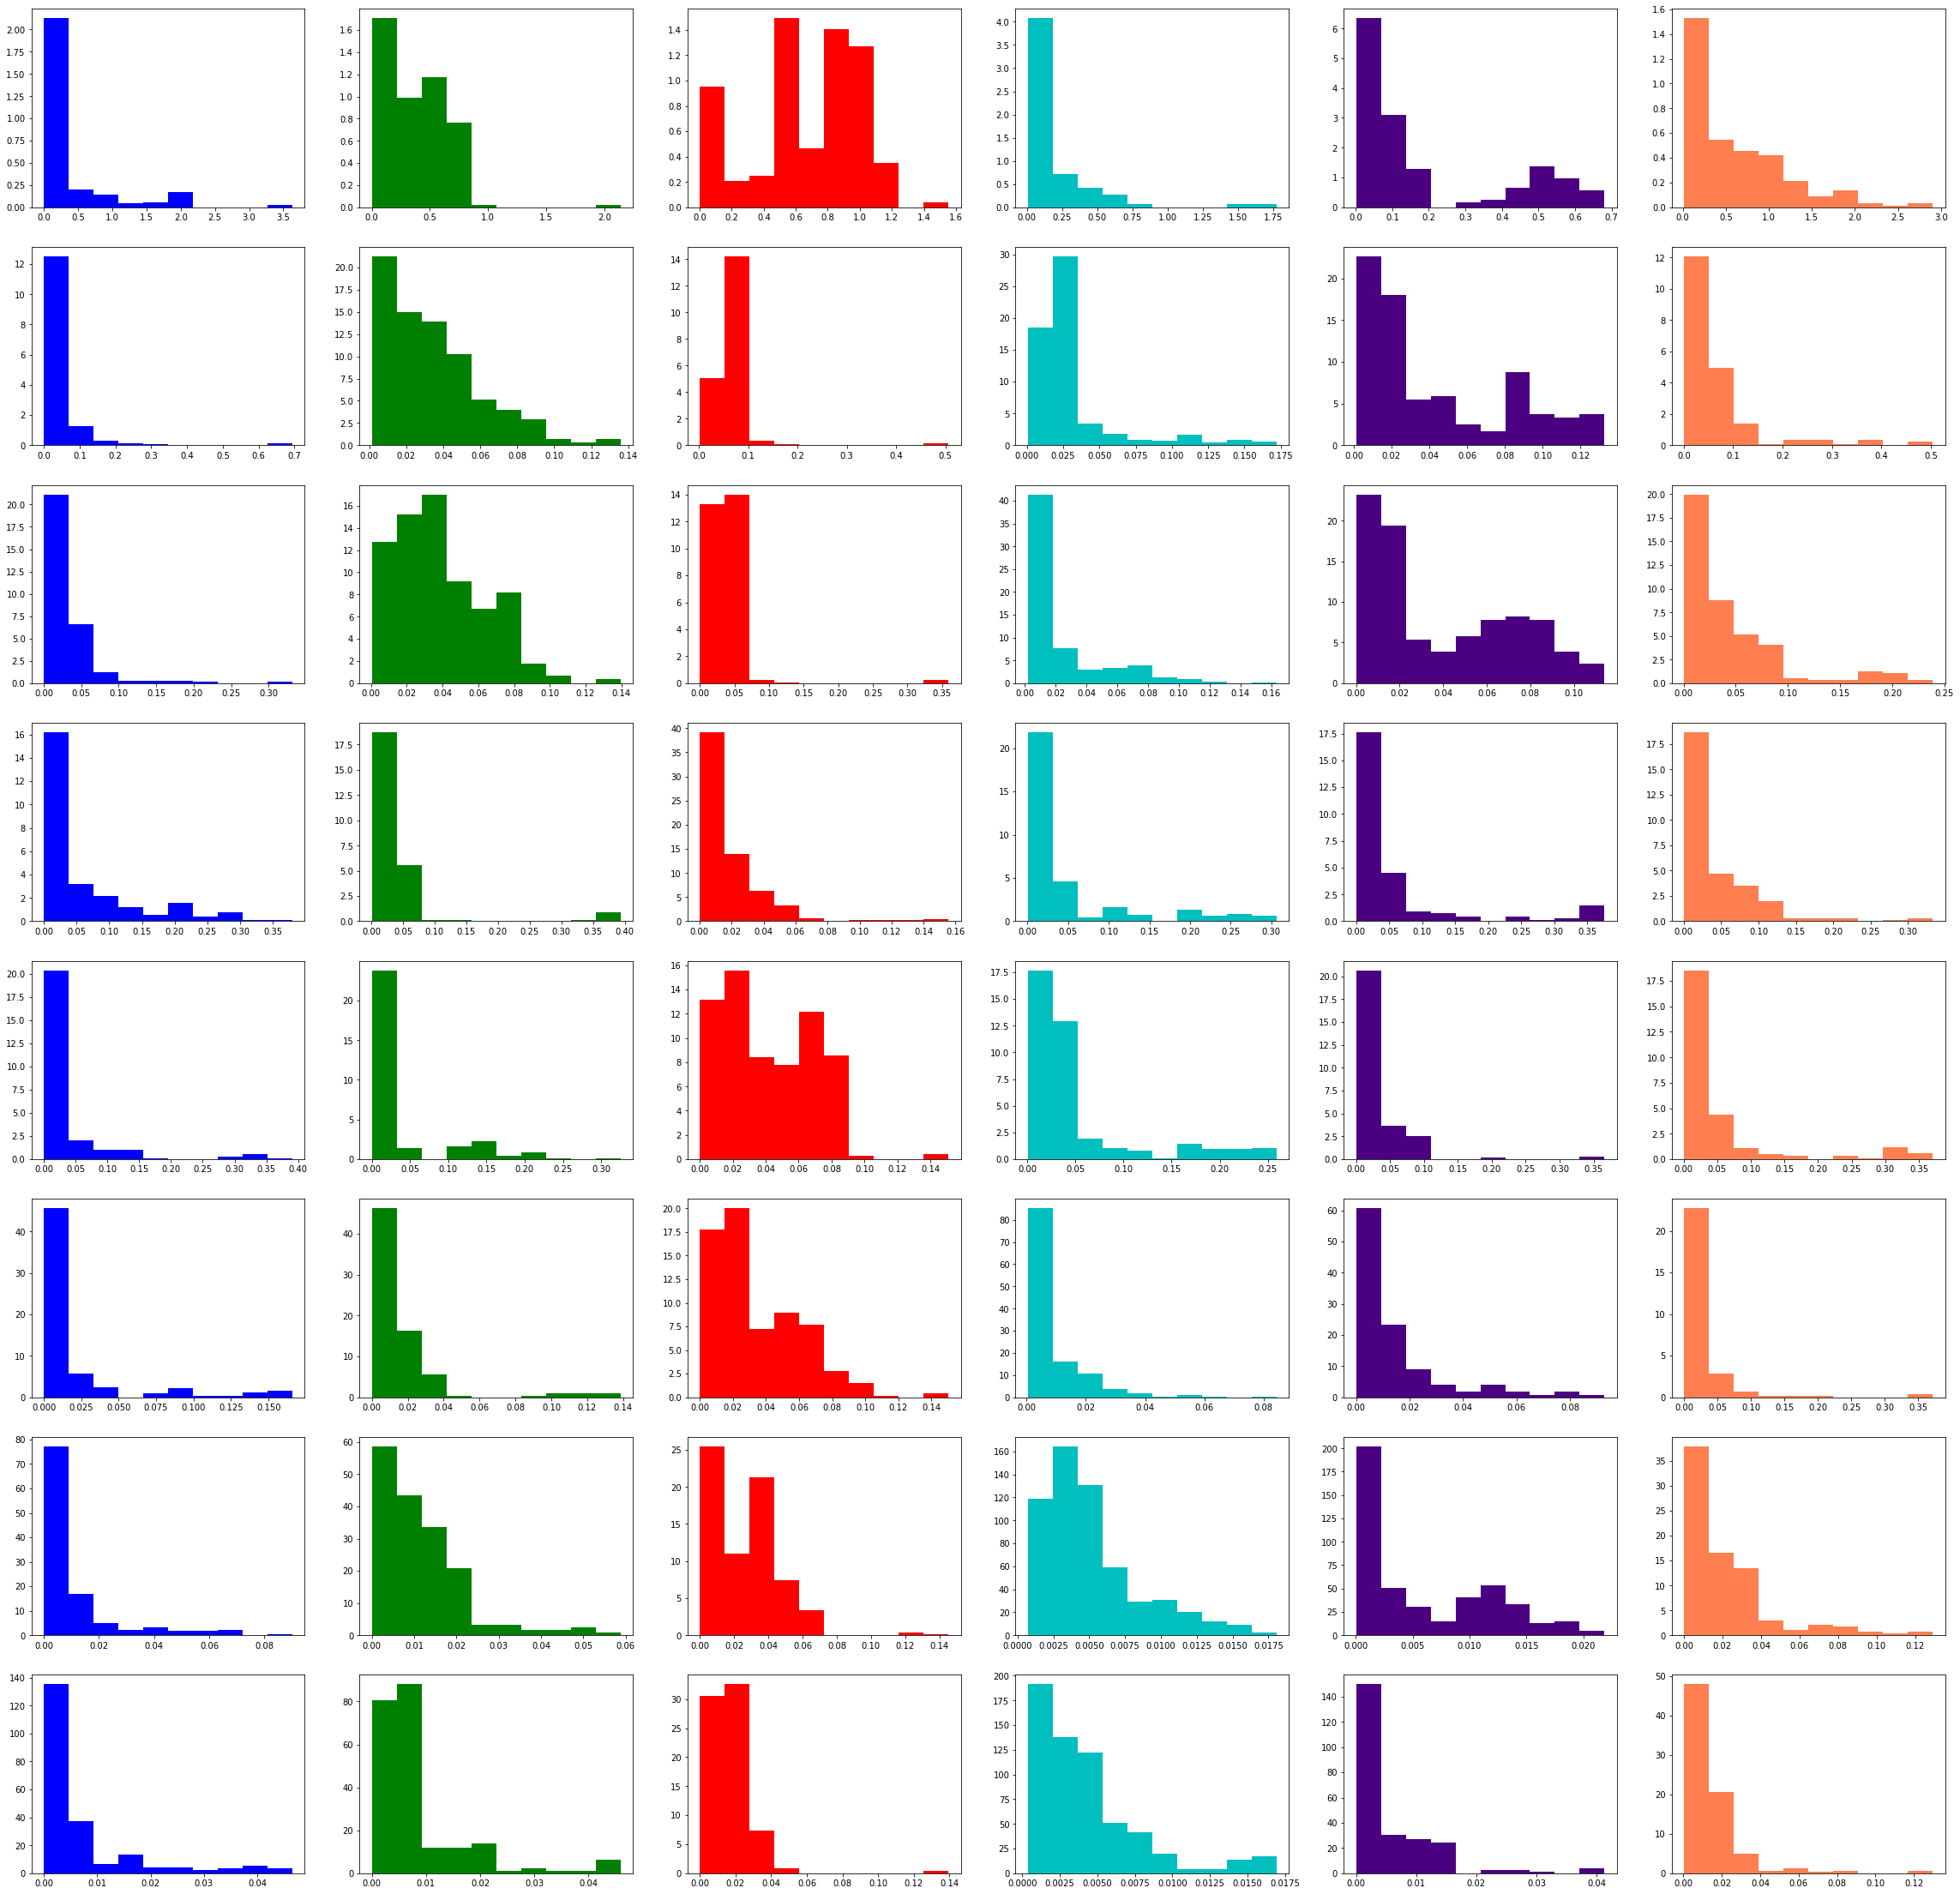

In [269]:
act_betas = [other_beta, lpd_beta, gpd_beta, lrda_beta, grda_beta, seizure_beta]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(8, 6)
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(len(bcols)):
    for j in range(len(act_betas)):
        axs[i][j].hist(act_betas[j][bcols[i]], density = True, color = colors[j])

plt.show()

### Hjorth Parameters

In [272]:
import antropy as ant

**Mobility:**  mean frequency or the proportion of standard deviation of the power spectrum  
  
**Complexity:** estimate of the bandwidth of the signal, which indicates the similarity of the shape of the signal to a pure sine wave (where the value converges to 1)

### Hjorth Mobility Histograms

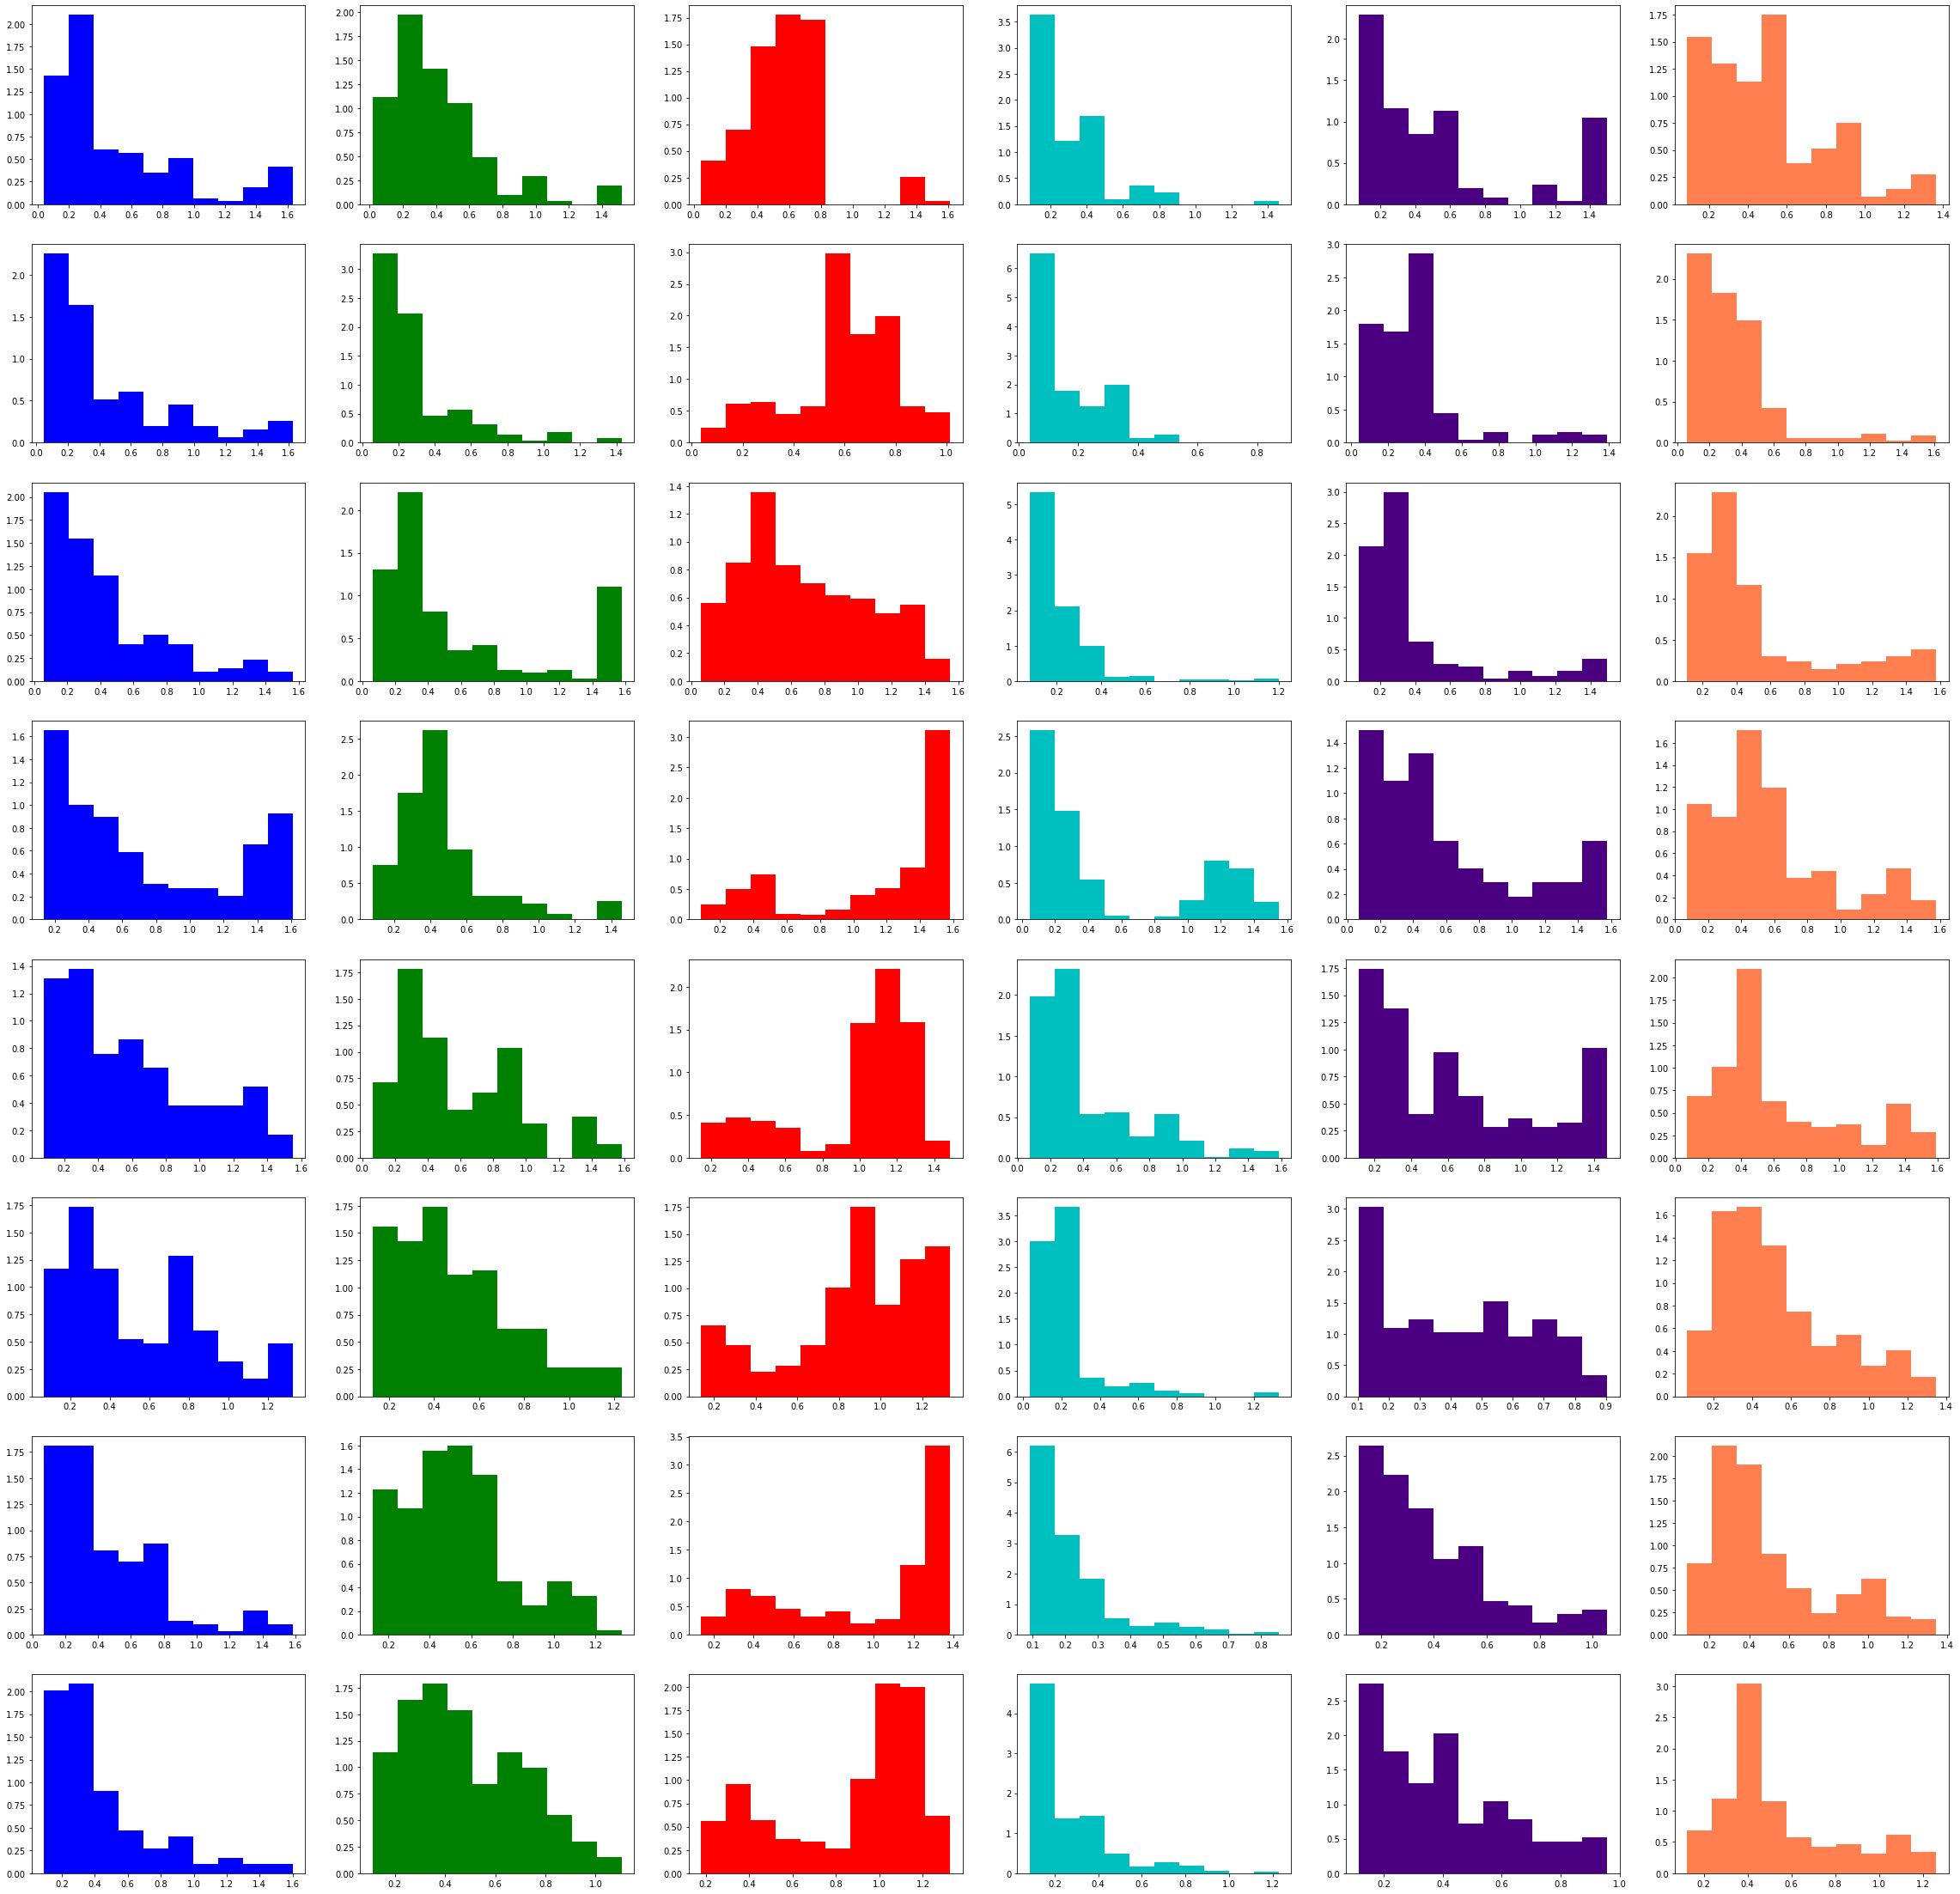

In [277]:
act_mobs = [other_mob, lpd_mob, gpd_mob, lrda_mob, grda_mob, seizure_mob]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(8, 6)
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(len(mcols)):
    for j in range(len(act_mobs)):
        axs[i][j].hist(act_mobs[j][mcols[i]], density = True, color = colors[j])

plt.show()

### Hjorth Complexity Histograms

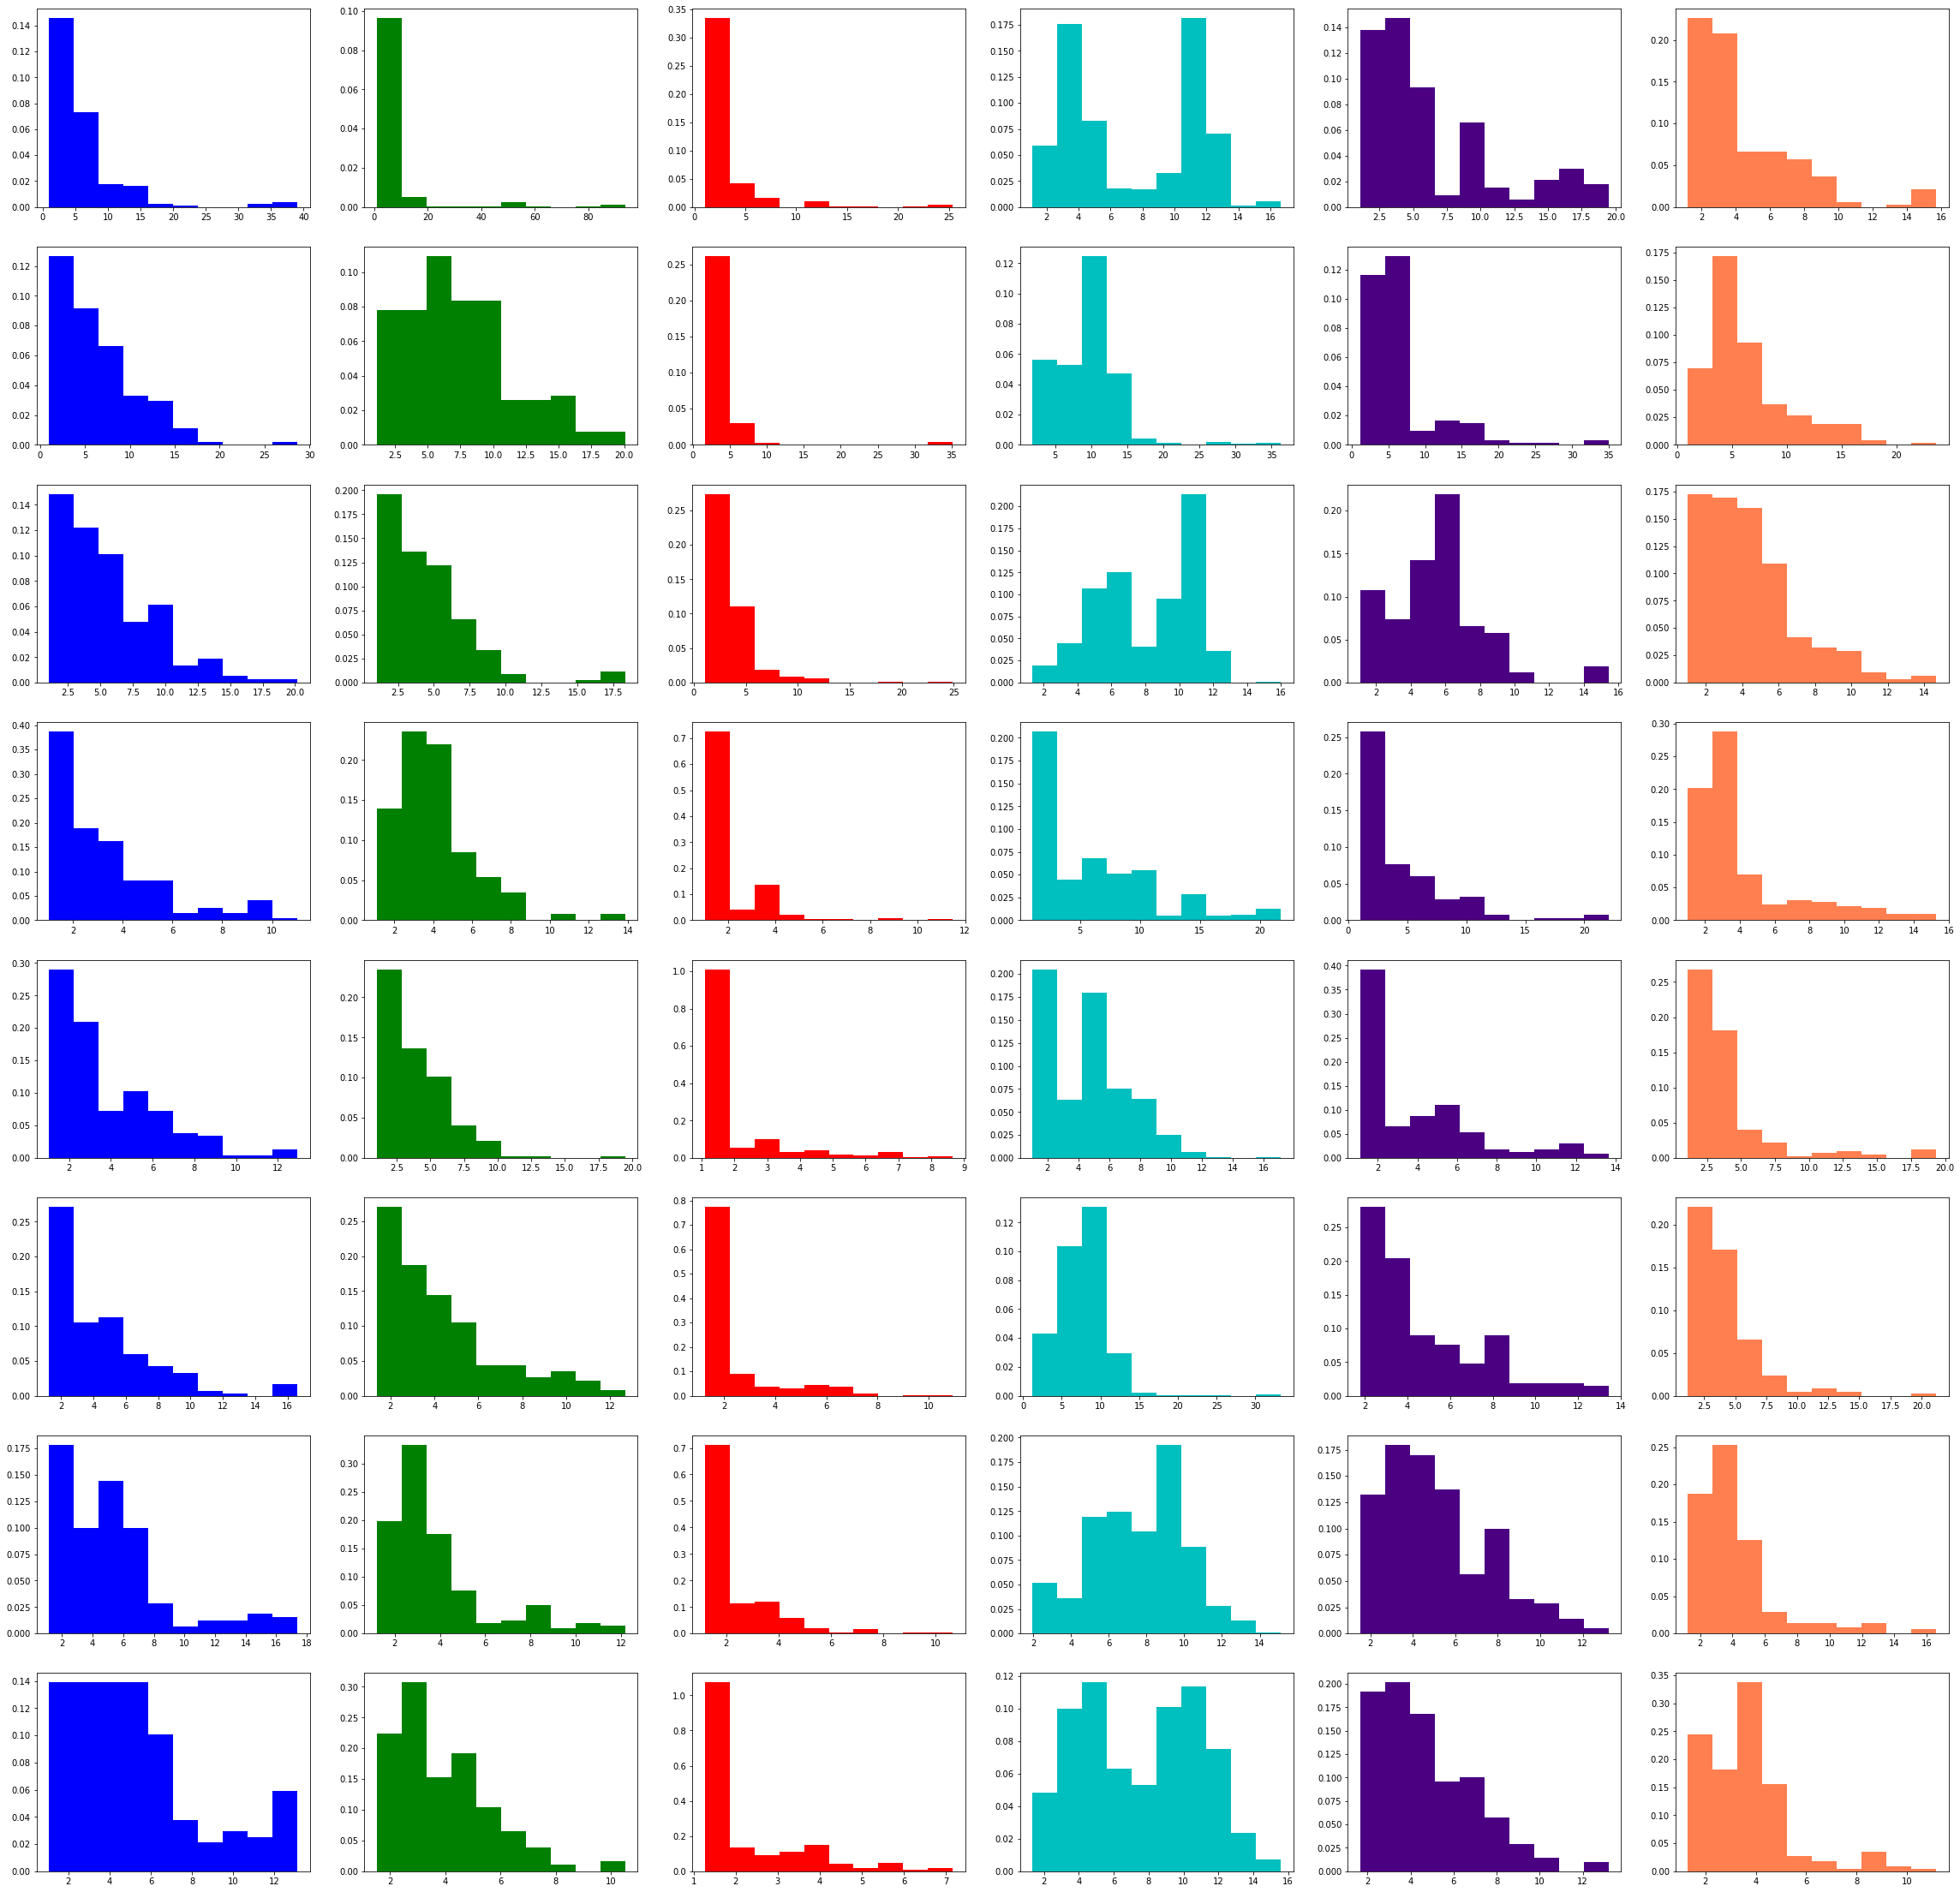

In [278]:
act_coms = [other_com, lpd_com, gpd_com, lrda_com, grda_com, seizure_com]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(8, 6)
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(len(ccols)):
    for j in range(len(act_coms)):
        axs[i][j].hist(act_coms[j][ccols[i]], density = True, color = colors[j])

plt.show()

### Higuchi Fractal Dimension

In [279]:
from antropy import fractal

### Higuchi Fractal Histograms

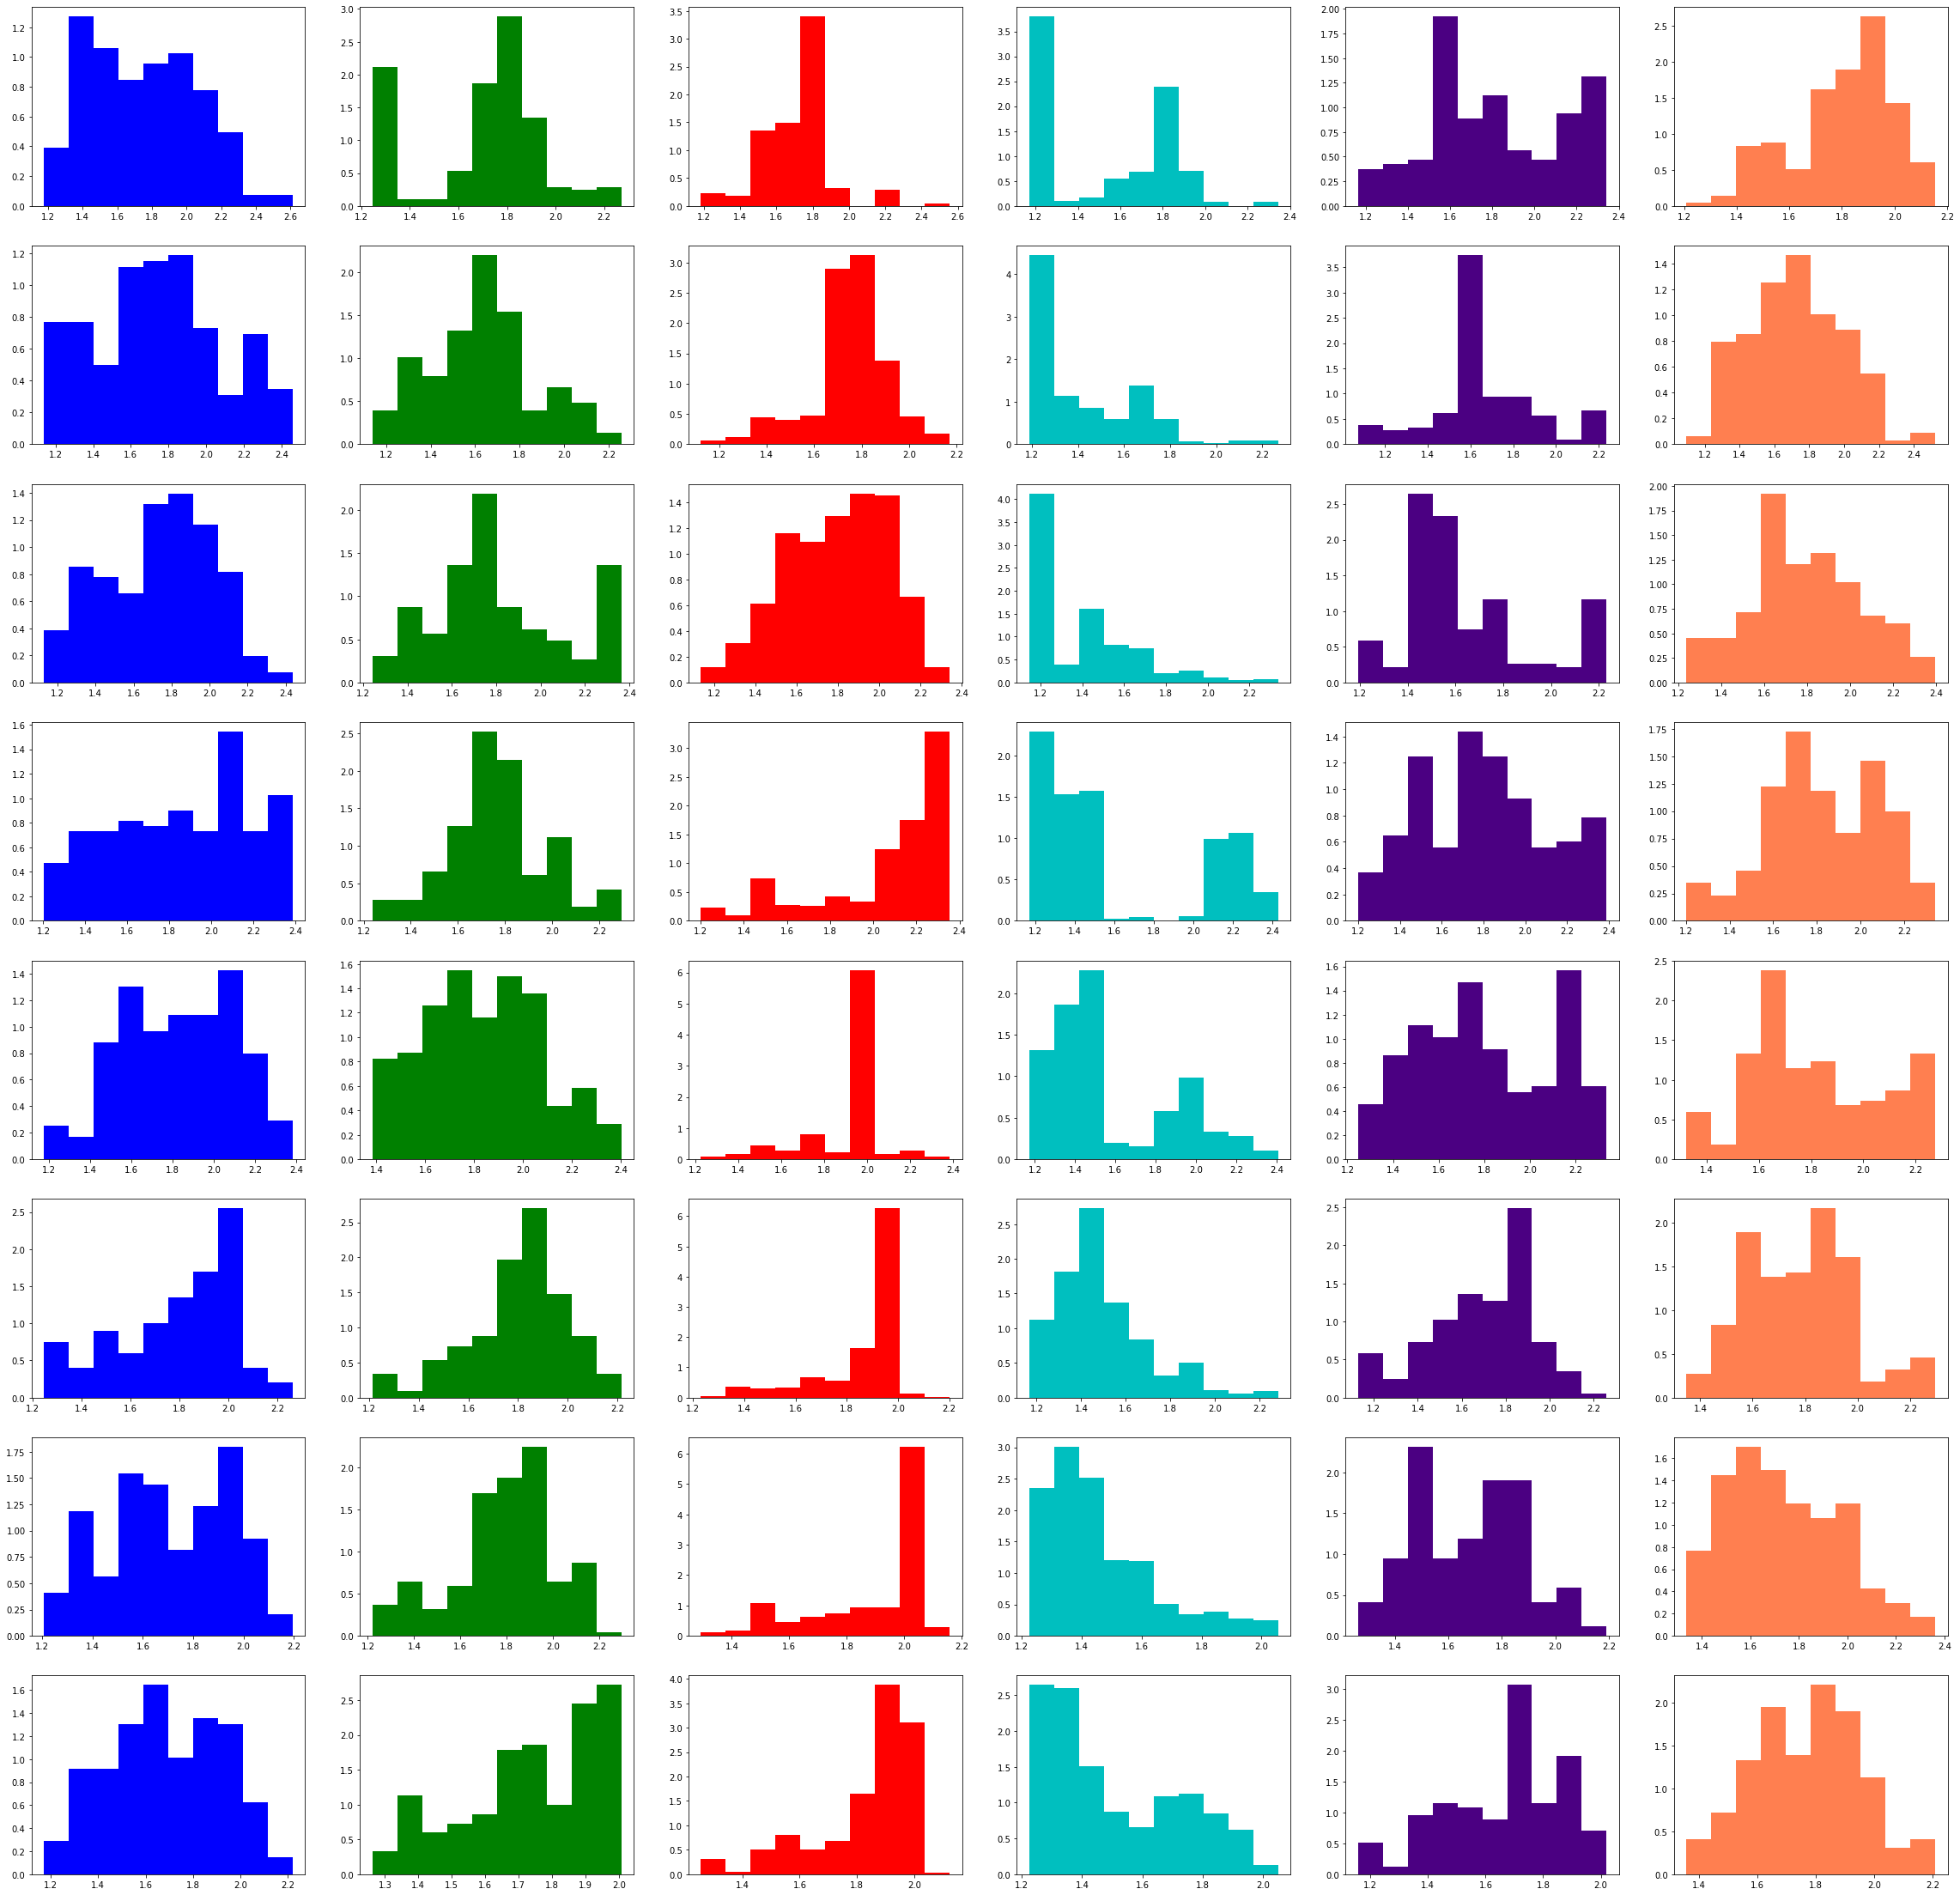

In [283]:
act_hfds = [other_hfd, lpd_hfd, gpd_hfd, lrda_hfd, grda_hfd, seizure_hfd]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(8, 6)
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(len(higuchi_cols)):
    for j in range(len(act_hfds)):
        axs[i][j].hist(act_hfds[j][higuchi_cols[i]], density = True, color = colors[j])

plt.show()

### Katz Fractal Histograms

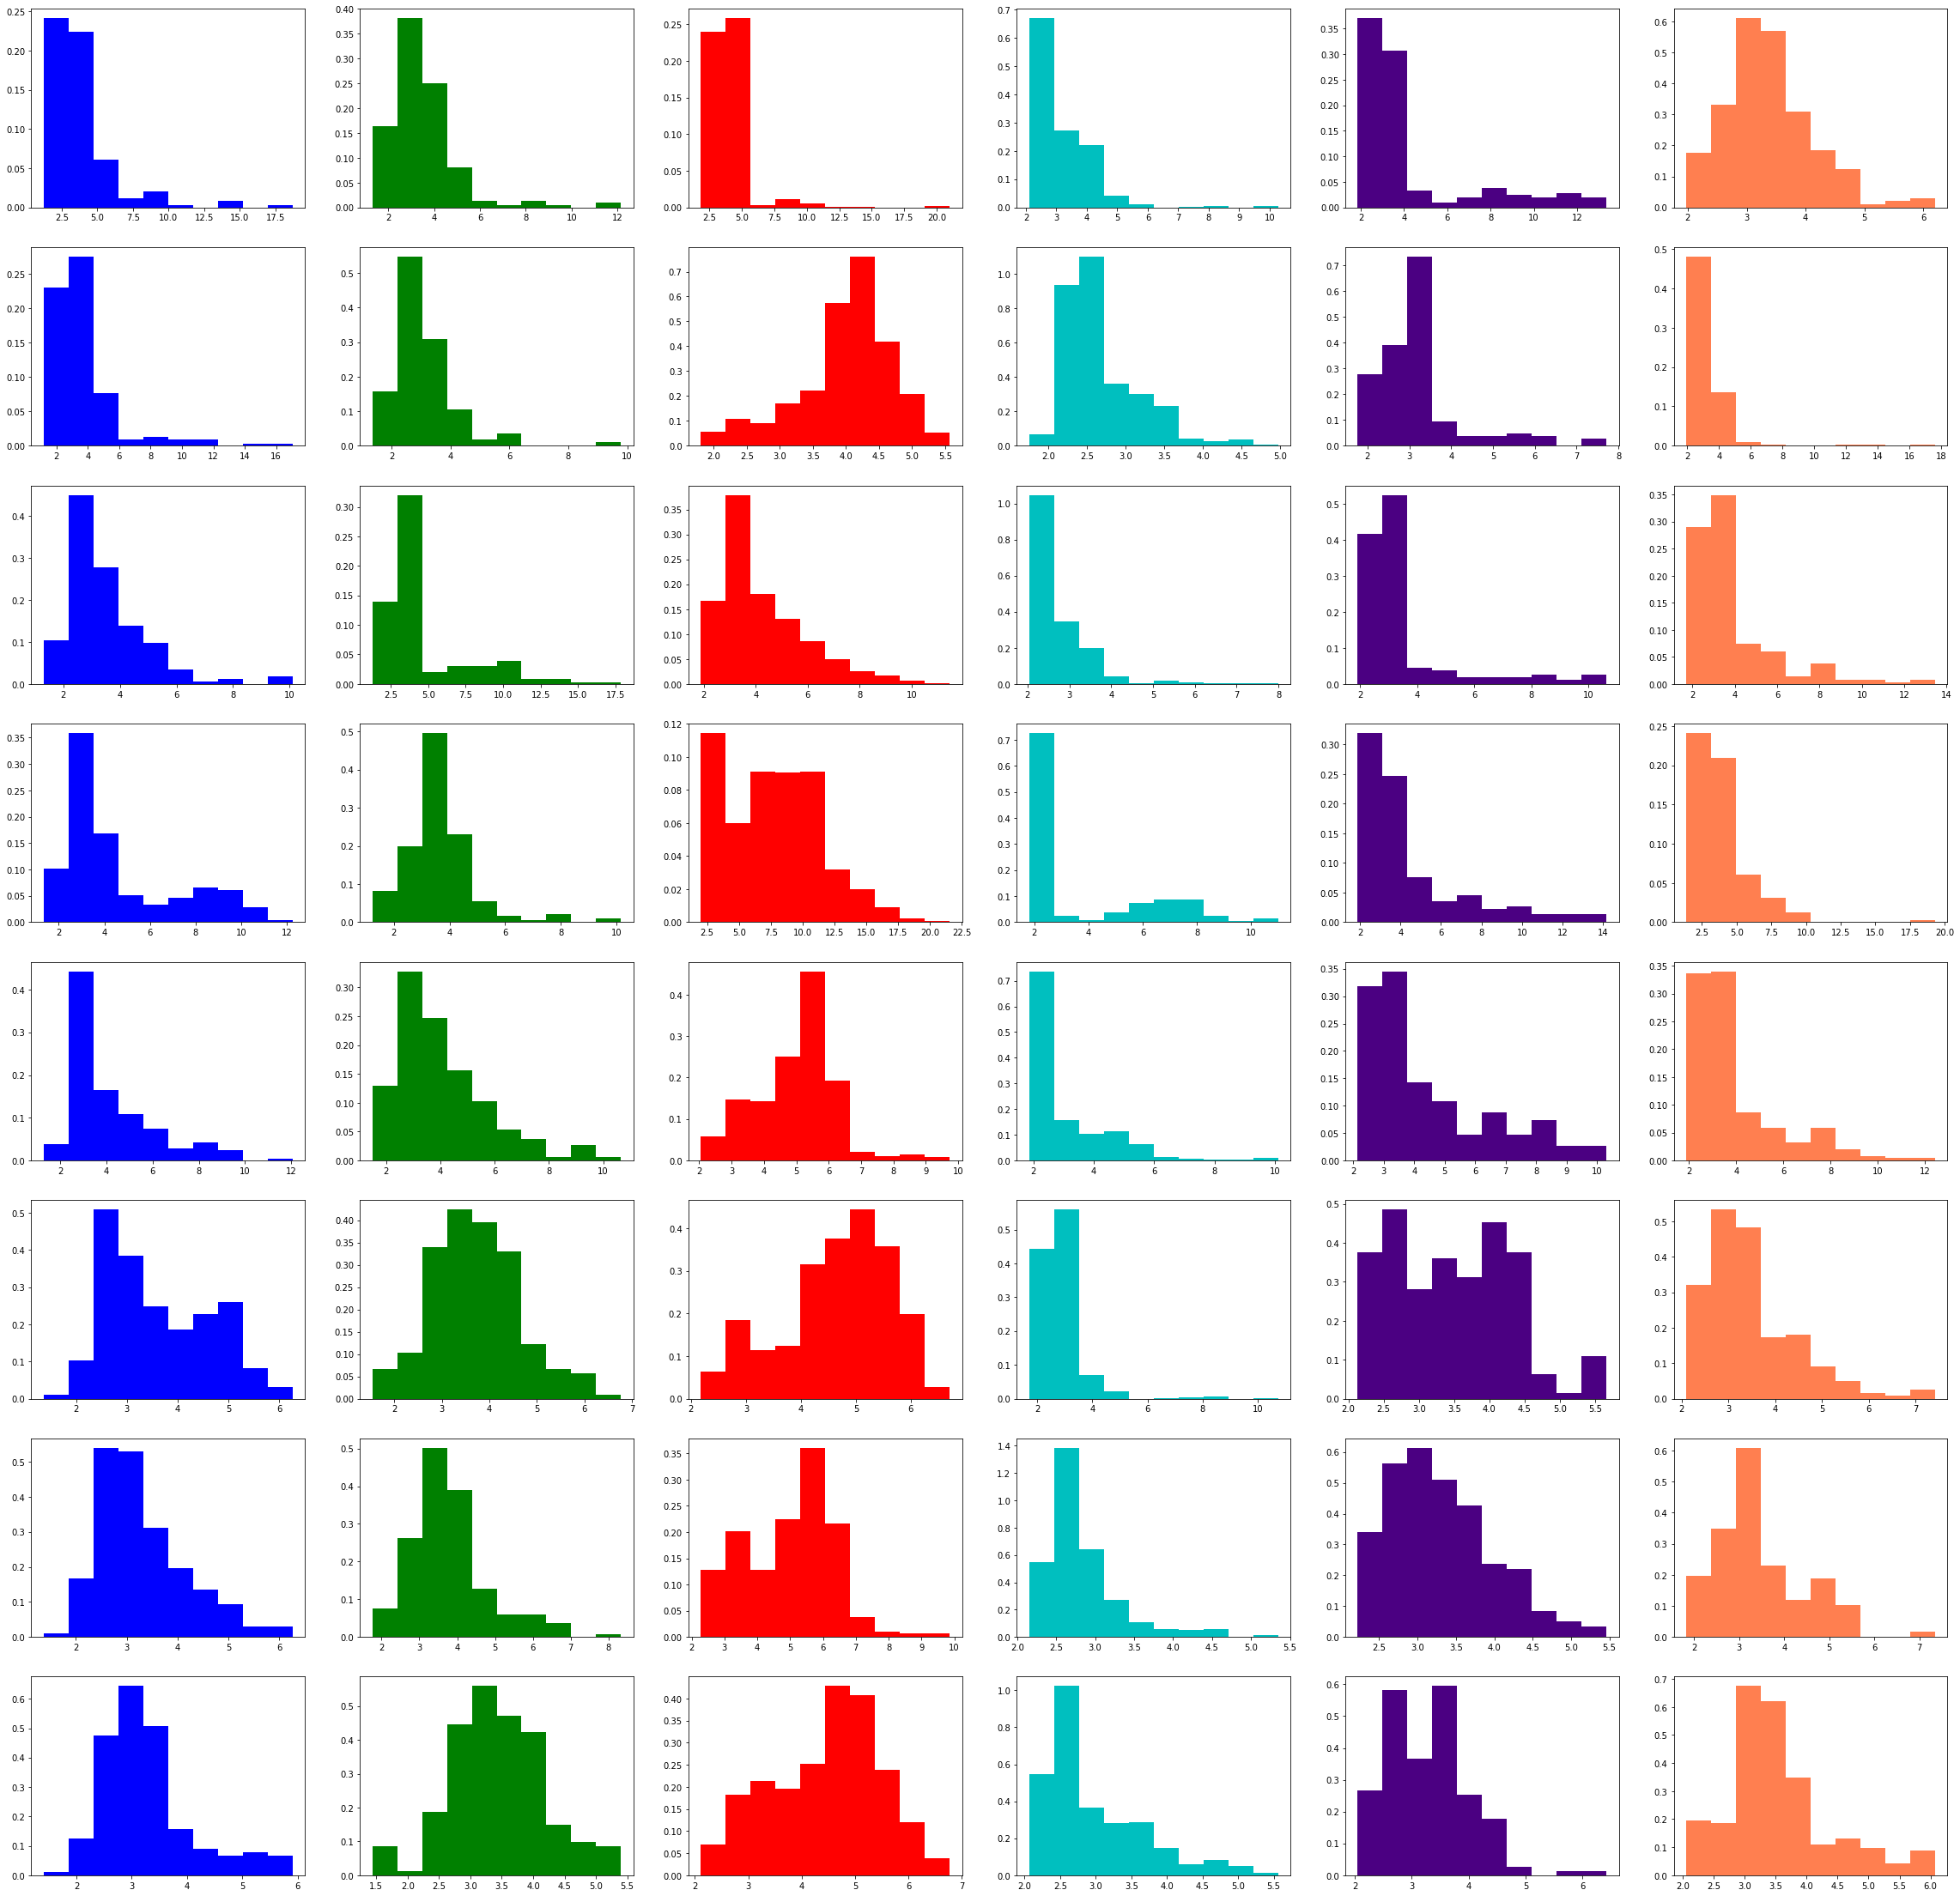

In [287]:
act_kfds = [other_katz, lpd_katz, gpd_katz, lrda_katz, grda_katz, seizure_katz]
colors = ['b', 'g', 'r', 'c', 'indigo', 'coral']
fig, axs = plt.subplots(8, 6)
fig.set_figheight(40)
fig.set_figwidth(40)
for i in range(len(kcols)):
    for j in range(len(act_kfds)):
        axs[i][j].hist(act_kfds[j][kcols[i]], density = True, color = colors[j])

plt.show()

### Machine Learning

In [288]:
df_10

eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0      1628180742           0                       0.0          353733   
1      1628180742           1                       6.0          353733   
2      1628180742           2                       8.0          353733   
3      1628180742           3                      18.0          353733   
4      1628180742           4                      24.0          353733   
...           ...         ...                       ...             ...   
10642   862310335           0                       0.0       200303629   
10643  3671962049           0                       0.0       200303629   
10644  2357552740           0                       0.0       200303629   
10645  2357552740           1                       6.0       200303629   
10646  2357552740           2                       8.0       200303629   

       spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
0                       0                               0.0   127492639   
1                       1                               6.0  3887563113   
2                       2                               8.0  1142670488   
3                       3                              18.0  2718991173   
4                       4                              24.0  3080632009   
...                   ...                               ...         ...   
10642                  77                            1194.0  2962311535   
10643                  78                            1466.0   323074244   
10644                  79                            1874.0  1993344137   
10645                  80                            1880.0  3714973024   
10646                  81                            1882.0  3097667605   

       patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  \
0           42516          Seizure             3         0         0   
1           42516          Seizure             3         0         0   
2           42516          Seizure             3         0         0   
3           42516          Seizure             3         0         0   
4           42516          Seizure             3         0         0   
...           ...              ...           ...       ...       ...   
10642       57480            Other             0         0         0   
10643       57480            Other             0         0         0   
10644       57480          Seizure             3         0         0   
10645       57480          Seizure             3         0         0   
10646       57480          Seizure             3         0         0   

       lrda_vote  grda_vote  other_vote  
0              0          0           0  
1              0          0           0  
2              0          0           0  
3              0          0           0  
4              0          0           0  
...          ...        ...         ...  
10642          0          0           1  
10643          0          0           1  
10644          0          0           0  
10645          0          0           0  
10646          0          0           0  

[10647 rows x 15 columns]

### Generating My Dataframes 

**Features:**  
  
Interval Peak to Peak (5 per component, 40 per sub EEG)  
Interval Variance (5 per component, 40 per sub EEG)  
Alpha Band Power (1 per component, 8 per sub EEG)  
Beta Band Power (1 per component, 8 per sub EEG)  
Hjorth Mobility (1 per component, 8 per sub EEG)  
Hjorth Complexity (1 per component, 8 per sub EEG)  
Higuchi Fractal Dimension (1 per component, 8 per sub EEG)  
Katz Fractal Dimension (1 per component, 8 per sub EEG)  
  
Looping over each of these functions might kill the kernel, so I may end up having to loop over them separately like I did above.

### RandomForest 1

RandomForest handles categorical target variables and has run successfully on my laptop before.

In [320]:
forest = RandomForestClassifier() #running with default hyperparameters and all 128 features the first time through

In [321]:
forest.fit(xtrain, ytrain)

RandomForestClassifier()

In [322]:
y_predictions = forest.predict(xtest)

In [323]:
from sklearn.metrics import classification_report, accuracy_score

In [324]:
acc = accuracy_score(ytest, y_predictions)

In [325]:
acc

0.8718309859154929

In [328]:
cr = classification_report(ytest, y_predictions, target_names = target_names)

In [329]:
print(cr)

              precision    recall  f1-score   support

         GPD       0.96      0.91      0.93       319
        GRDA       0.90      0.91      0.90       337
         LPD       0.89      0.86      0.87       295
        LRDA       0.94      0.96      0.95       386
       Other       0.78      0.66      0.72       330
     Seizure       0.79      0.91      0.84       463

    accuracy                           0.87      2130
   macro avg       0.88      0.87      0.87      2130
weighted avg       0.87      0.87      0.87      2130



In [330]:
y_proba = forest.predict_proba(xtest)

In [331]:
y_proba

array([[0.05, 0.04, 0.23, 0.09, 0.18, 0.41],
       [0.03, 0.01, 0.05, 0.73, 0.04, 0.14],
       [0.1 , 0.07, 0.37, 0.05, 0.24, 0.17],
       ...,
       [0.07, 0.14, 0.16, 0.02, 0.21, 0.4 ],
       [0.07, 0.21, 0.18, 0.11, 0.25, 0.18],
       [0.09, 0.07, 0.13, 0.17, 0.31, 0.23]])

### Feature Selection with SelectKBest

In [348]:
k_range = range(15, 25)

In [349]:
accuracy_scores = []

for i in k_range:
    skb = SelectKBest(k = i)
    xnew = skb.fit_transform(xtrain, ytrain)
    xnew_test = skb.transform(xtest)
    forest = RandomForestClassifier()
    forest.fit(xnew, ytrain)
    y_predictions = forest.predict(xnew_test)
    acc = accuracy_score(ytest, y_predictions)
    accuracy_scores.append(acc)

In [351]:
accuracy_scores

[0.8399061032863849,
 0.8399061032863849,
 0.8455399061032863,
 0.8488262910798122,
 0.8539906103286385,
 0.8605633802816901,
 0.8568075117370892,
 0.8539906103286385,
 0.8582159624413146,
 0.8643192488262911]

The model performed fairly evenly throughout, but the max accuracy score was for 23 features. I'll run the model with 23 features and do hyperparameter tuning with the validation set.

In [377]:
skb = SelectKBest(k = 23)

In [378]:
xtrain_new = skb.fit_transform(xtrain, ytrain)
xval_new = skb.transform(xval)
xtest_new = skb.transform(xtest)
selected_indexes = skb.get_support()

In [379]:
selected_indexes = np.where(selected_indexes == True)

In [380]:
for i in selected_indexes:
    print(features[i])

Index(['component1_ptp30', 'component2_ptp40', 'component1_alpha',
       'component2_alpha', 'component1_beta', 'component2_beta',
       'component7_beta', 'component8_beta', 'component4_mobility',
       'component5_mobility', 'component6_mobility', 'component7_mobility',
       'component8_mobility', 'component5_complexity', 'component6_complexity',
       'component7_complexity', 'component8_complexity', 'component4_higuchi',
       'component6_higuchi', 'component4_katz', 'component5_katz',
       'component7_katz', 'component8_katz'],
      dtype='object')


### Hyperparameter Tuning with GridSearchCV

In [357]:
parameters = {'n_estimators': [10, 50, 100], 'criterion': ('gini', 'entropy')}
forest = RandomForestClassifier()
grid = GridSearchCV(forest, parameters)
grid.fit(xval_new, yval)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'n_estimators': [10, 50, 100]})

In [358]:
grid.best_params_

{'criterion': 'gini', 'n_estimators': 100}

The best parameters returned are the default parameters. Both 100 for n_estimators and gini for criterion are default values for the RandomForestClassifier.

### Running Final RandomForestClassifier Model

In [359]:
forest = RandomForestClassifier()
forest.fit(xtrain_new, ytrain)
y_predictions = forest.predict(xtest_new)
y_proba = forest.predict_proba(xtest_new)

In [360]:
acc = accuracy_score(ytest, y_predictions)

In [361]:
acc

0.8488262910798122

In [362]:
cr = classification_report(ytest, y_predictions)

In [363]:
print(cr)

              precision    recall  f1-score   support

         GPD       0.95      0.88      0.92       319
        GRDA       0.87      0.89      0.88       337
         LPD       0.82      0.80      0.81       295
        LRDA       0.90      0.95      0.92       386
       Other       0.76      0.67      0.71       330
     Seizure       0.80      0.87      0.83       463

    accuracy                           0.85      2130
   macro avg       0.85      0.84      0.85      2130
weighted avg       0.85      0.85      0.85      2130



### Thoughts on Improvements  
  
Artifact Removal: Using ICA to remove artifacts  
  
Ensemble Methods: Improving Other Accuracy (Binary Classification, Anomaly Detection, Clustering to Identify Types of Other Acitivity); Predicted Probabilities as Features